<a href="https://colab.research.google.com/github/FJSD08/master-series-forecasting-notebook/blob/main/Forecasting_Dataset_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [287]:
# Importando bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.seasonal import seasonal_decompose


In [288]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [289]:
data = pd.read_excel('/content/drive/MyDrive/Mestrado/todos_pzs.xlsx')
data

Data         pz01         pz02         pz04         pz05  \
0    22/12/2019  1159.115552  1153.002420  1147.878218  1145.262171   
1    23/12/2019  1159.062807  1153.011490  1147.879594  1145.259774   
2    24/12/2019  1159.011332  1153.004496  1147.876531  1145.260790   
3    25/12/2019  1158.970063  1153.004245  1147.875138  1145.263543   
4    26/12/2019  1158.930182  1153.000024  1147.872569  1145.260504   
..          ...          ...          ...          ...          ...   
158  28/05/2020  1158.375774  1152.943213  1147.804107  1145.158057   
159  29/05/2020  1158.370977  1152.942927  1147.808108  1145.158081   
160  30/05/2020  1158.368154  1152.939596  1147.808620  1145.157667   
161  31/05/2020  1158.367238  1152.940783  1147.804170  1145.157926   
162  01/06/2020  1158.362313  1152.939990  1147.822107  1145.157683   

            pz06         pz07         pz08         pz09         pz10  \
0    1141.464434  1147.171859  1138.559694  1135.433764  1153.101231   
1    1141.559603  1147.170972  1138.568308  1135.435364  1153.102087   
2    1141.552286  1147.167621  1138.559440  1135.435206  1153.100190   
3    1141.590938  1147.167137  1138.573925  1135.428538  1153.100426   
4    1141.440208  1147.167534  1138.568303  1135.434140  1153.101723   
..           ...          ...          ...          ...          ...   
158  1141.836837  1147.160309  1138.549285  1135.447482  1153.063707   
159  1141.841422  1147.161232  1138.550624  1135.450933  1153.064136   
160  1141.839046  1147.160969  1138.549410  1135.449212  1153.062947   
161  1141.842952  1147.160845  1138.548993  1135.450127  1153.061769   
162  1141.841485  1147.161014  1138.548190  1135.448912  1153.064380   

            pz11         pz12         pz13      pz14      pz15      pz16  
0    1146.237879  1155.523278  1148.232515  1166.578  1164.845  1162.427  
1    1146.234667  1155.523784  1148.232064  1166.578  1164.855  1162.417  
2    1146.270777  1155.523218  1148.231010  1166.578  1164.845  1162.427  
3    1146.233549  1155.523617  1148.231738  1166.598  1164.855  1162.427  
4    1146.234007  1155.522791  1148.231956  1166.588  1164.835  1162.407  
..           ...          ...          ...       ...       ...       ...  
158  1146.248638  1155.489532  1148.198550  1167.038  1165.165  1162.867  
159  1146.243362  1155.489663  1148.198804  1167.018  1165.165  1162.847  
160  1146.244249  1155.489807  1148.198254  1167.018  1165.165  1162.857  
161  1146.308516  1155.490427  1148.199093  1167.018  1165.155  1162.857  
162  1146.257456  1155.489693  1148.199075  1167.018  1165.155  1162.857  

[163 rows x 16 columns]

In [290]:
# Supondo que 'df' é o seu DataFrame e 'timestamp_column' é o nome da coluna de timestamp
data['Data'] = pd.to_datetime(data['Data'])

In [291]:
# Convertendo a coluna 'TIMESTAMP' para o formato datetime
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

# Definindo 'TIMESTAMP' como índice do DataFrame
data.set_index('Data', inplace=True)

In [292]:
# Supondo que 'data' é um DataFrame Pandas e 'target' é a coluna que você deseja prever
X = data.drop('pz16', axis=1)  # Substitua 'target' pelo nome real da sua variável dependente
y = data['pz16']  # Variável dependente

In [293]:
# Dividir os dados em treino e teste não é tão simples quanto uma divisão aleatória em dados temporais
# Walk-Forward Validation para séries temporais
n_train = int(len(X) * 0.8)
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

In [294]:
data

pz01         pz02         pz04         pz05         pz06  \
Data                                                                          
2019-12-22  1159.115552  1153.002420  1147.878218  1145.262171  1141.464434   
2019-12-23  1159.062807  1153.011490  1147.879594  1145.259774  1141.559603   
2019-12-24  1159.011332  1153.004496  1147.876531  1145.260790  1141.552286   
2019-12-25  1158.970063  1153.004245  1147.875138  1145.263543  1141.590938   
2019-12-26  1158.930182  1153.000024  1147.872569  1145.260504  1141.440208   
...                 ...          ...          ...          ...          ...   
2020-05-28  1158.375774  1152.943213  1147.804107  1145.158057  1141.836837   
2020-05-29  1158.370977  1152.942927  1147.808108  1145.158081  1141.841422   
2020-05-30  1158.368154  1152.939596  1147.808620  1145.157667  1141.839046   
2020-05-31  1158.367238  1152.940783  1147.804170  1145.157926  1141.842952   
2020-06-01  1158.362313  1152.939990  1147.822107  1145.157683  1141.841485   

                   pz07         pz08         pz09         pz10         pz11  \
Data                                                                          
2019-12-22  1147.171859  1138.559694  1135.433764  1153.101231  1146.237879   
2019-12-23  1147.170972  1138.568308  1135.435364  1153.102087  1146.234667   
2019-12-24  1147.167621  1138.559440  1135.435206  1153.100190  1146.270777   
2019-12-25  1147.167137  1138.573925  1135.428538  1153.100426  1146.233549   
2019-12-26  1147.167534  1138.568303  1135.434140  1153.101723  1146.234007   
...                 ...          ...          ...          ...          ...   
2020-05-28  1147.160309  1138.549285  1135.447482  1153.063707  1146.248638   
2020-05-29  1147.161232  1138.550624  1135.450933  1153.064136  1146.243362   
2020-05-30  1147.160969  1138.549410  1135.449212  1153.062947  1146.244249   
2020-05-31  1147.160845  1138.548993  1135.450127  1153.061769  1146.308516   
2020-06-01  1147.161014  1138.548190  1135.448912  1153.064380  1146.257456   

                   pz12         pz13      pz14      pz15      pz16  
Data                                                                
2019-12-22  1155.523278  1148.232515  1166.578  1164.845  1162.427  
2019-12-23  1155.523784  1148.232064  1166.578  1164.855  1162.417  
2019-12-24  1155.523218  1148.231010  1166.578  1164.845  1162.427  
2019-12-25  1155.523617  1148.231738  1166.598  1164.855  1162.427  
2019-12-26  1155.522791  1148.231956  1166.588  1164.835  1162.407  
...                 ...          ...       ...       ...       ...  
2020-05-28  1155.489532  1148.198550  1167.038  1165.165  1162.867  
2020-05-29  1155.489663  1148.198804  1167.018  1165.165  1162.847  
2020-05-30  1155.489807  1148.198254  1167.018  1165.165  1162.857  
2020-05-31  1155.490427  1148.199093  1167.018  1165.155  1162.857  
2020-06-01  1155.489693  1148.199075  1167.018  1165.155  1162.857  

[163 rows x 15 columns]

In [295]:
data.describe()

pz01         pz02         pz04         pz05         pz06  \
count   163.000000   163.000000   163.000000   163.000000   163.000000   
mean   1159.344281  1152.987298  1147.854664  1145.213634  1141.700969   
std       1.342976     0.025258     0.026681     0.050797     0.334703   
min    1158.362313  1152.939596  1147.804107  1145.153355  1141.340462   
25%    1158.511123  1152.968082  1147.830796  1145.157594  1141.560690   
50%    1158.747513  1152.990604  1147.865942  1145.203974  1141.690354   
75%    1159.692155  1153.006008  1147.874094  1145.262094  1141.769712   
max    1165.996724  1153.057285  1147.907760  1145.363488  1145.215189   

              pz07         pz08         pz09         pz10         pz11  \
count   163.000000   163.000000   163.000000   163.000000   163.000000   
mean   1147.161156  1138.553278  1135.441176  1153.157267  1146.249008   
std       0.002578     0.010214     0.005745     0.345431     0.021765   
min    1147.156936  1138.543548  1135.427332  1153.045128  1146.220006   
25%    1147.159236  1138.545532  1135.436700  1153.063019  1146.227408   
50%    1147.160220  1138.547464  1135.440384  1153.099002  1146.249801   
75%    1147.163238  1138.563114  1135.445369  1153.101751  1146.258524   
max    1147.171859  1138.577891  1135.455778  1156.935201  1146.331292   

              pz12         pz13         pz14         pz15         pz16  
count   163.000000   163.000000   163.000000   163.000000   163.000000  
mean   1155.527062  1148.254902  1167.460454  1165.129141  1162.775834  
std       0.080755     0.115502     0.540154     0.149353     0.200196  
min    1155.483075  1148.196478  1166.578000  1164.825000  1162.347000  
25%    1155.489473  1148.230385  1167.078000  1165.085000  1162.622000  
50%    1155.491452  1148.235571  1167.468000  1165.175000  1162.867000  
75%    1155.524038  1148.237394  1167.833000  1165.235000  1162.947000  
max    1156.063685  1149.155168  1169.218000  1165.655000  1163.027000

In [296]:
# Calcular estatísticas descritivas para o DataFrame
descricao = data.describe()

# Especificar o caminho do arquivo Excel onde você deseja salvar os dados
caminho_do_arquivo_excel = '/content/drive/MyDrive/Mestrado/imagens/Dataset02/descricao_dataset02_pzs.xlsx'

# Salvar as estatísticas descritivas em um arquivo Excel
descricao.to_excel(caminho_do_arquivo_excel)

print("Estatísticas descritivas salvas com sucesso em", caminho_do_arquivo_excel)

Estatísticas descritivas salvas com sucesso em /content/drive/MyDrive/Mestrado/imagens/Dataset02/descricao_dataset02_pzs.xlsx


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2019-12-22 to 2020-06-01
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pz01    163 non-null    float64
 1   pz02    163 non-null    float64
 2   pz04    163 non-null    float64
 3   pz05    163 non-null    float64
 4   pz06    163 non-null    float64
 5   pz07    163 non-null    float64
 6   pz08    163 non-null    float64
 7   pz09    163 non-null    float64
 8   pz10    163 non-null    float64
 9   pz11    163 non-null    float64
 10  pz12    163 non-null    float64
 11  pz13    163 non-null    float64
 12  pz14    163 non-null    float64
 13  pz15    163 non-null    float64
 14  pz16    163 non-null    float64
dtypes: float64(15)
memory usage: 20.4 KB


In [298]:
# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po
from plotly.subplots import make_subplots
import plotly.tools as tls
import plotly.figure_factory as ff

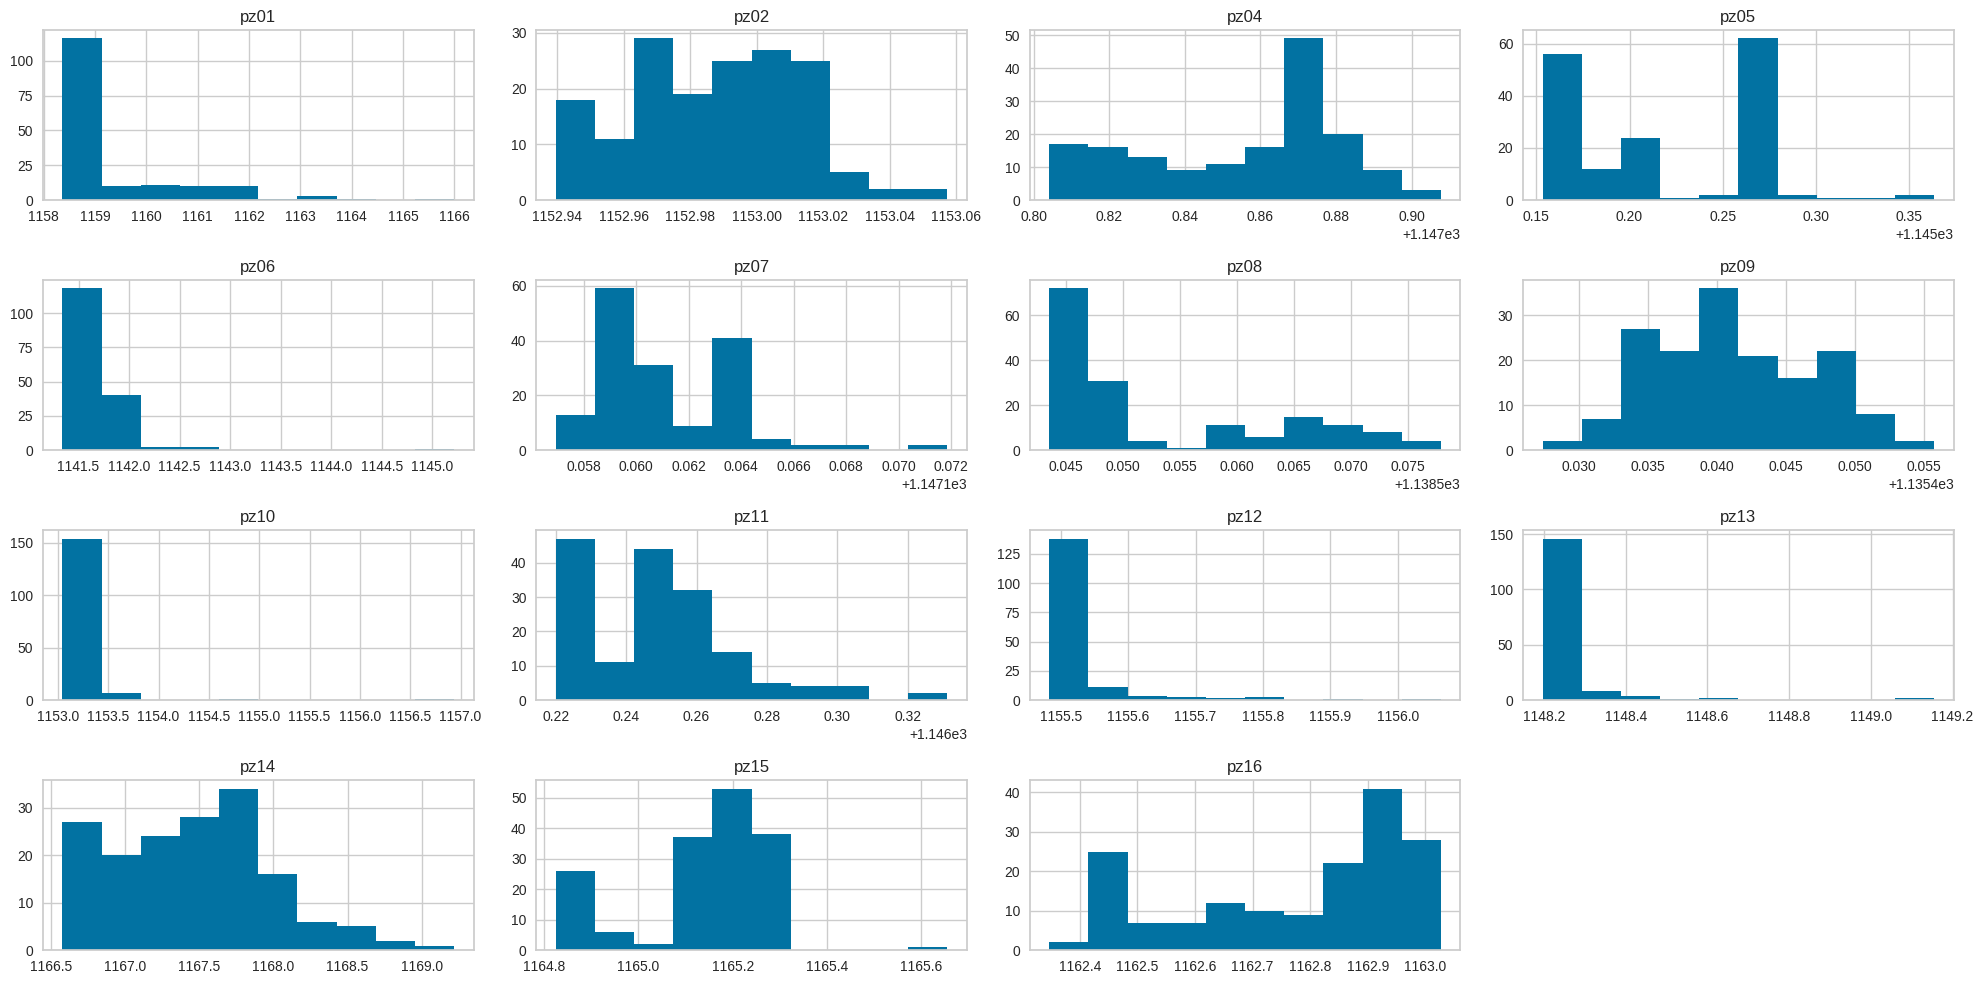

In [299]:
# Supondo que 'df' seja o nome do seu DataFrame
data.hist(figsize=(20, 10))
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de subplots
plt.savefig('/content/drive/MyDrive/Mestrado/imagens/Dataset02/histogramas_dataset02_pzs.png', dpi=300)
plt.show()

In [240]:
data.shape

(163, 15)

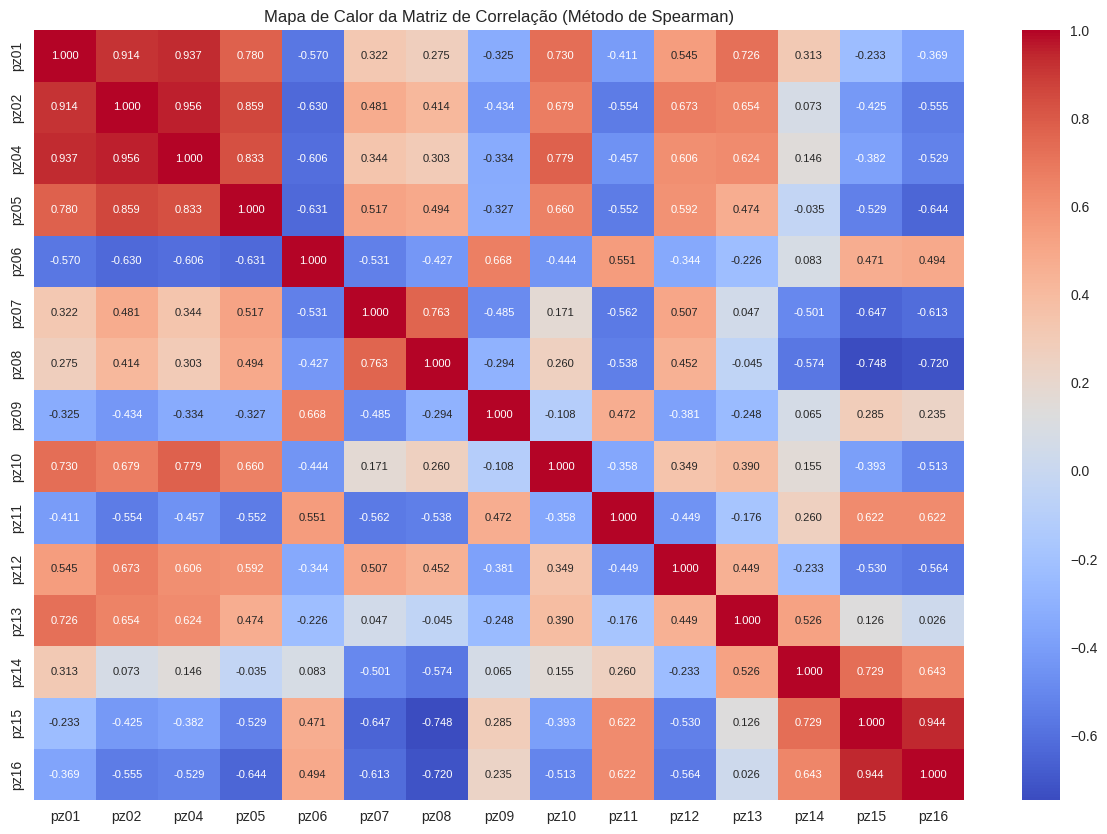

In [300]:
# Calcular a matriz de correlação usando o método de Spearman
correlation_matrix = data.corr(method='spearman')

# Plotar o heatmap da matriz de correlação com tamanho de fonte menor
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", annot_kws={"size": 8})
plt.title('Mapa de Calor da Matriz de Correlação (Método de Spearman)')
plt.savefig('/content/drive/MyDrive/Mestrado/imagens/Dataset02/corr_spearman_dataset02_pzs.png', dpi=300)
plt.show()

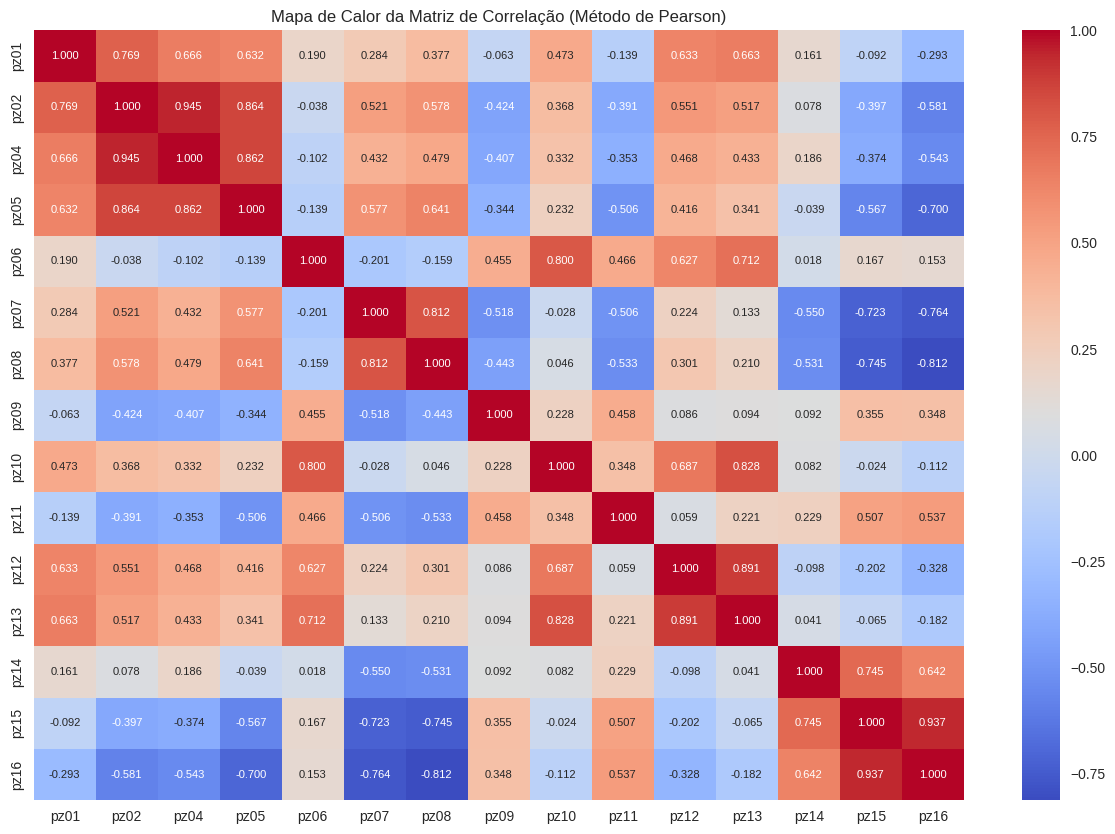

In [301]:
# Calcular a matriz de correlação usando o método de Pearson
correlation_matrix = data.corr(method='pearson')

# Plotar o heatmap da matriz de correlação com tamanho de fonte menor
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", annot_kws={"size": 8})
plt.title('Mapa de Calor da Matriz de Correlação (Método de Pearson)')
plt.savefig('/content/drive/MyDrive/Mestrado/imagens/Dataset02/corr_pearson_dataset02_pzs.png', dpi=300)
plt.show()

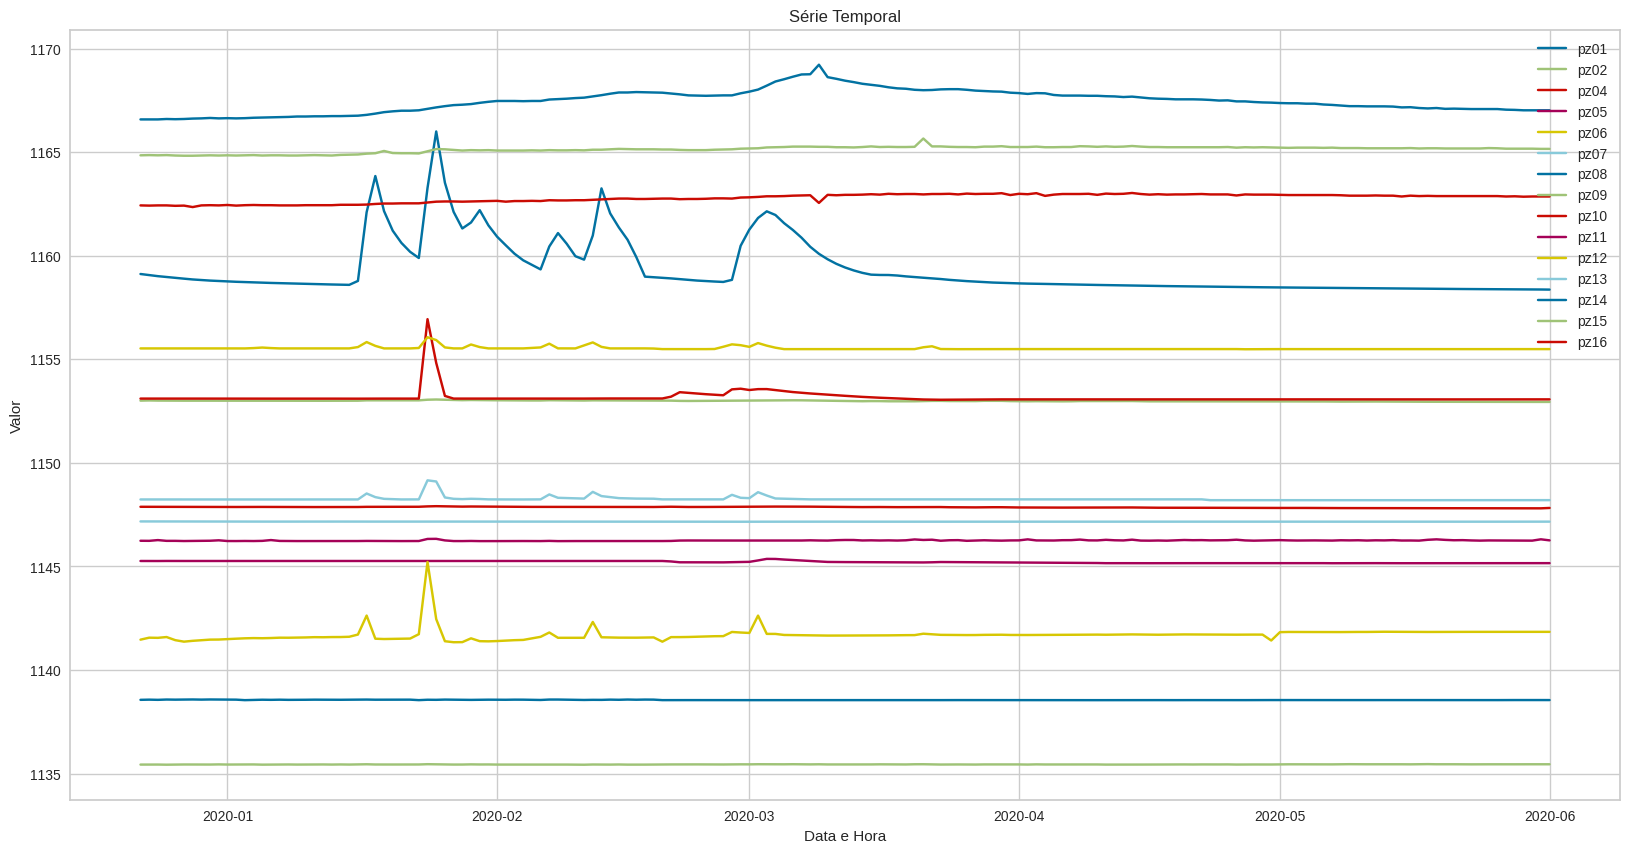

In [302]:
# Plotar a série temporal
plt.figure(figsize=(20, 10))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.title('Série Temporal')
plt.xlabel('Data e Hora')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Mestrado/imagens/Dataset02/serie_temporal_dataset02_pzs.png', dpi=300)
plt.show()

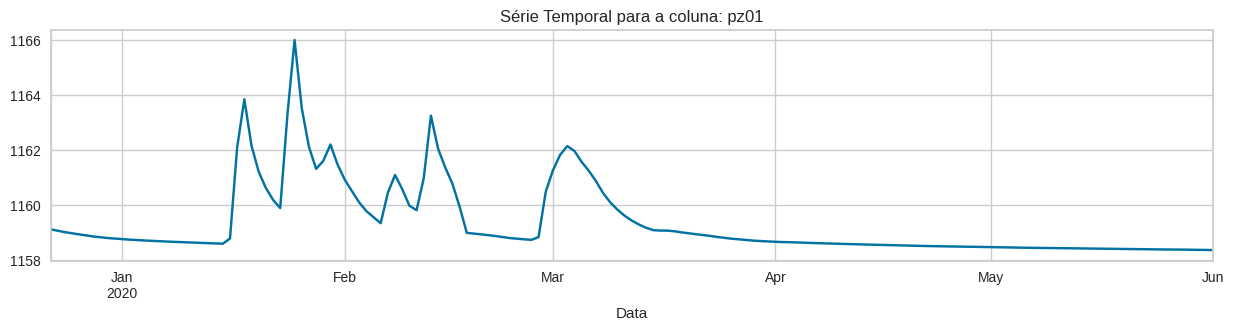

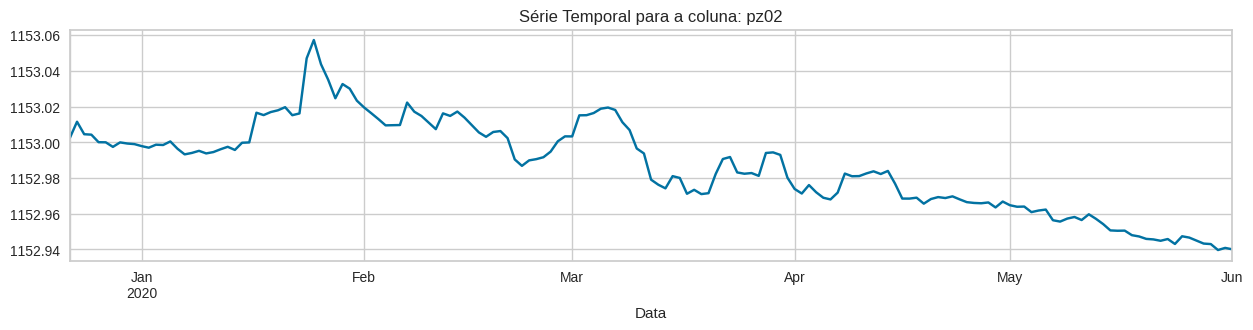

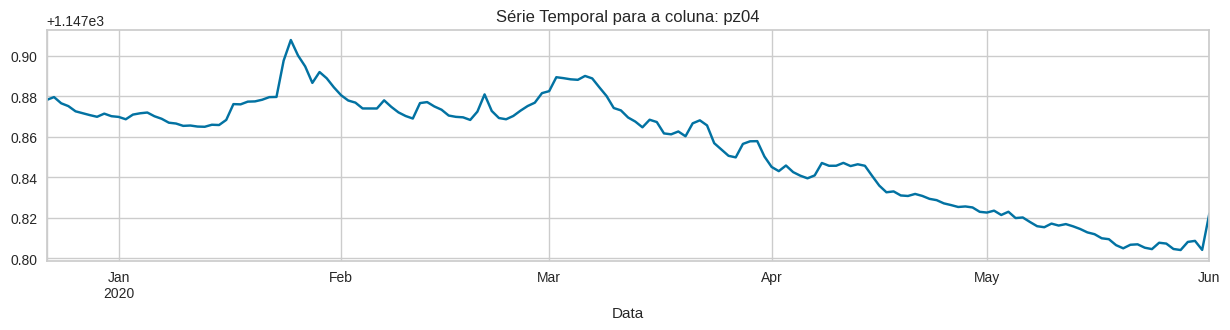

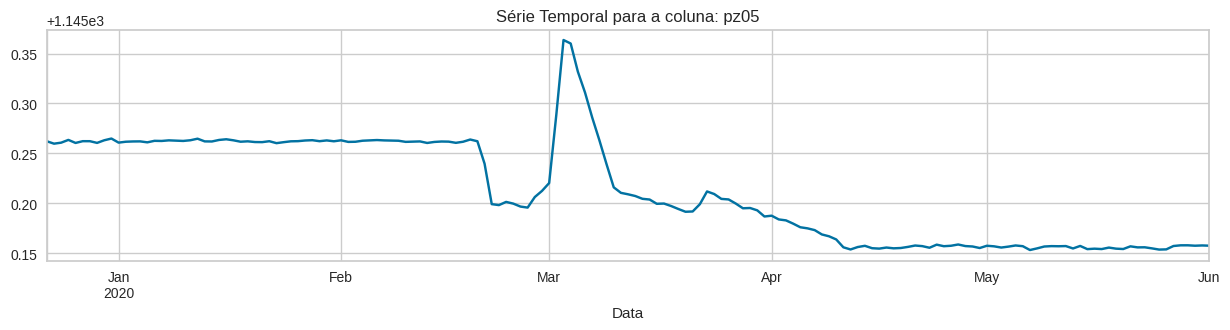

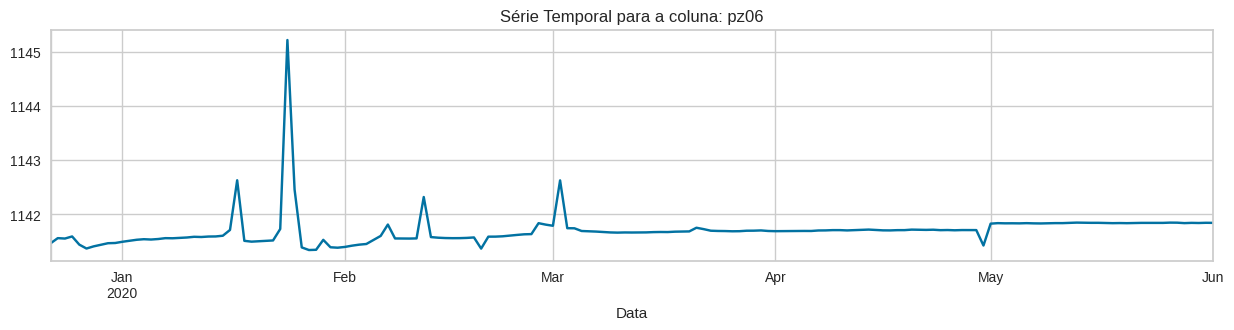

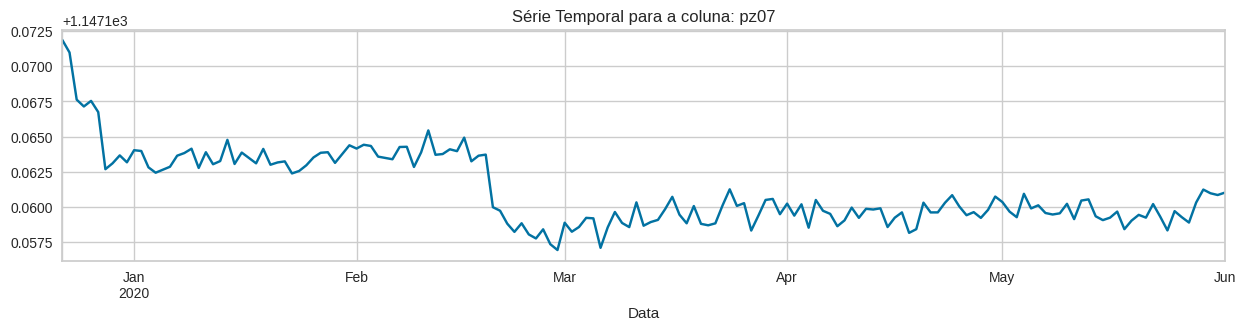

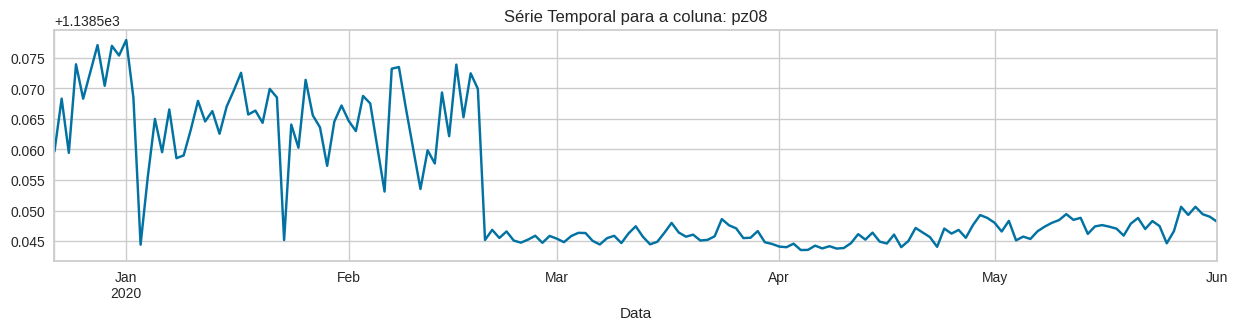

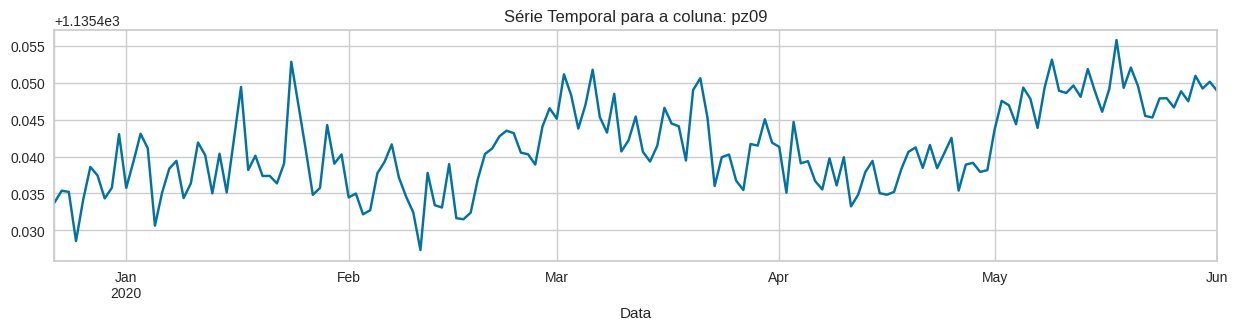

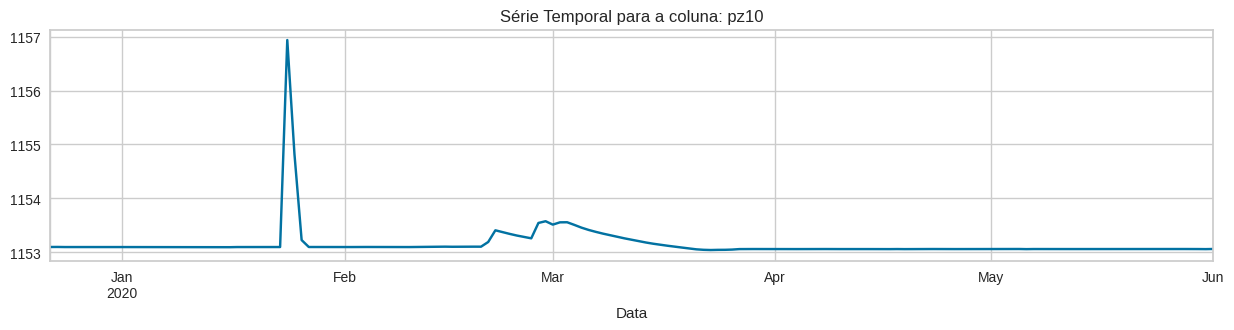

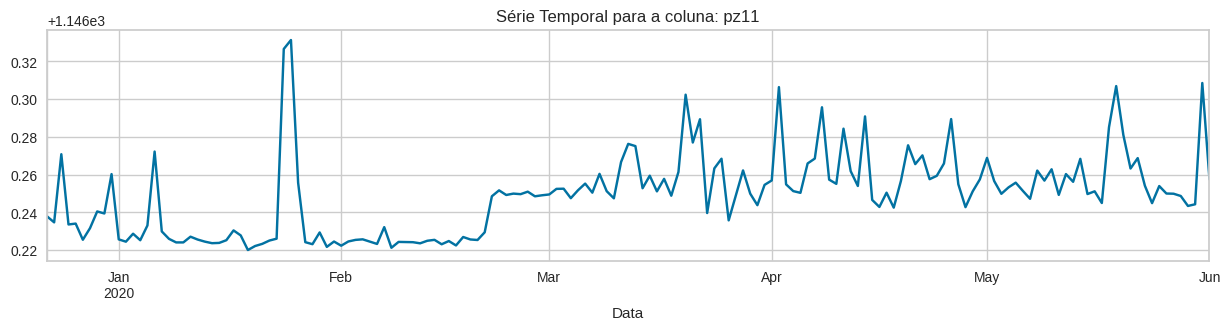

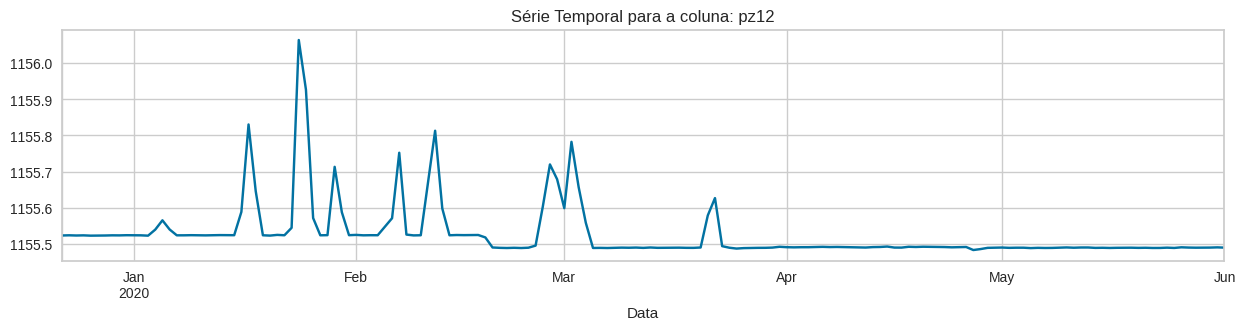

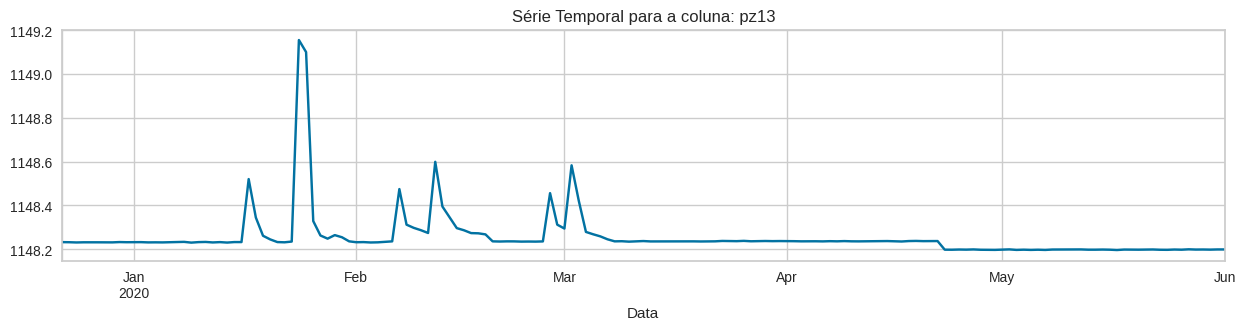

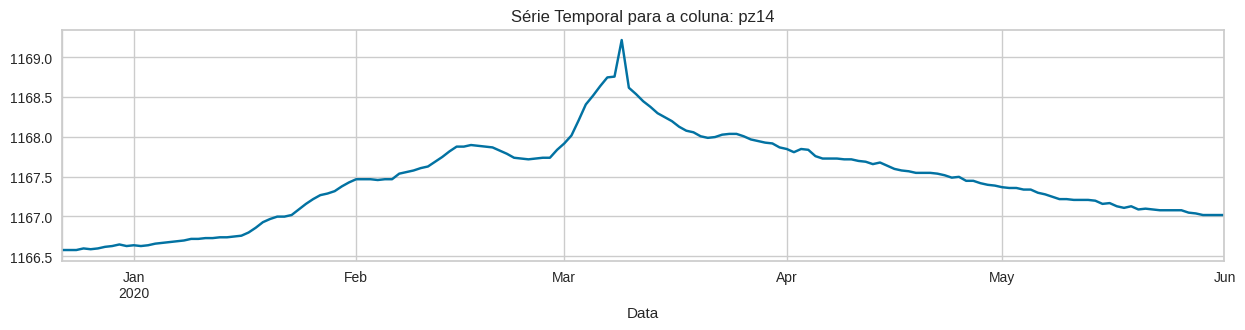

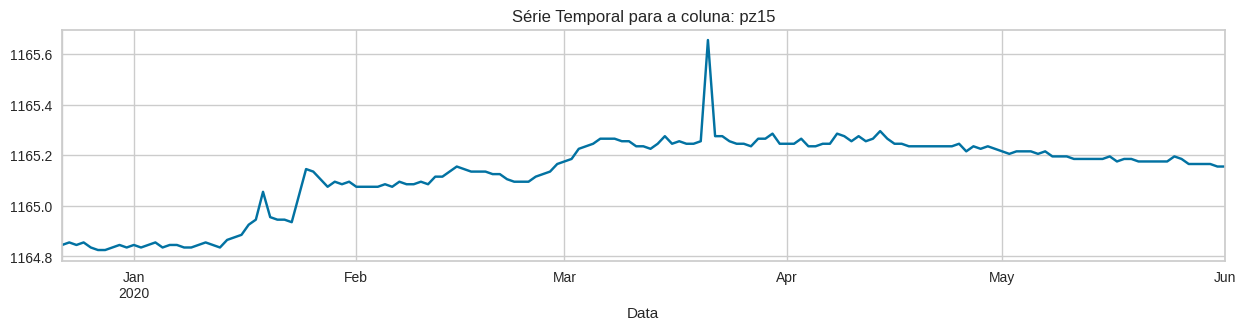

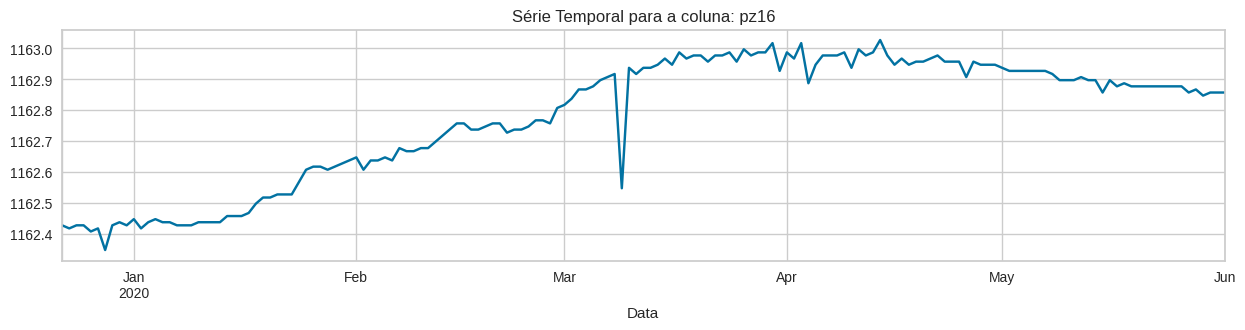

In [303]:
# Iterar sobre as colunas do DataFrame
for column in data.columns:
    # Plotar a série temporal de cada coluna
    plt.figure(figsize=(15, 3))
    data[column].plot()

    # Adicionar título ao gráfico
    plt.title(f'Série Temporal para a coluna: {column}')

    # Salvar a imagem com o nome da coluna
    nome_do_arquivo = f'/content/drive/MyDrive/Mestrado/imagens/{column}_serie_temporal.png'
    plt.savefig(nome_do_arquivo, dpi=300)

    # Exibir o gráfico
    plt.show()

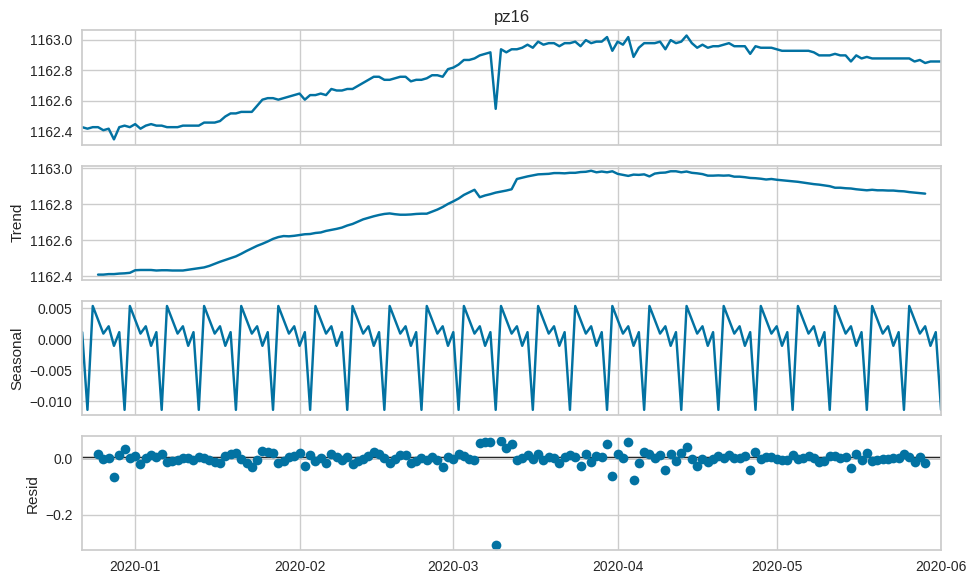

In [304]:
# Decomposição da série temporal
result = seasonal_decompose(data['pz16'], model='additive', period=7)

# Plotando os componentes
plt.rcParams['figure.figsize'] = [10, 6]
result.plot()
plt.show()

In [305]:

# Dividindo o DataFrame em dois subconjuntos
subset1 = data.reset_index()[['Data', 'pz01', 'pz02', 'pz04', 'pz05', 'pz07', 'pz08', 'pz10', 'pz12', 'pz13']]
subset2 = data.reset_index()[['Data', 'pz06', 'pz09', 'pz11', 'pz14', 'pz15', 'pz16']]

# Visualizando os primeiros registros de cada subconjunto
print("Subset 1:")
print(subset1.head())
print("\nSubset 2:")
print(subset2.head())

Subset 1:
        Data         pz01         pz02         pz04         pz05         pz07  \
0 2019-12-22  1159.115552  1153.002420  1147.878218  1145.262171  1147.171859   
1 2019-12-23  1159.062807  1153.011490  1147.879594  1145.259774  1147.170972   
2 2019-12-24  1159.011332  1153.004496  1147.876531  1145.260790  1147.167621   
3 2019-12-25  1158.970063  1153.004245  1147.875138  1145.263543  1147.167137   
4 2019-12-26  1158.930182  1153.000024  1147.872569  1145.260504  1147.167534   

          pz08         pz10         pz12         pz13  
0  1138.559694  1153.101231  1155.523278  1148.232515  
1  1138.568308  1153.102087  1155.523784  1148.232064  
2  1138.559440  1153.100190  1155.523218  1148.231010  
3  1138.573925  1153.100426  1155.523617  1148.231738  
4  1138.568303  1153.101723  1155.522791  1148.231956  

Subset 2:
        Data         pz06         pz09         pz11      pz14      pz15  \
0 2019-12-22  1141.464434  1135.433764  1146.237879  1166.578  1164.845   
1 2019

In [306]:
subset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    163 non-null    datetime64[ns]
 1   pz06    163 non-null    float64       
 2   pz09    163 non-null    float64       
 3   pz11    163 non-null    float64       
 4   pz14    163 non-null    float64       
 5   pz15    163 non-null    float64       
 6   pz16    163 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 9.0 KB


In [307]:
# Convertendo a coluna 'TIMESTAMP' para o formato datetime
subset2['Data'] = pd.to_datetime(subset2['Data'], format='%d/%m/%Y')

# Definindo 'TIMESTAMP' como índice do DataFrame
subset2.set_index('Data', inplace=True)

In [308]:
# Supondo que 'data' é um DataFrame Pandas e 'target' é a coluna que você deseja prever
X = subset2.drop('pz16', axis=1)  # Substitua 'target' pelo nome real da sua variável dependente
y = subset2['pz16']  # Variável dependente

In [309]:
# Dividir os dados em treino e teste não é tão simples quanto uma divisão aleatória em dados temporais
# Walk-Forward Validation para séries temporais
n_train = int(len(X) * 0.8)
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

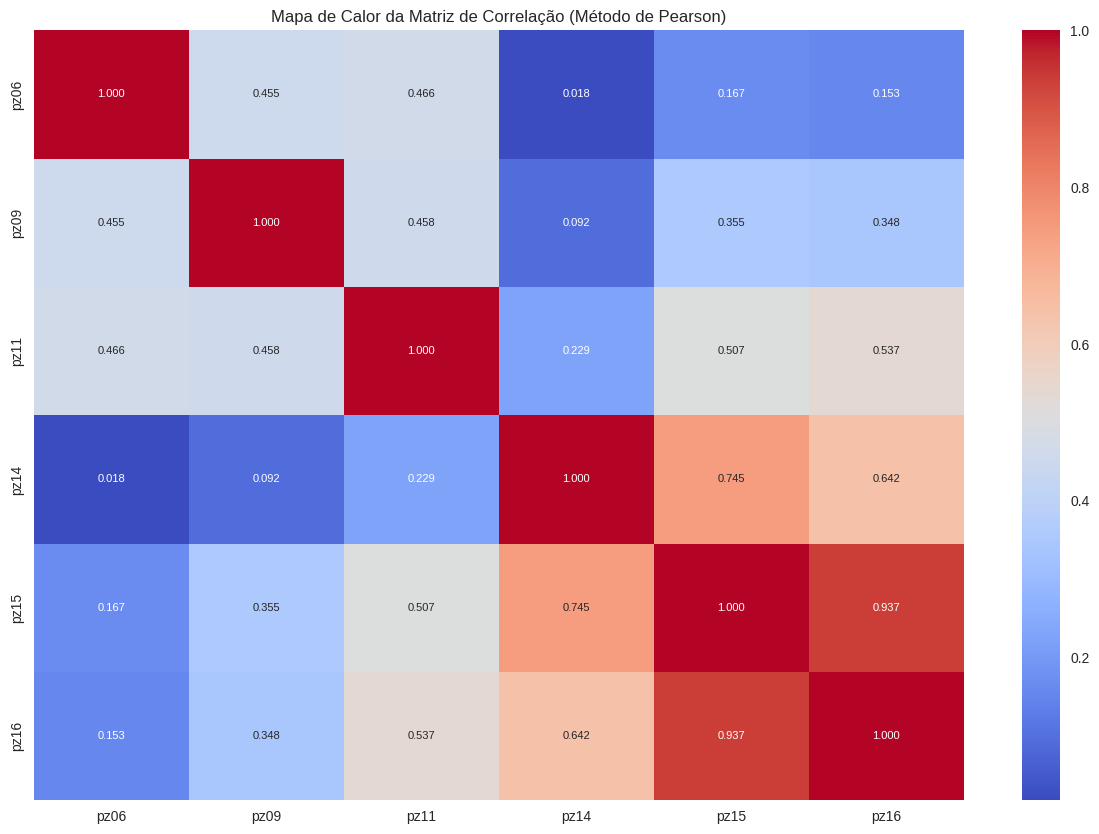

In [310]:
# Calcular a matriz de correlação usando o método de Pearson
correlation_matrix = subset2.corr(method='pearson')

# Plotar o heatmap da matriz de correlação com tamanho de fonte menor
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", annot_kws={"size": 8})
plt.title('Mapa de Calor da Matriz de Correlação (Método de Pearson)')
plt.savefig('/content/drive/MyDrive/Mestrado/imagens/Dataset02/corr_pearson_subset02_dataset02_pzs.png', dpi=300)
plt.show()

In [311]:
#teste

# Criar uma instância do MinMaxScaler e ajustar apenas nos dados de treino
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Usar o scaler ajustado para transformar os dados de teste
X_test_scaled = scaler.transform(X_test)

In [312]:
# Converter de volta para DataFrames, se necessário
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [313]:
X_train_scaled_df

pz06      pz09      pz11      pz14      pz15
Data                                                        
2019-12-22  0.031995  0.252245  0.160604  0.000000  0.024096
2019-12-23  0.056557  0.314993  0.131742  0.000000  0.036145
2019-12-24  0.054668  0.308796  0.456221  0.000000  0.024096
2019-12-25  0.064644  0.047296  0.121695  0.007576  0.036145
2019-12-26  0.025743  0.266991  0.125811  0.003788  0.012048
...              ...       ...       ...       ...       ...
2020-04-25  0.095203  0.595984  0.412091  0.348485  0.506024
2020-04-26  0.094014  0.315777  0.623538  0.329545  0.469880
2020-04-27  0.095035  0.453861  0.313319  0.329545  0.493976
2020-04-28  0.095120  0.463195  0.204141  0.318182  0.481928
2020-04-29  0.094869  0.414801  0.278966  0.310606  0.493976

[130 rows x 5 columns]

In [314]:
X_test_scaled_df

pz06      pz09      pz11      pz14      pz15
Data                                                        
2020-04-30  0.021461  0.424409  0.336332  0.306818  0.481928
2020-05-01  0.125564  0.637711  0.438725  0.299242  0.469880
2020-05-02  0.127978  0.792306  0.328451  0.295455  0.457831
2020-05-03  0.127130  0.769324  0.267734  0.295455  0.469880
2020-05-04  0.127311  0.667948  0.298330  0.287879  0.469880
2020-05-05  0.126950  0.862897  0.320741  0.287879  0.469880
2020-05-06  0.127938  0.803090  0.281464  0.272727  0.457831
2020-05-07  0.126953  0.648653  0.243903  0.265152  0.469880
2020-05-08  0.126545  0.865995  0.378278  0.253788  0.445783
2020-05-09  0.127540  1.011177  0.330581  0.242424  0.445783
2020-05-10  0.128112  0.845759  0.384442  0.242424  0.445783
2020-05-11  0.128066  0.834543  0.262468  0.238636  0.433735
2020-05-12  0.129434  0.873799  0.361618  0.238636  0.433735
2020-05-13  0.130533  0.813875  0.324857  0.238636  0.433735
2020-05-14  0.129763  0.961253  0.434116  0.234848  0.433735
2020-05-15  0.129456  0.842660  0.266476  0.219697  0.433735
2020-05-16  0.129522  0.734146  0.279559  0.223485  0.445783
2020-05-17  0.128807  0.856504  0.223811  0.208333  0.421687
2020-05-18  0.127913  1.115573  0.585024  0.200758  0.433735
2020-05-19  0.128387  0.861799  0.780628  0.208333  0.433735
2020-05-20  0.127852  0.969214  0.547409  0.193182  0.421687
2020-05-21  0.128510  0.870544  0.388117  0.196970  0.421687
2020-05-22  0.129216  0.712499  0.437674  0.193182  0.421687
2020-05-23  0.129058  0.703832  0.306121  0.189394  0.421687
2020-05-24  0.129119  0.805404  0.223191  0.189394  0.421687
2020-05-25  0.129191  0.806267  0.304621  0.189394  0.445783
2020-05-26  0.130460  0.757245  0.269037  0.189394  0.433735
2020-05-27  0.130183  0.843327  0.268102  0.178030  0.409639
2020-05-28  0.128106  0.790227  0.257283  0.174242  0.409639
2020-05-29  0.129289  0.925566  0.209874  0.166667  0.409639
2020-05-30  0.128676  0.858073  0.217844  0.166667  0.409639
2020-05-31  0.129684  0.893957  0.795338  0.166667  0.397590
2020-06-01  0.129305  0.846308  0.336520  0.166667  0.397590

In [315]:
# Definir o grau do polinômio para o modelo de regressão polinomial
degree1 = 2  # Ou outro valor que você deseja testar
degree2 = 3  # Ou outro valor que você deseja testar

In [316]:
# Inicializar modelos
lr = LinearRegression()
lr2 = Pipeline([('Poly', PolynomialFeatures(degree=degree1)),('linear', LinearRegression())])
lr3 = Pipeline([('Poly', PolynomialFeatures(degree=degree2)),('linear', LinearRegression())])
rf = RandomForestRegressor(n_estimators=50, random_state=42)
grbt  = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
hist_grbt = HistGradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, max_iter=1000, random_state=42)
mlp1 = MLPRegressor(hidden_layer_sizes=(10, 20, 30, 20, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp2 = MLPRegressor(hidden_layer_sizes=(10, 20, 30, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp3 = MLPRegressor(hidden_layer_sizes=(10, 30, 20, 30, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp4 = MLPRegressor(hidden_layer_sizes=(20, 30, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp5 = MLPRegressor(hidden_layer_sizes=(30, 20, 50, 30, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp6 = MLPRegressor(hidden_layer_sizes=(20, 30, 50), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)



In [317]:
# Lista para facilitar o treinamento e avaliação
models = [lr, lr2, lr3, rf, grbt, hist_grbt, mlp1, mlp2, mlp3, mlp4, mlp5, mlp6]
model_names = ['Linear Regression', 'Linear Regression Poly1', 'Linear Regression Poly2', 'Random Forest', 'Gradient Boosting',  'HistGradient Boosting', 'MLP 10-20-30-20-10', 'MLP 10-20-30-10', 'MLP 10-30-20-30-10', 'MLP 20-30-10', 'MLP 30-20-50-30-10', 'MLP 20-30-50']


In [318]:
# Definir o intervalo para a re-treinamento para o # Walk-Forward Validation reduzido
n = 1  # Escolha um valor para 'n' baseado no seu caso de uso

In [319]:
# Lista para armazenar os erros de previsão de cada passo
errors = []

In [320]:
# Walk-Forward Validation reduzido
for i in range(0, len(X_test), n):
    # Atualizar os conjuntos de dados para a iteração atual do walk-forward
    # Certifique-se de não ultrapassar o fim do conjunto de dados
    end_idx = min(i + n, len(X_test))
    X_train_iter = pd.concat([X_train, X_test[:i]])
    y_train_iter = pd.concat([y_train, y_test[:i]])

    # Treinar modelos
    for model in models:
      model.fit(X_train_iter, y_train_iter)

    # Fazer previsões para o próximo bloco
    y_pred = model.predict(X_test.iloc[i:end_idx])

    # Calcular e armazenar os erros de previsão para o bloco atual
    errors.extend(mean_squared_error(y_test.iloc[i:end_idx], y_pred, multioutput='raw_values'))

    # Você pode querer calcular a média dos erros se estiver interessado em uma métrica de erro único
    mean_error = sum(errors) / len(errors)
    print(f"Erro médio: {mean_error}")

Erro médio: 0.027588541180103232
Erro médio: 0.0471187668716098
Erro médio: 0.04660680337064998
Erro médio: 0.043914651475630846
Erro médio: 0.047897136795539044
Erro médio: 0.05013468264590438
Erro médio: 0.04843412667522035
Erro médio: 0.04723235360376623
Erro médio: 0.04581872675042597
Erro médio: 0.04417490575652471
Erro médio: 0.04523178682201537
Erro médio: 0.04398195313097928
Erro médio: 0.045786561196452885
Erro médio: 0.044529549341953245
Erro médio: 0.04330542412951548
Erro médio: 0.04170921130660214
Erro médio: 0.040950291226633004
Erro médio: 0.04008340039877407
Erro médio: 0.039199956901413625
Erro médio: 0.03972893817281627
Erro médio: 0.040229048595733376
Erro médio: 0.03997155927177368
Erro médio: 0.03917888445630667
Erro médio: 0.03853715531332985
Erro médio: 0.03792102056259723
Erro médio: 0.037273530106678186
Erro médio: 0.036661779171660976
Erro médio: 0.036631744773382886
Erro médio: 0.036642451024905875
Erro médio: 0.0359179167609464
Erro médio: 0.0363809379698680

In [321]:
# Avaliar modelos e comparar resultados
results = {}
for (name, model) in zip(model_names, models):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse) # RMSE é simplesmente a raiz quadrada do MSE
    r2 = model.score(X_test, y_test)

    results[name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

    print(f'{name} - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2: {r2}')


Linear Regression - MSE: 0.0009493996390987795, MAE: 0.028084032324365828, RMSE: 0.030812329335815875, R2: -0.2933402639175846
Linear Regression Poly1 - MSE: 0.0009149149442740902, MAE: 0.016824941975597318, RMSE: 0.030247560964052792, R2: -0.24636273994462599
Linear Regression Poly2 - MSE: 0.0004625490623421289, MAE: 0.015311308573218135, RMSE: 0.02150695381364197, R2: 0.369882500764088
Random Forest - MSE: 0.00013926060605988199, MAE: 0.005648484848389864, RMSE: 0.011800873105829161, R2: 0.8102892169141945
Gradient Boosting - MSE: 5.8616548771922465e-05, MAE: 0.006048450859962582, RMSE: 0.00765614451090903, R2: 0.9201483342351171
HistGradient Boosting - MSE: 6.479101818423181e-05, MAE: 0.004928978852521223, RMSE: 0.008049286812148752, R2: 0.9117370292689095
MLP 10-20-30-20-10 - MSE: 0.00616591909274067, MAE: 0.0740591632842428, RMSE: 0.07852336653978018, R2: -7.39965710780092
MLP 10-20-30-10 - MSE: 0.009392912413253856, MAE: 0.09253587247923695, RMSE: 0.09691703881802134, R2: -11.795

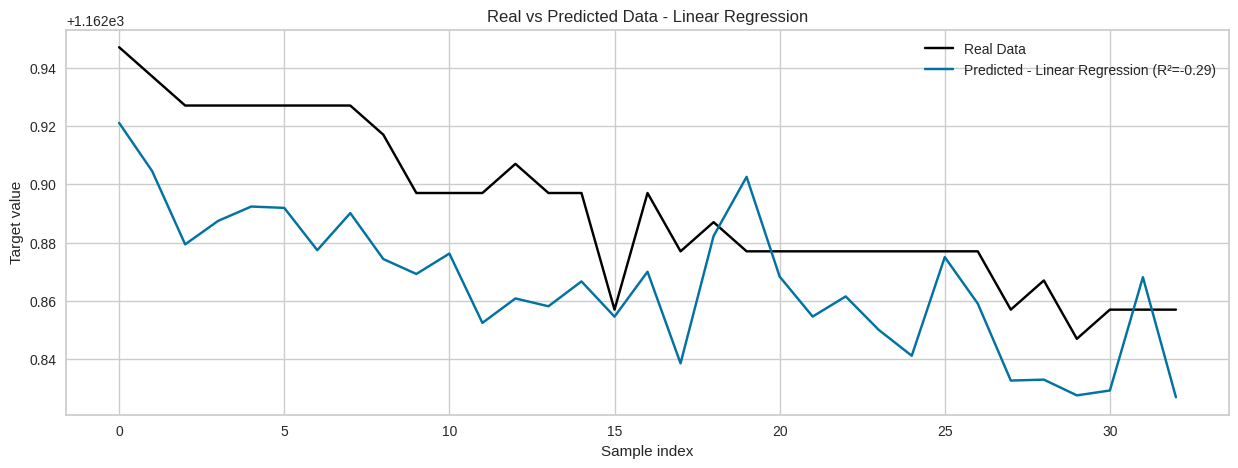

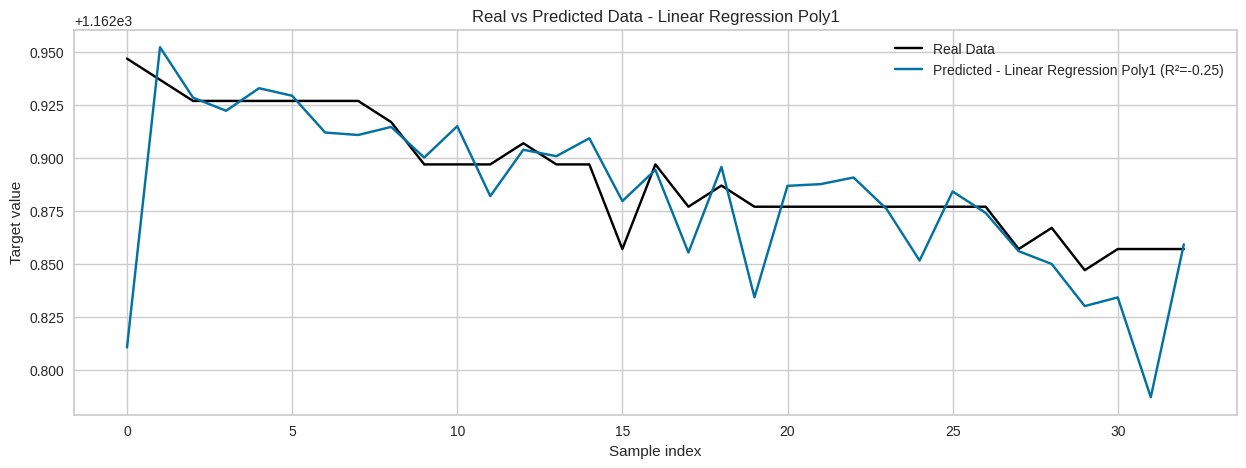

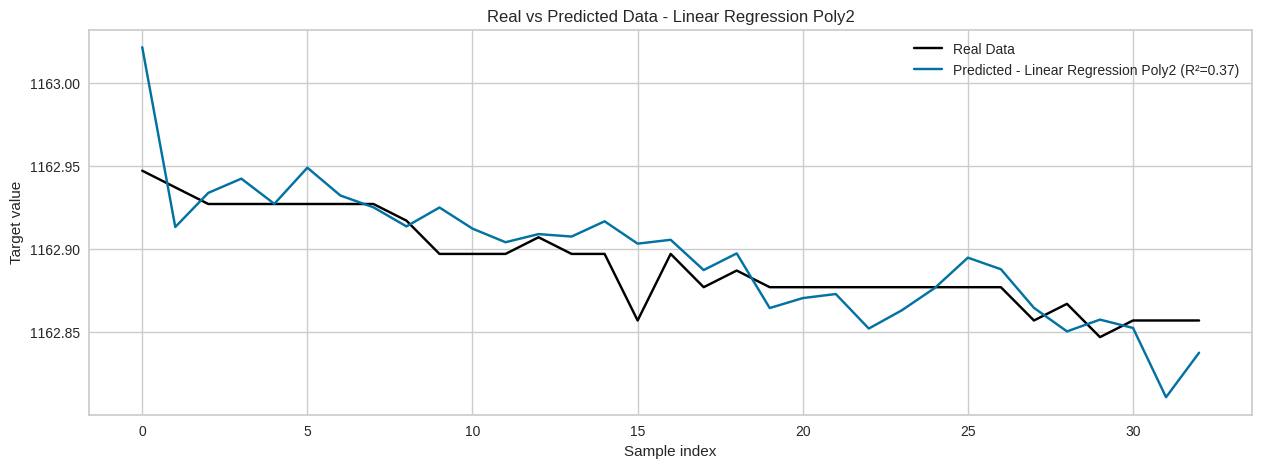

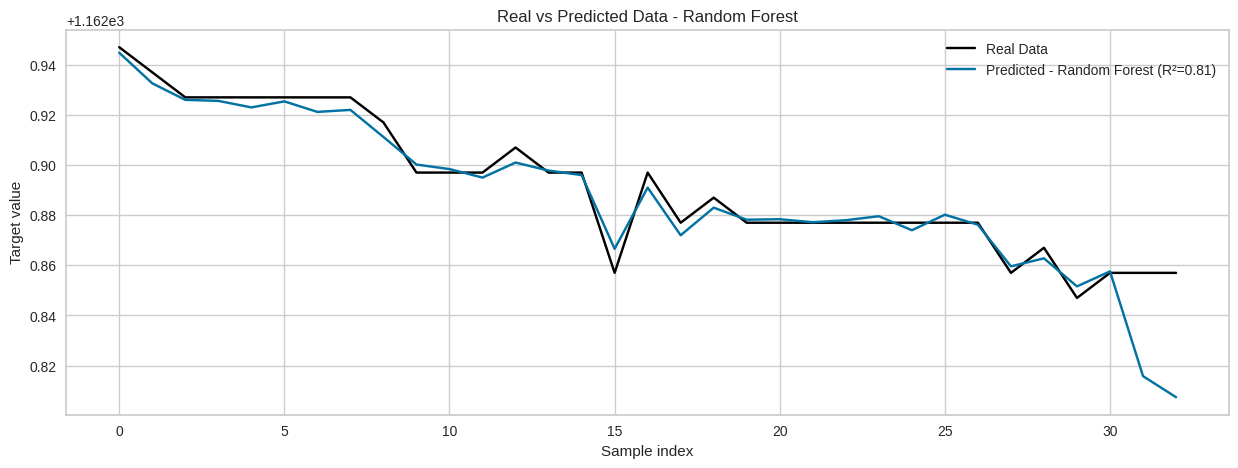

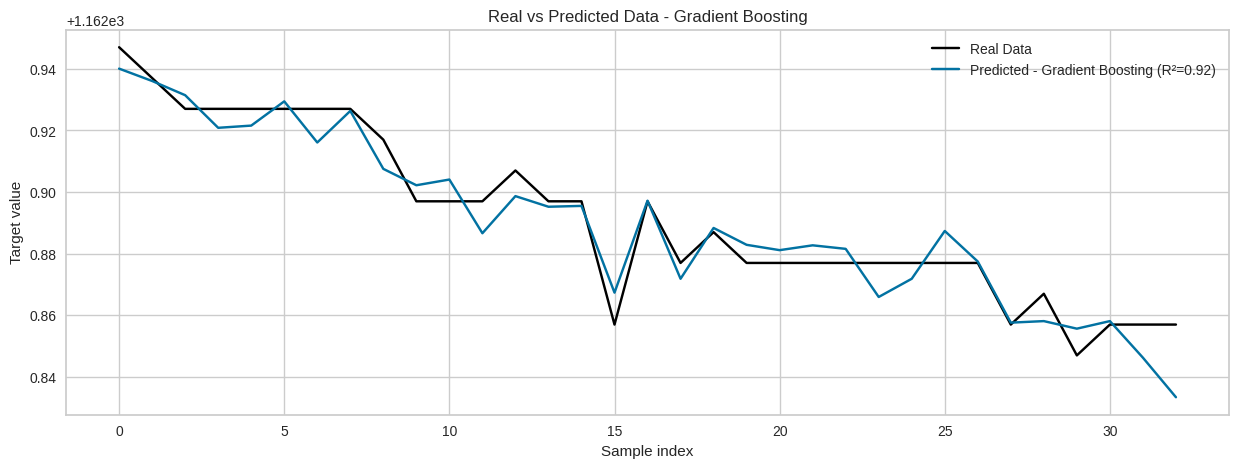

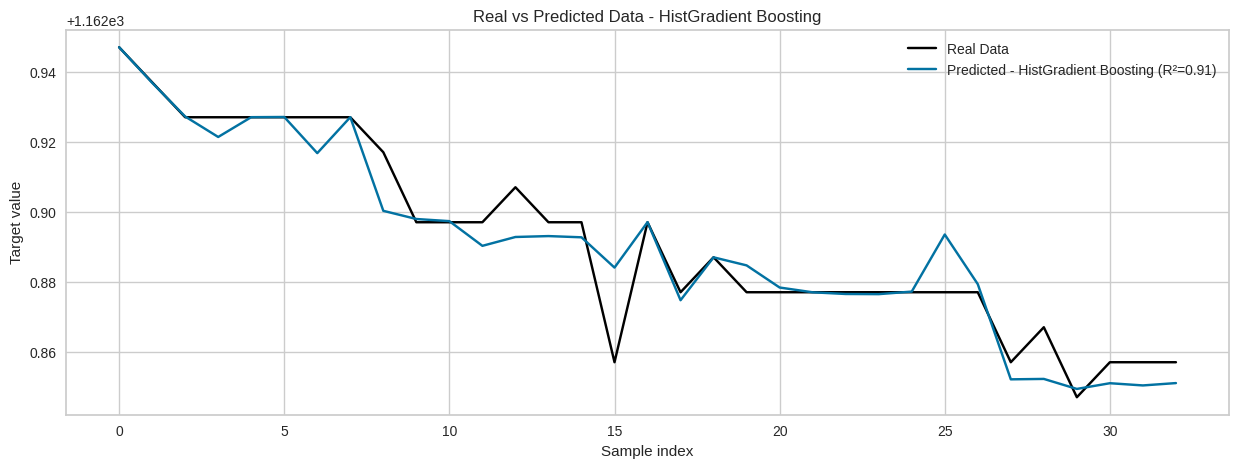

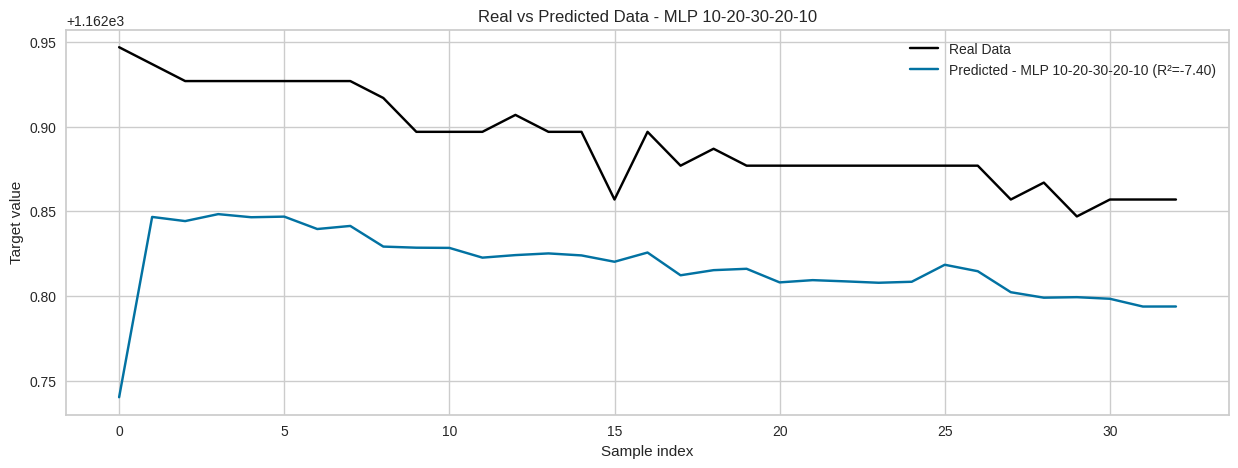

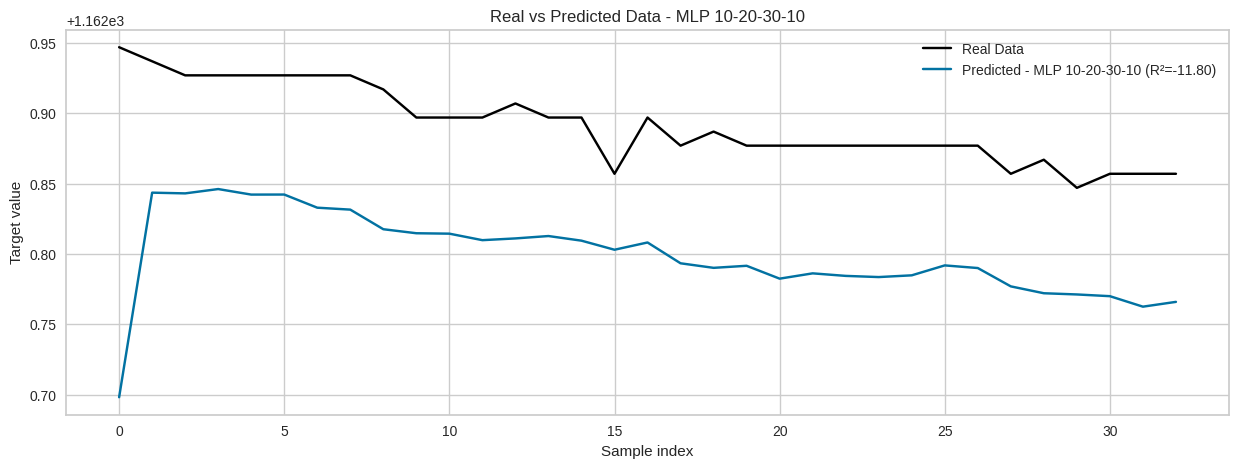

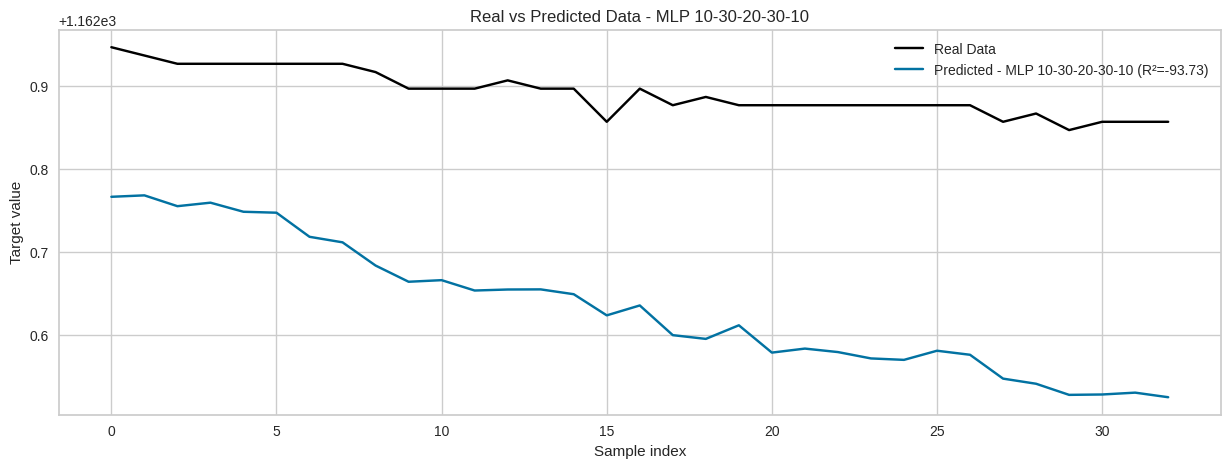

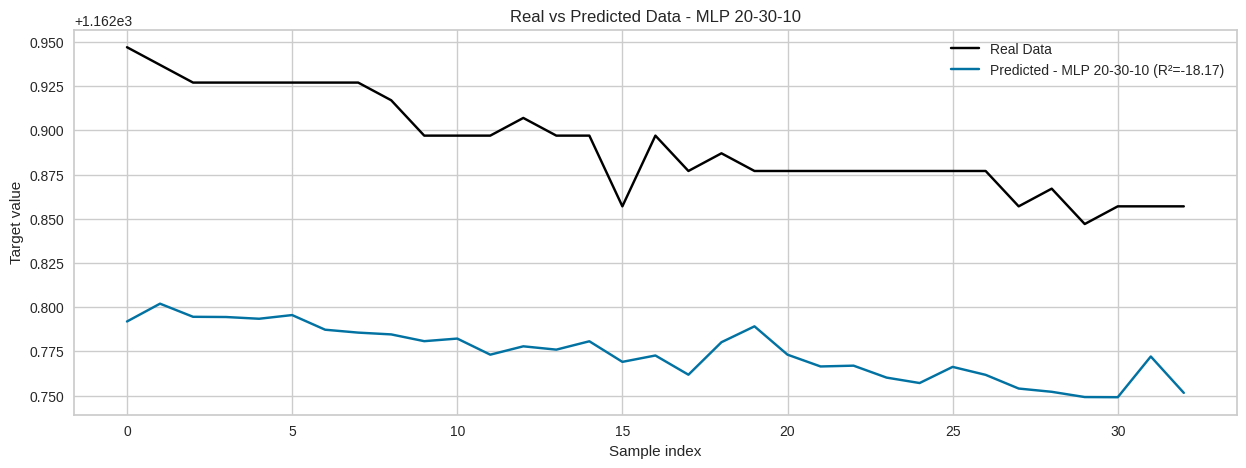

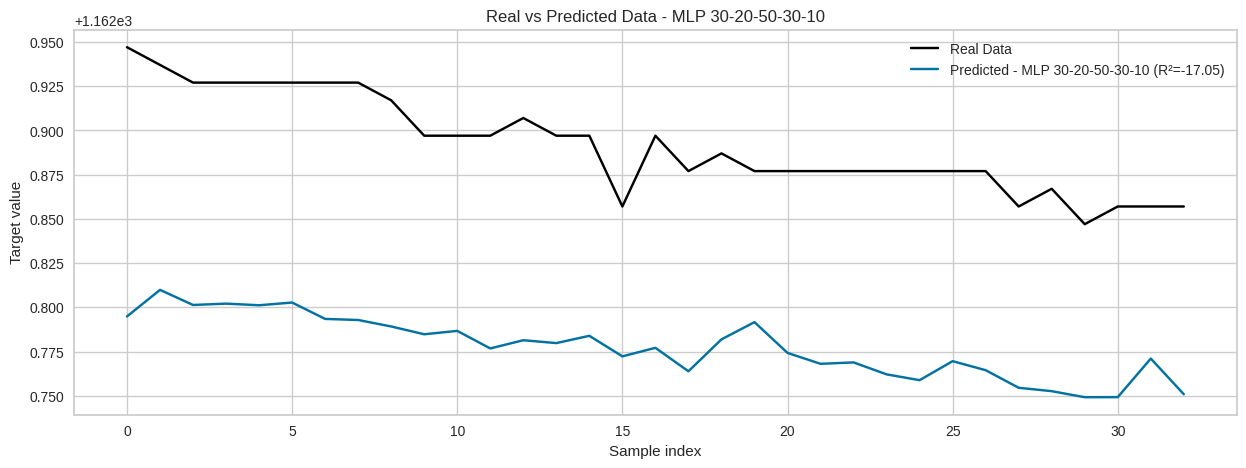

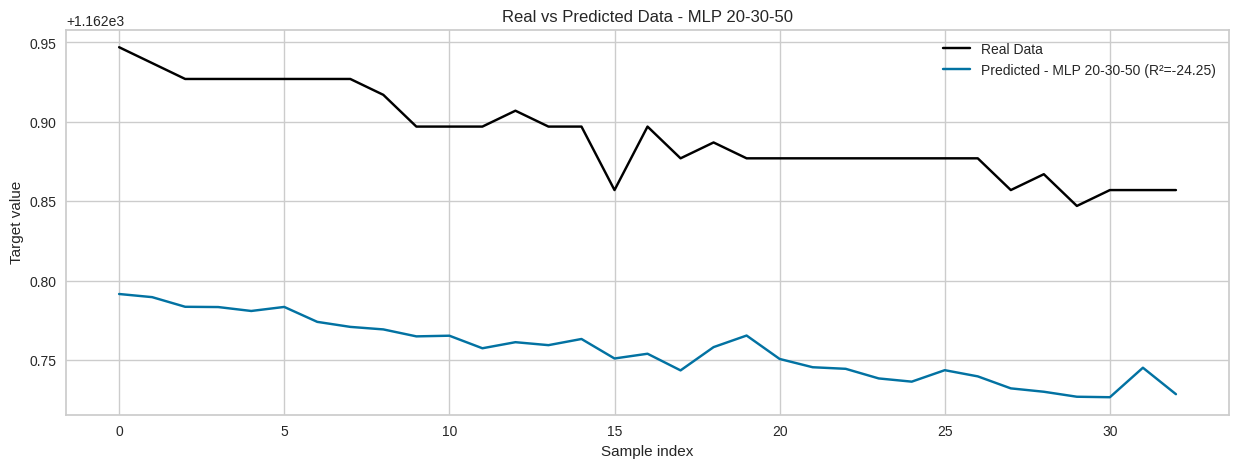

In [322]:
# Supondo que você tenha as variáveis y_test, model_names, models e X_test definidas anteriormente

# Plotar resultados reais vs. previsões para cada modelo em figuras separadas
for (name, model) in zip(model_names, models):
    plt.figure(figsize=(15, 5))  # Cria uma nova figura para cada modelo
    plt.plot(y_test.values, label='Real Data', color='black')

    # Obter previsões do modelo
    predictions = model.predict(X_test)

    # Calcular R²
    r2 = model.score(X_test, y_test)

    # Plotar previsões do modelo na figura atual
    plt.plot(predictions, label=f'Predicted - {name} (R²={r2:.2f})')

    # Adicionando título e legenda
    plt.title(f'Real vs Predicted Data - {name}')
    plt.xlabel('Sample index')
    plt.ylabel('Target value')
    plt.legend()

    # Salvar o gráfico no Google Drive
    plt.savefig(f'/content/drive/MyDrive/Mestrado/imagens/Dataset02{name}_prediction_plot.png', dpi=300)  # Salvar o gráfico como uma imagem PNG
    plt.show()

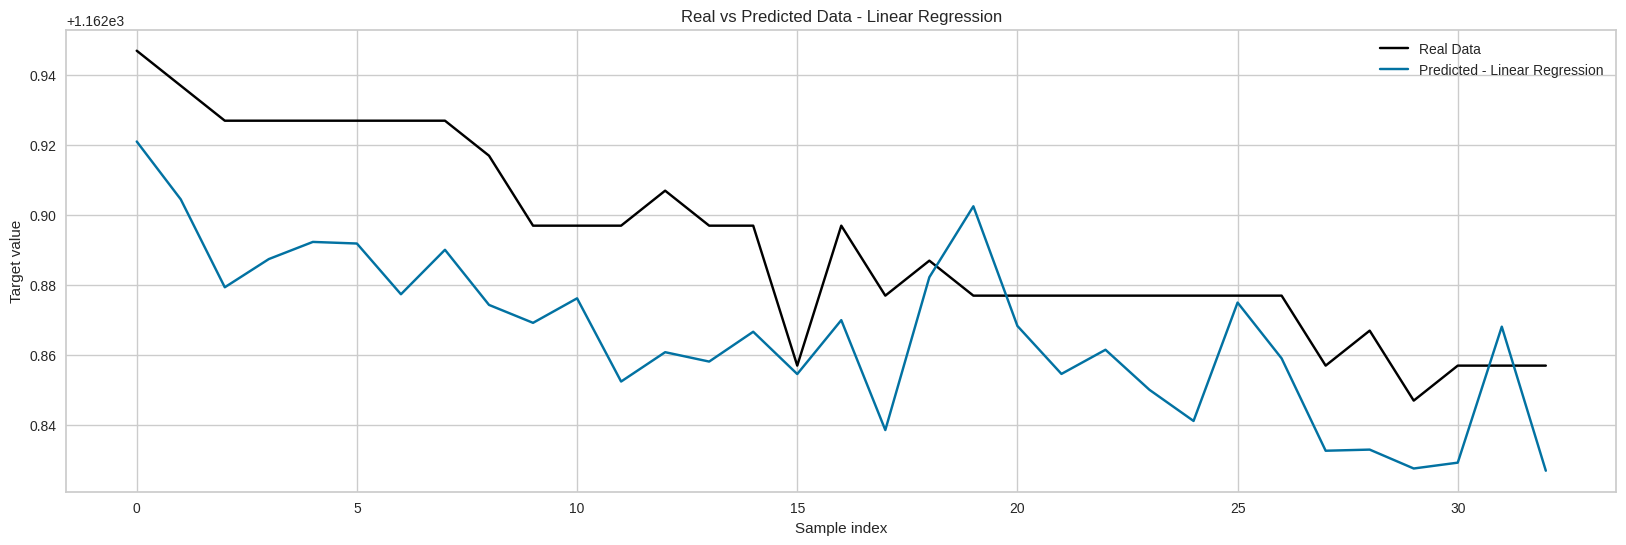

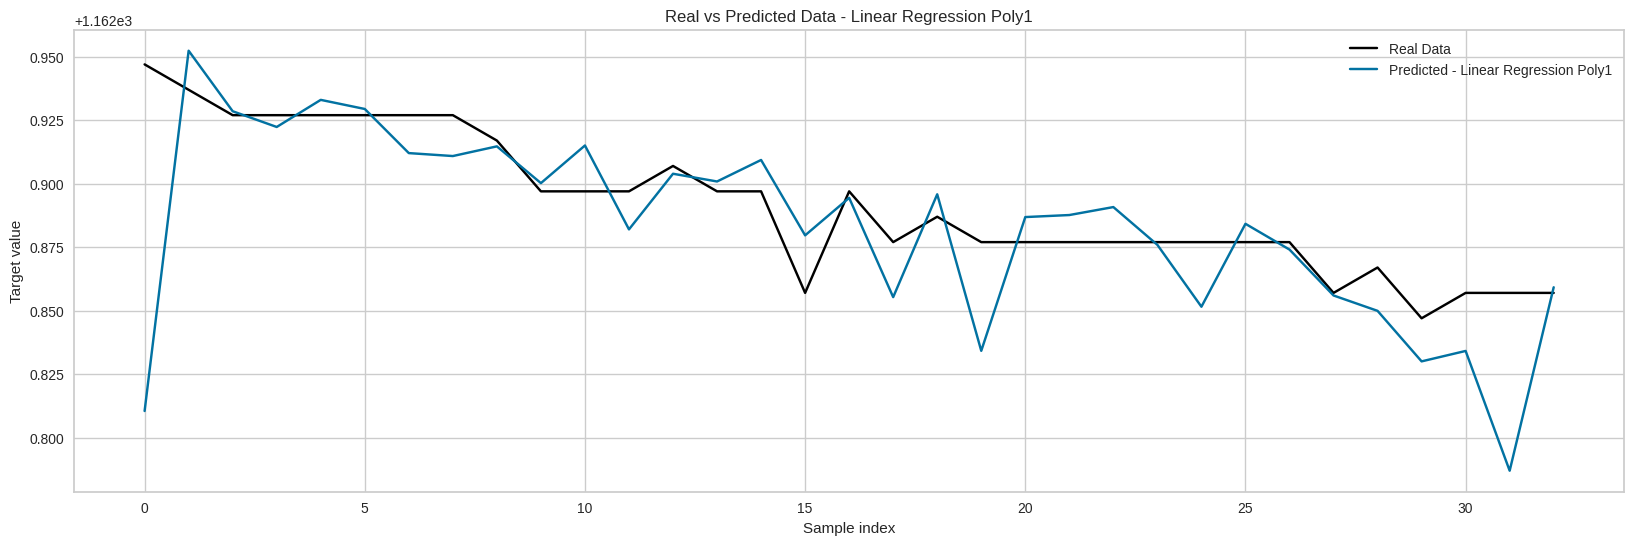

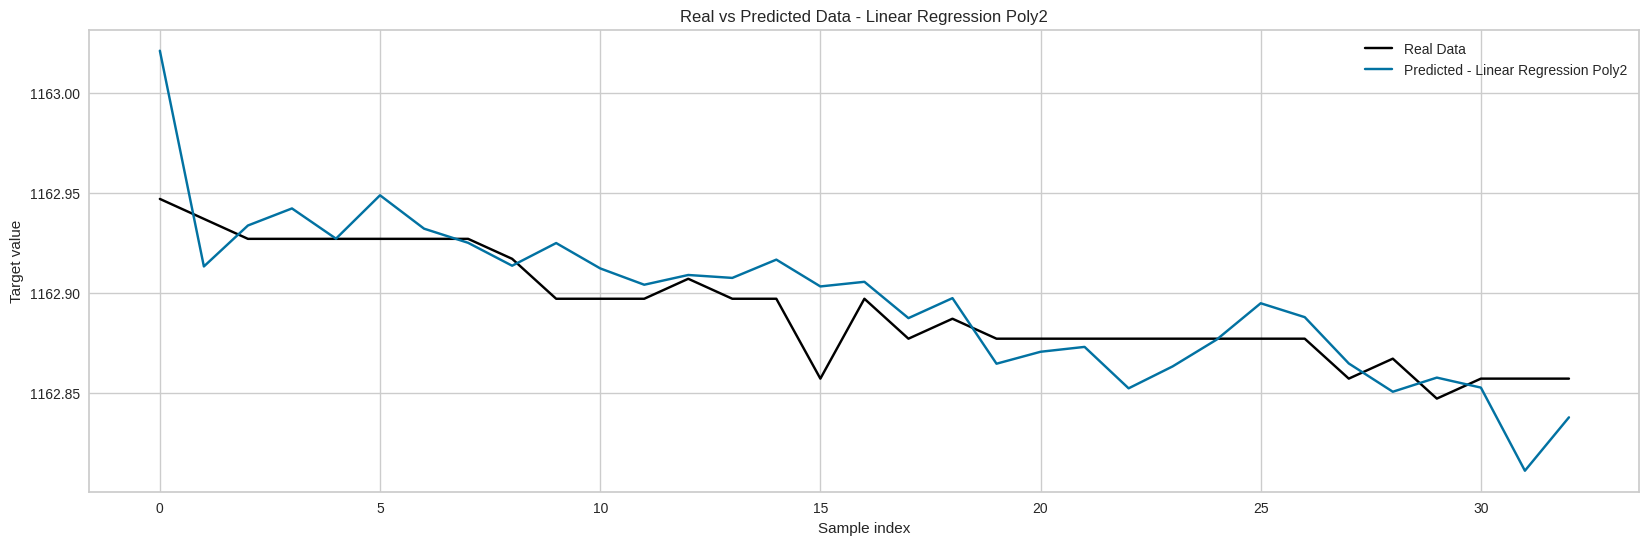

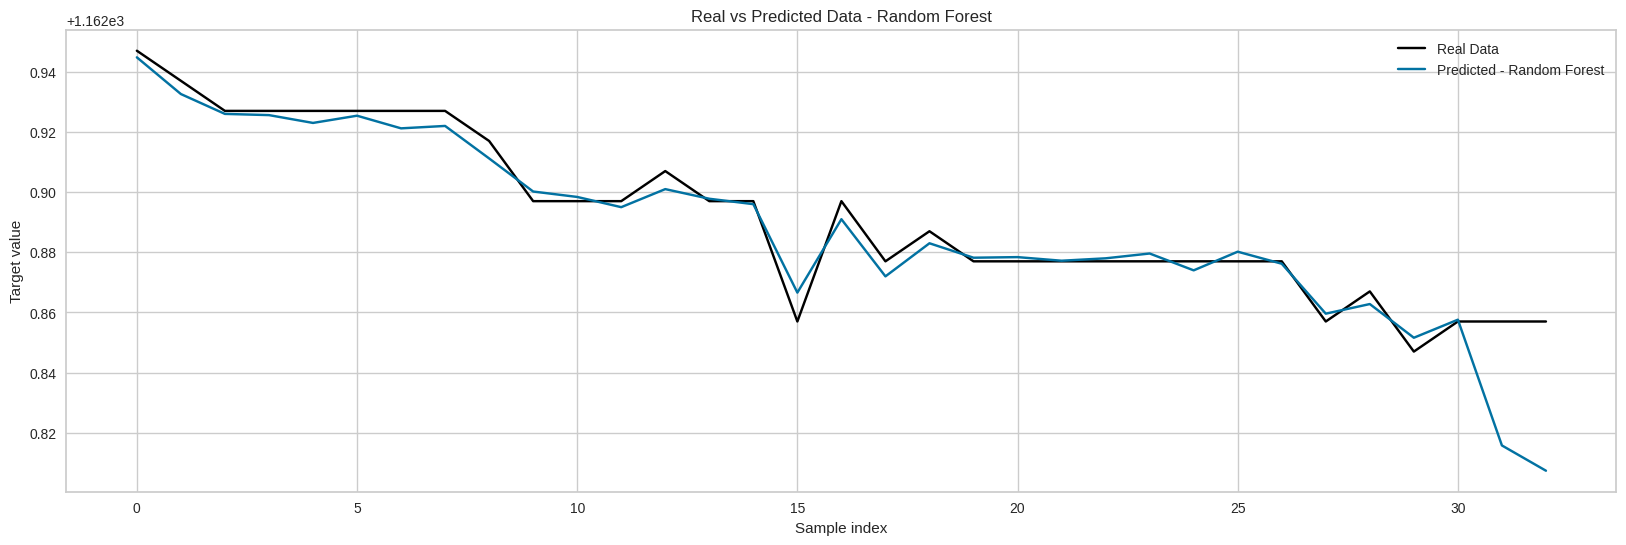

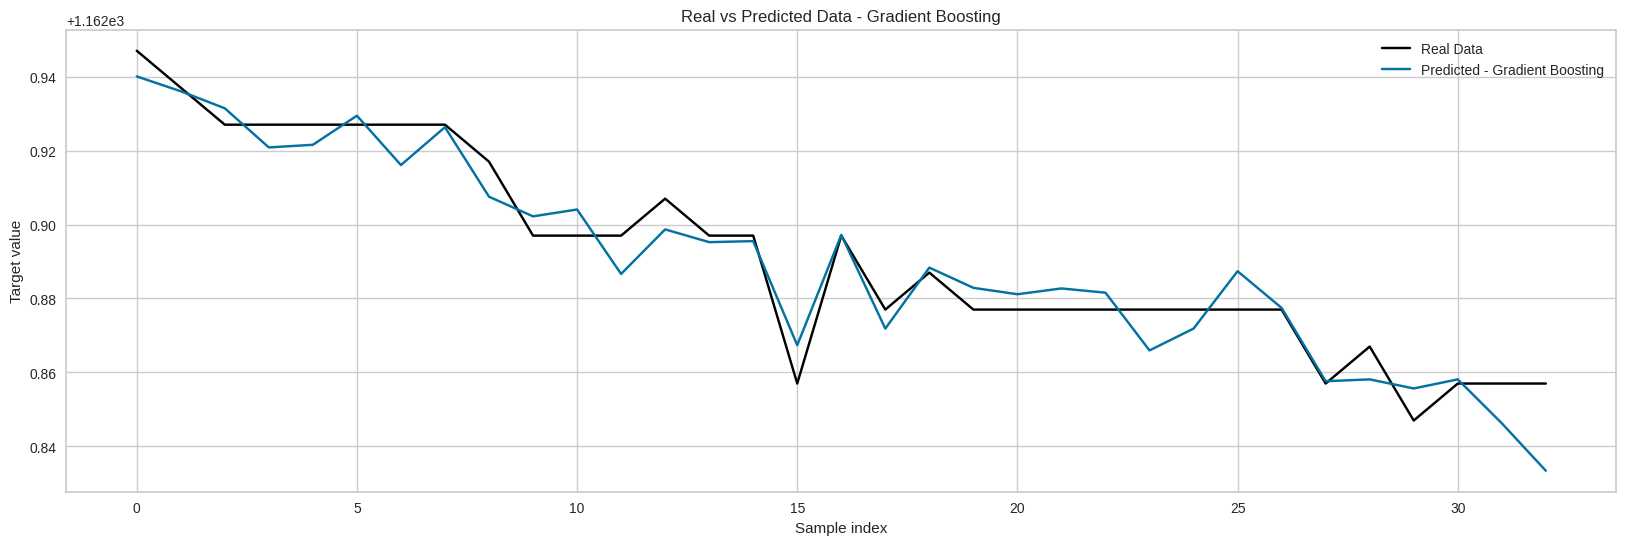

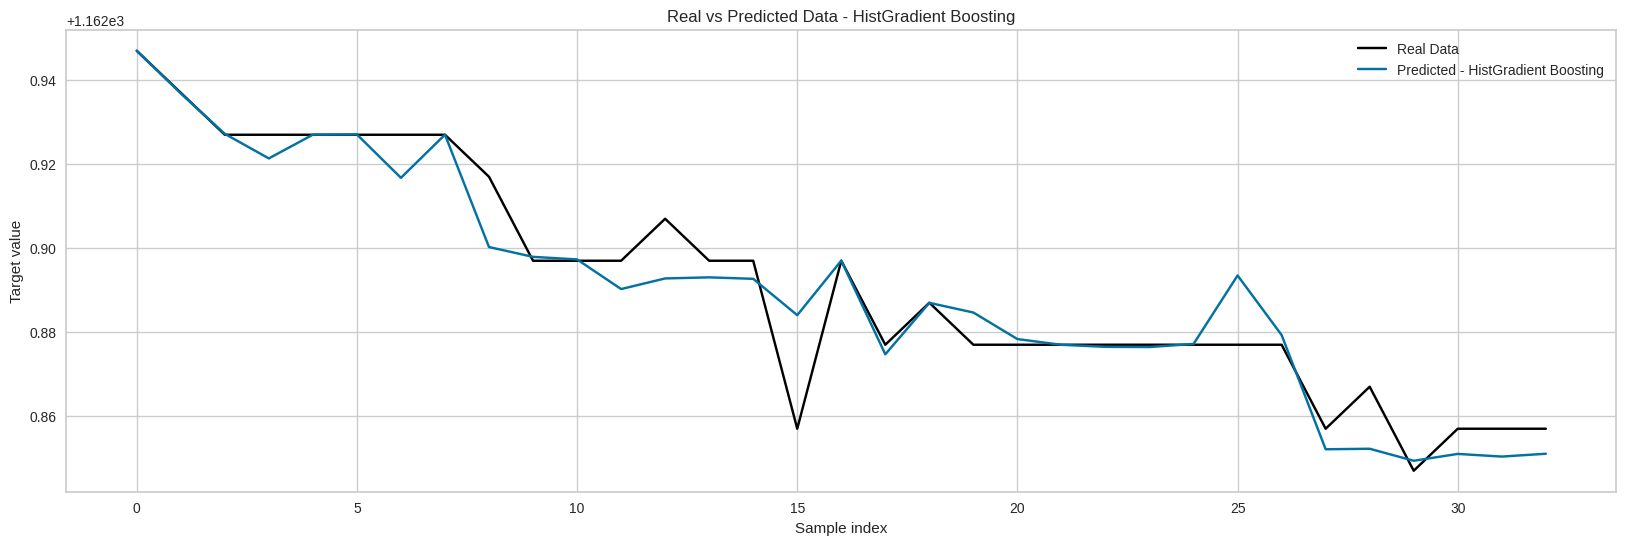

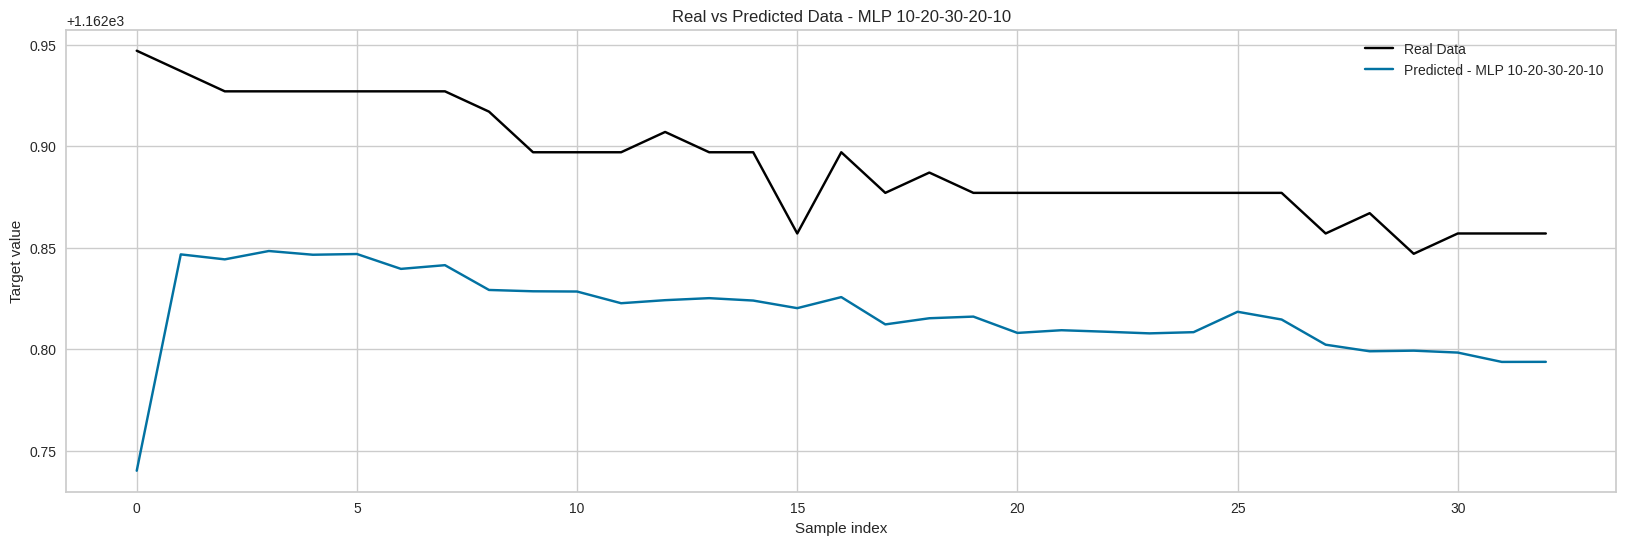

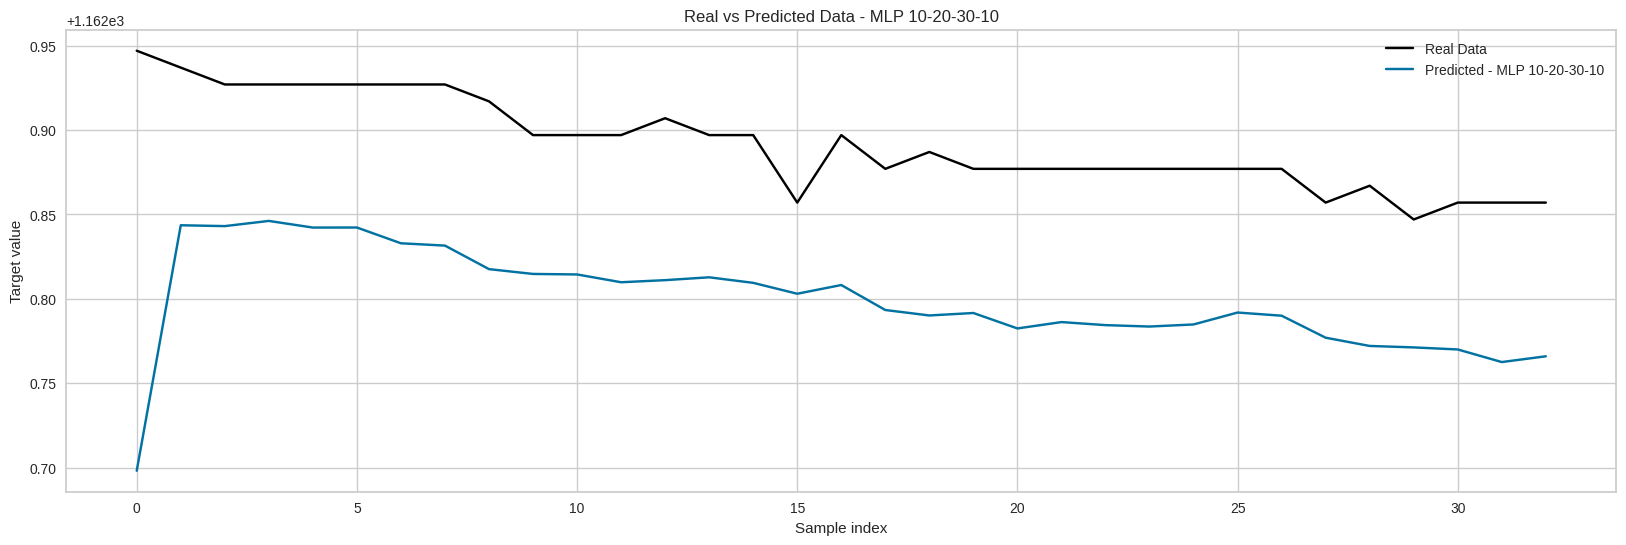

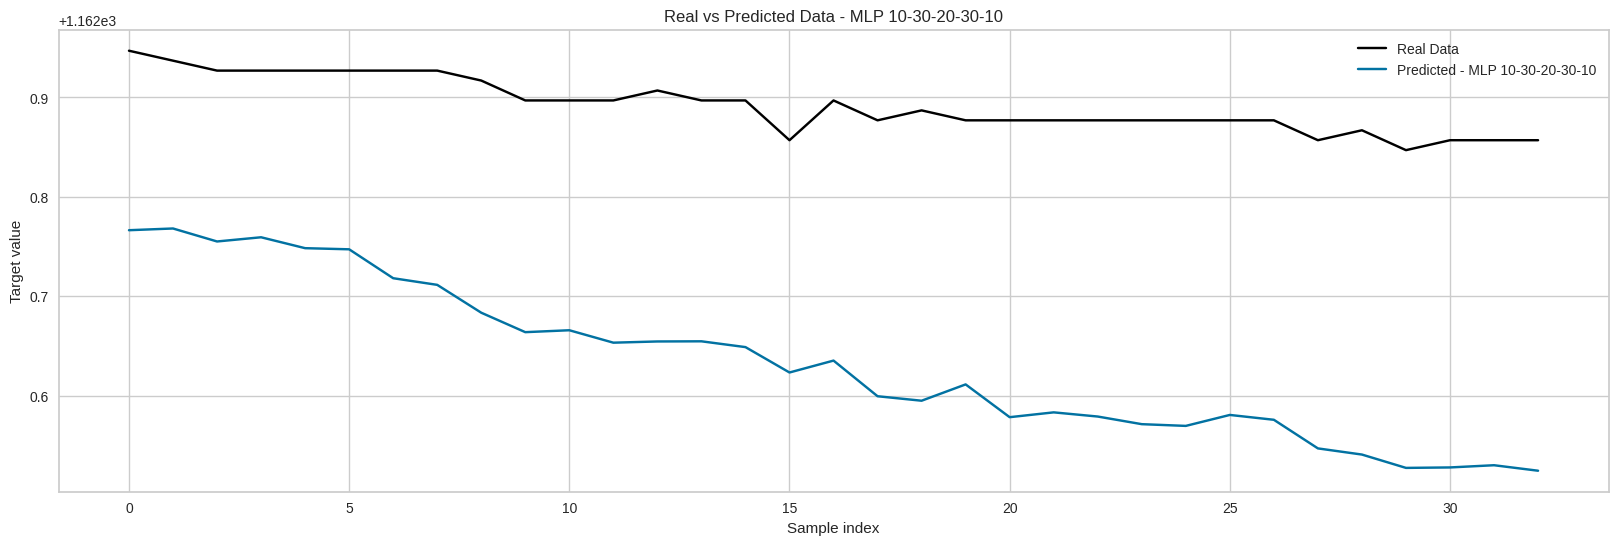

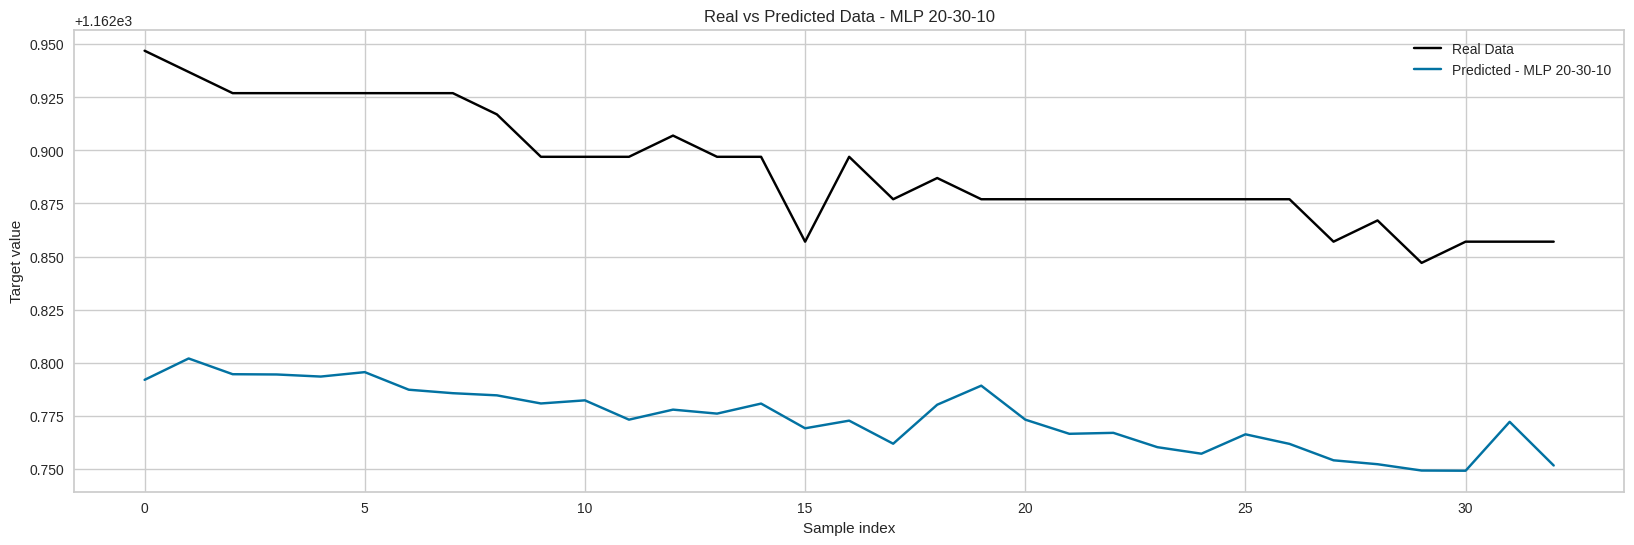

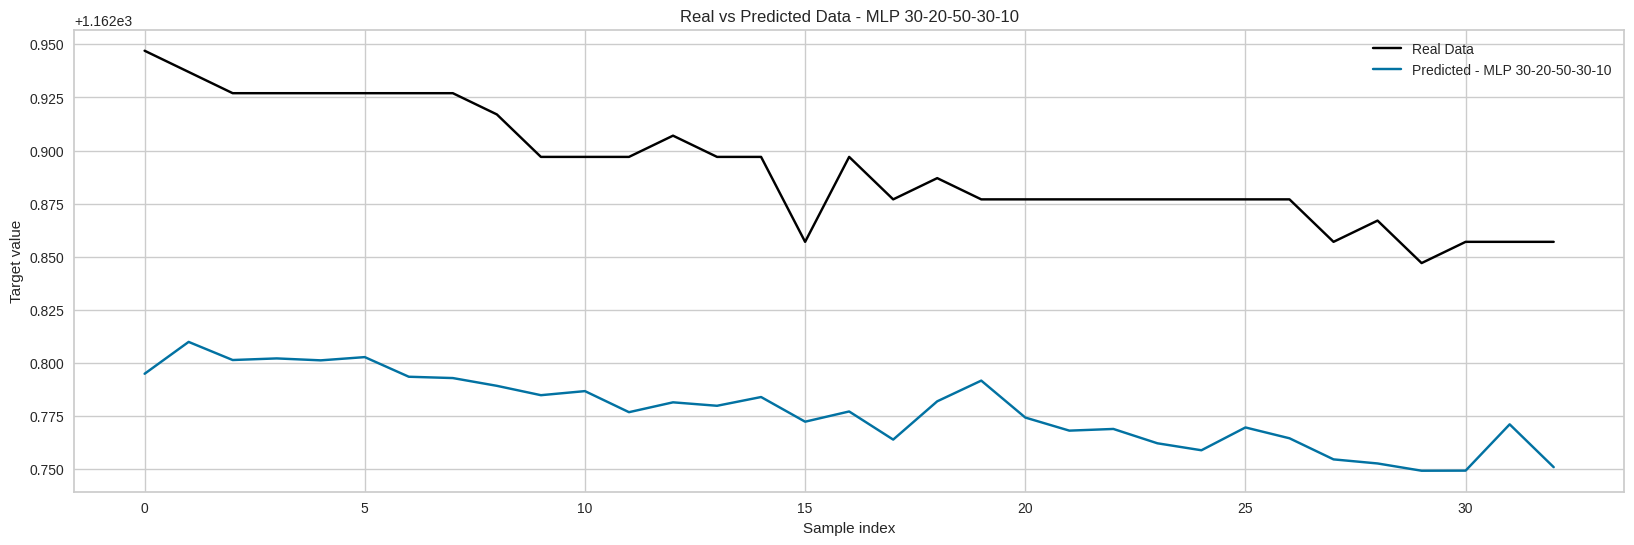

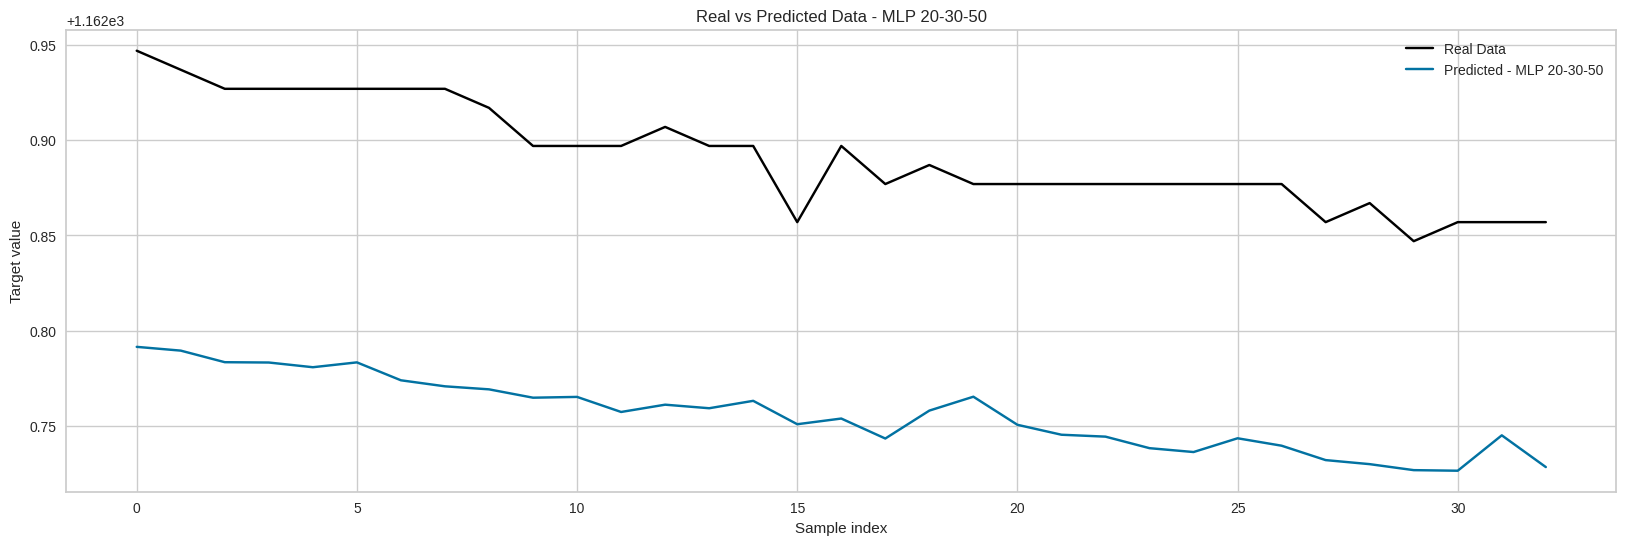

In [323]:
# Supondo que você tenha as variáveis y_test, model_names, models e X_test definidas anteriormente

# Plotar resultados reais vs. previsões para cada modelo em figuras separadas
for (name, model) in zip(model_names, models):
    plt.figure(figsize=(20, 6))  # Cria uma nova figura para cada modelo
    plt.plot(y_test.values, label='Real Data', color='black')

    # Obter previsões do modelo
    predictions = model.predict(X_test)

    # Plotar previsões do modelo na figura atual
    plt.plot(predictions, label=f'Predicted - {name}')

    # Adicionando título e legenda
    plt.title(f'Real vs Predicted Data - {name}')
    plt.xlabel('Sample index')
    plt.ylabel('Target value')
    plt.legend()

    # Mostrar o gráfico
    plt.show()


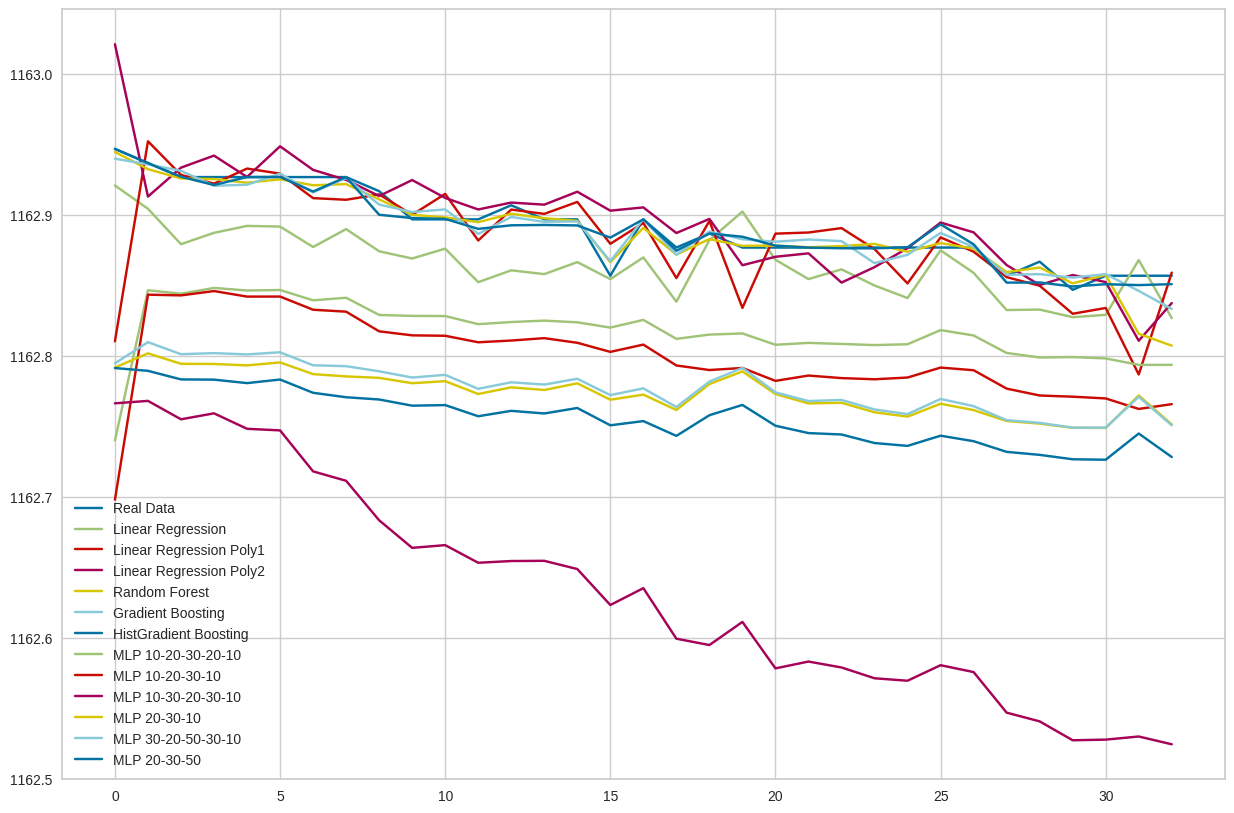

In [324]:

# Plotar resultados reais vs. previsões para comparar visualmente
plt.figure(figsize=(15, 10))
plt.plot(y_test.values, label='Real Data')
for (name, model) in zip(model_names, models):
    predictions = model.predict(X_test)
    plt.plot(predictions, label=name)
plt.legend()
plt.show()

Conformal Prediction for Regression

https://github.com/PacktPublishing/Practical-Guide-to-Applied-Conformal-Prediction/blob/main/Chapter_07.ipynb


In [325]:
!pip install dtype_diet
!pip install openml
!pip install mapie
!pip install crepes

In [327]:
!pip install aws-fortuna==0.1.36

In [329]:
!pip install jax==0.4.14
!pip install jaxlib==0.4.14

In [330]:
import ml_dtypes
import numpy as np
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor

from fortuna.conformal import EnbPI
from fortuna.conformal import QuantileConformalRegressor
from fortuna.metric.regression import prediction_interval_coverage_probability

In [331]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, TextArea
from matplotlib.ticker import FormatStrFormatter

import plotly.graph_objects as go

import openml
from sklearn.datasets import fetch_openml

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor

import plotly.express as px

from yellowbrick.regressor import PredictionError

from tqdm import tqdm

from crepes.extras import binning

from lightgbm import LGBMRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split

from mapie.metrics import regression_coverage_score, regression_mean_width_score
from mapie.regression import MapieQuantileRegressor, MapieRegressor
from mapie.subsample import Subsample

from crepes import WrapRegressor
from crepes.extras import DifficultyEstimator

random_state = 23
rng = np.random.default_rng(random_state)
round_to = 3

import warnings
warnings.filterwarnings('ignore')

In [332]:
# Supondo que 'data' é um DataFrame Pandas e 'target' é a coluna que você deseja prever
X = subset2.drop('pz16', axis=1)  # Substitua 'target' pelo nome real da sua variável dependente
y = subset2['pz16']  # Variável dependente

In [333]:
# Determinar os tamanhos dos conjuntos de treino, teste e calibração
n_train = int(len(X) * 0.6)
n_test = int(len(X) * 0.2)  # 20% para teste

# A última parte dos dados será usada para calibração
# A divisão de calibração começa onde a divisão de teste termina
n_cal = len(X) - n_train - n_test

# Dividir os dados em conjuntos de treino, teste e calibração
X_train, X_test, X_cal = X[:n_train], X[n_train:n_train+n_test], X[n_train+n_test:]
y_train, y_test, y_cal = y[:n_train], y[n_train:n_train+n_test], y[n_train+n_test:]

In [334]:
# split the datasets into 3 datasets: proper traininig set, calibration and test
# proper training set is used to train the underlying model, calibration set is used by Conformal Prediction
# test set is used to test models

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, shuffle = True, random_state=42)

# we will use 1000 objects for calibration
X_proper_train, X_cal, y_proper_train, y_cal = train_test_split(X_train, y_train, test_size=32)

In [335]:
print('Data split. Parts sizes: train = {}, calib = {}, test = {}'.format(X_proper_train.shape, X_cal.shape, X_test.shape))

Data split. Parts sizes: train = (65, 5), calib = (32, 5), test = (32, 5)


In [336]:
# Definir o grau do polinômio para o modelo de regressão polinomial
degree1 = 2  # Ou outro valor que você deseja testar
degree2 = 3  # Ou outro valor que você deseja testar

In [337]:
# Inicializar modelos
lr = LinearRegression()
lr2 = Pipeline([('Poly', PolynomialFeatures(degree=degree1)),('linear', LinearRegression())])
lr3 = Pipeline([('Poly', PolynomialFeatures(degree=degree2)),('linear', LinearRegression())])
rf = RandomForestRegressor(n_estimators=50, random_state=42)
grbt  = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
hist_grbt = HistGradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, max_iter=1000, random_state=42)
mlp1 = MLPRegressor(hidden_layer_sizes=(10, 20, 30, 20, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp2 = MLPRegressor(hidden_layer_sizes=(10, 20, 30, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp3 = MLPRegressor(hidden_layer_sizes=(10, 30, 20, 30, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp4 = MLPRegressor(hidden_layer_sizes=(20, 30, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp5 = MLPRegressor(hidden_layer_sizes=(30, 20, 50, 30, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp6 = MLPRegressor(hidden_layer_sizes=(20, 30, 50), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)

In [338]:
# Lista para facilitar o treinamento e avaliação
models = [lr, lr2, lr3, rf, grbt, hist_grbt, mlp1, mlp2, mlp3, mlp4, mlp5, mlp6]
model_names = ['Linear Regression', 'Linear Regression Poly1', 'Linear Regression Poly2', 'Random Forest', 'Gradient Boosting',  'HistGradient Boostin', 'MLP 10-20-30-20-10', 'MLP 10-20-30-10', 'MLP 10-30-20-30-10', 'MLP 20-30-10', 'MLP 30-20-50-30-10', 'MLP 20-30-50']


In [339]:
# Definir o intervalo para a re-treinamento para o # Walk-Forward Validation reduzido
n = 1  # Escolha um valor para 'n' baseado no seu caso de uso
# Lista para armazenar os erros de previsão de cada passo
errors = []

In [340]:
# Walk-Forward Validation reduzido
for i in range(0, len(X_test), n):
    # Atualizar os conjuntos de dados para a iteração atual do walk-forward
    # Certifique-se de não ultrapassar o fim do conjunto de dados
    end_idx = min(i + n, len(X_test))
    X_train_iter = pd.concat([X_train, X_test[:i]])
    y_train_iter = pd.concat([y_train, y_test[:i]])

    # Treinar modelos
    for model in models:
      model.fit(X_train_iter, y_train_iter)

    # Fazer previsões para o próximo bloco
    y_pred = model.predict(X_test.iloc[i:end_idx])

    # Calcular e armazenar os erros de previsão para o bloco atual
    errors.extend(mean_squared_error(y_test.iloc[i:end_idx], y_pred, multioutput='raw_values'))

    # Você pode querer calcular a média dos erros se estiver interessado em uma métrica de erro único
    mean_error = sum(errors) / len(errors)
    print(f"Erro médio: {mean_error}")

Erro médio: 0.028088259881521582
Erro médio: 0.028740629086067462
Erro médio: 0.0340364942414166
Erro médio: 0.029816297768692372
Erro médio: 0.03125789699454429
Erro médio: 0.031424490940012303
Erro médio: 0.03337149743678294
Erro médio: 0.030341090366081323
Erro médio: 0.030654674531161687
Erro médio: 0.03187945765588944
Erro médio: 0.03251831343046293
Erro médio: 0.032551375026835035
Erro médio: 0.0338041012135529
Erro médio: 0.03328004689547026
Erro médio: 0.03416946459004277
Erro médio: 0.03472202996788202
Erro médio: 0.035601286990054645
Erro médio: 0.037073782009156
Erro médio: 0.03745704736567585
Erro médio: 0.037811650476057446
Erro médio: 0.03853725241356568
Erro médio: 0.03852534507081377
Erro médio: 0.03896990583281772
Erro médio: 0.039106168154366565
Erro médio: 0.03924852164139557
Erro médio: 0.039498178340922604
Erro médio: 0.03977080979731188
Erro médio: 0.03999822066136568
Erro médio: 0.039928740210066836
Erro médio: 0.039368544621162044
Erro médio: 0.03979225464595751

In [341]:
alpha = 0.05
n_cal = len(y_cal)
n_cal

32

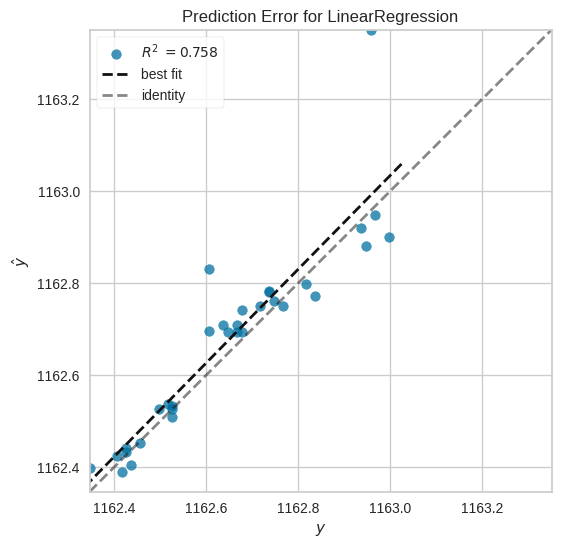

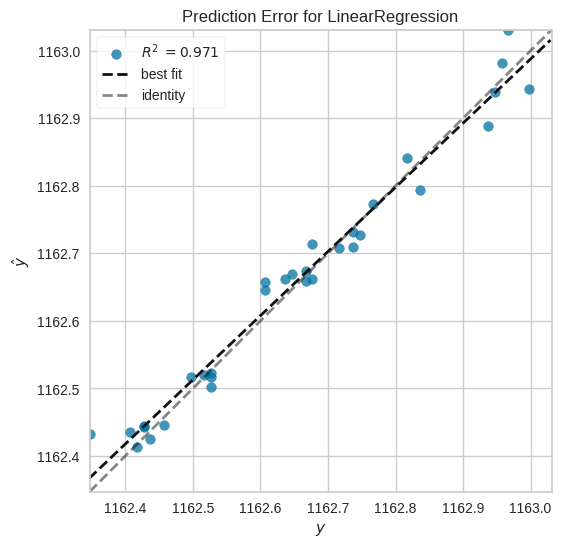

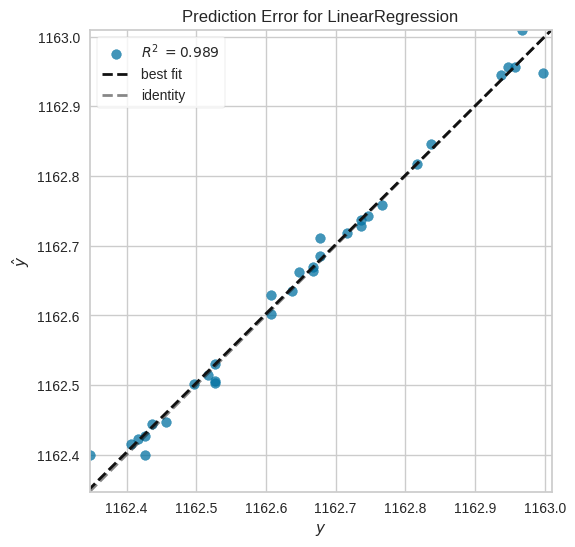

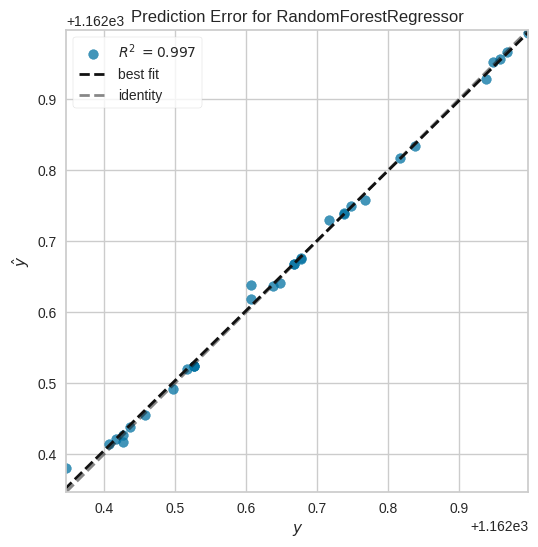

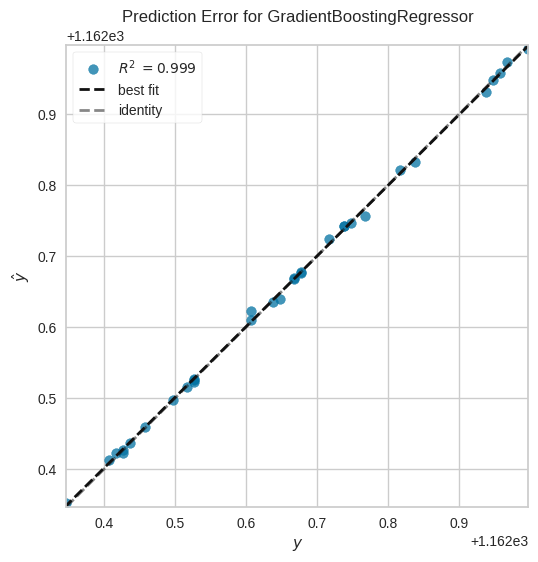

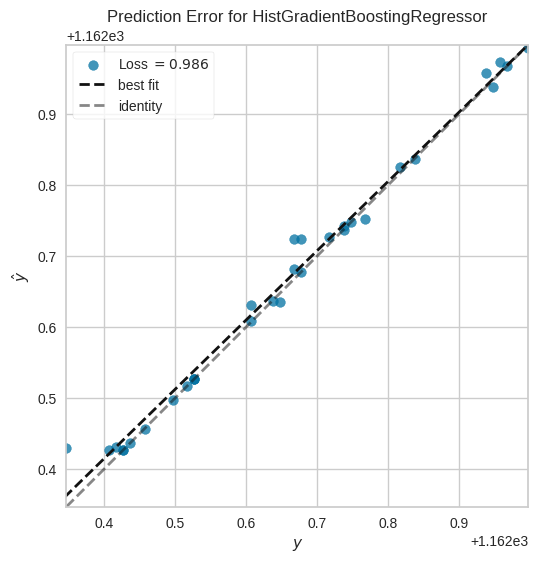

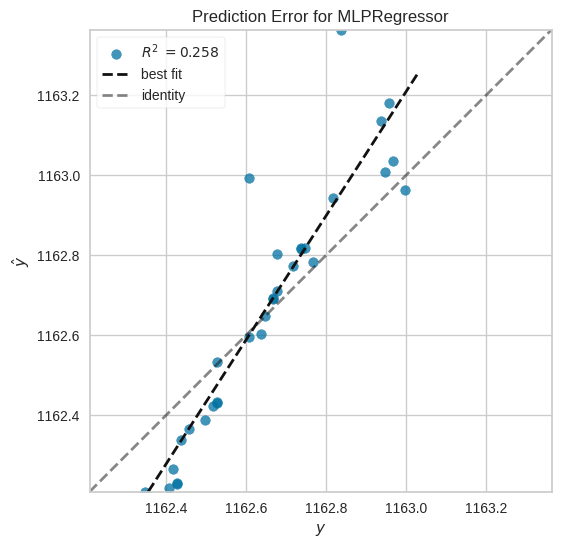

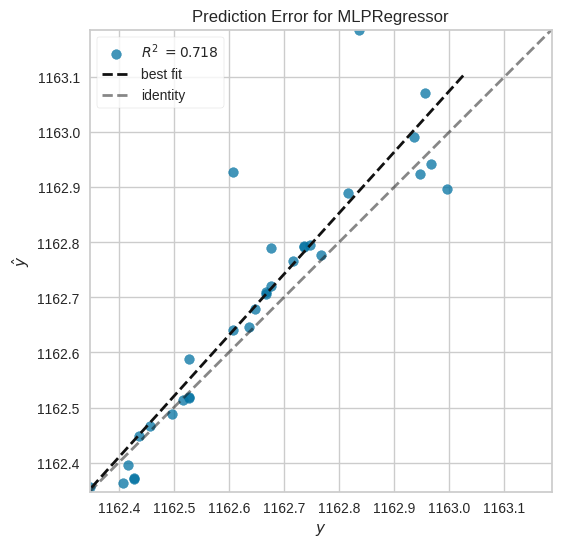

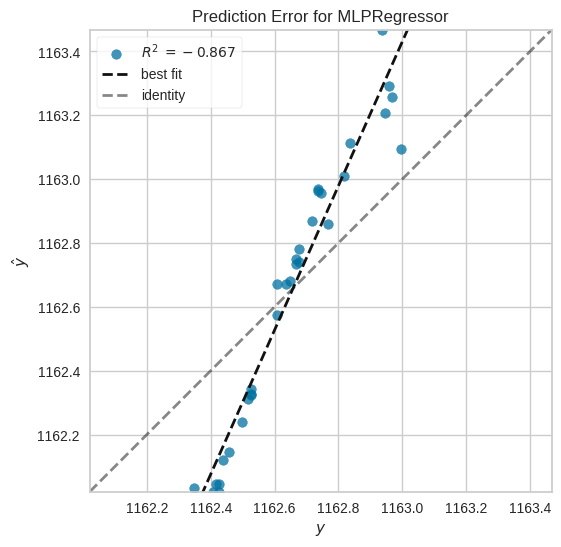

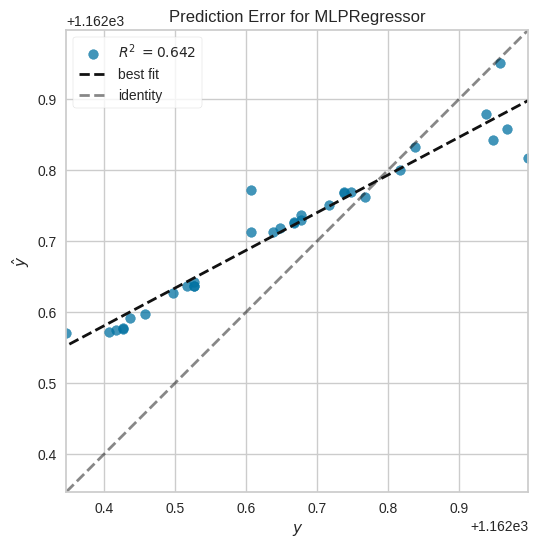

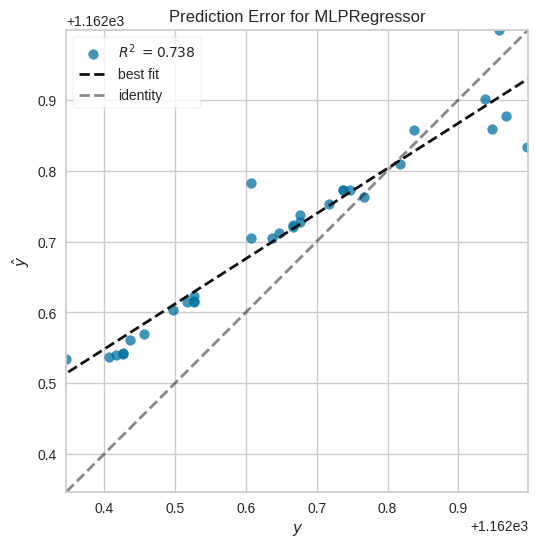

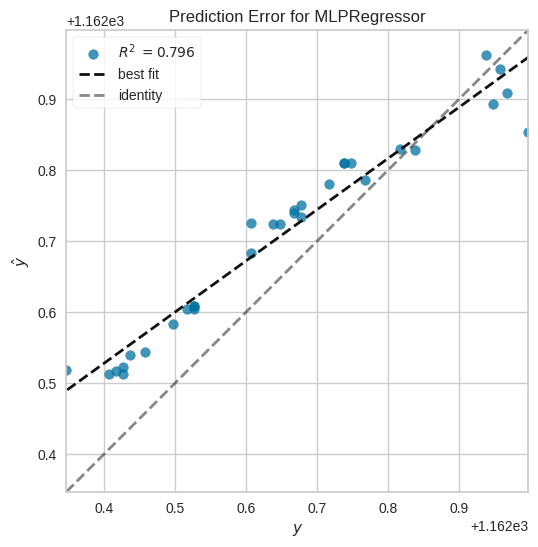

In [342]:
# make point predictions on the calibration and test sets

for (name, model) in zip(model_names, models):
  y_pred_cal = model.predict(X_cal)
  y_pred_test = model.predict(X_test)

  visualizer = PredictionError(model)
  visualizer.score(X_cal, y_cal)  # Evaluate the model on the test data
  visualizer.show()               # Finalize and render the figure

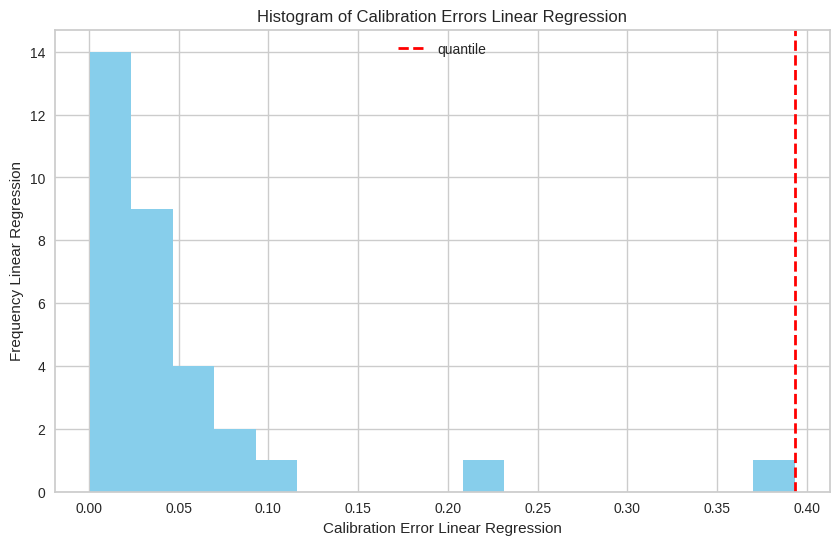

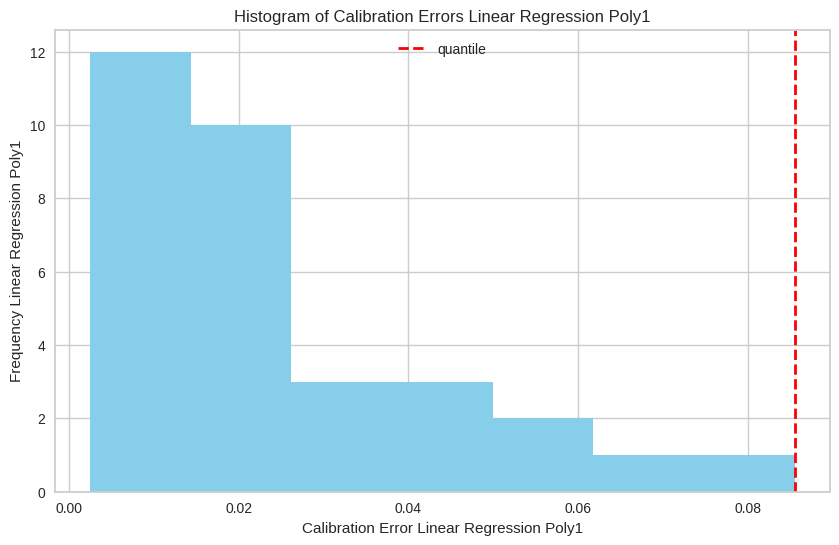

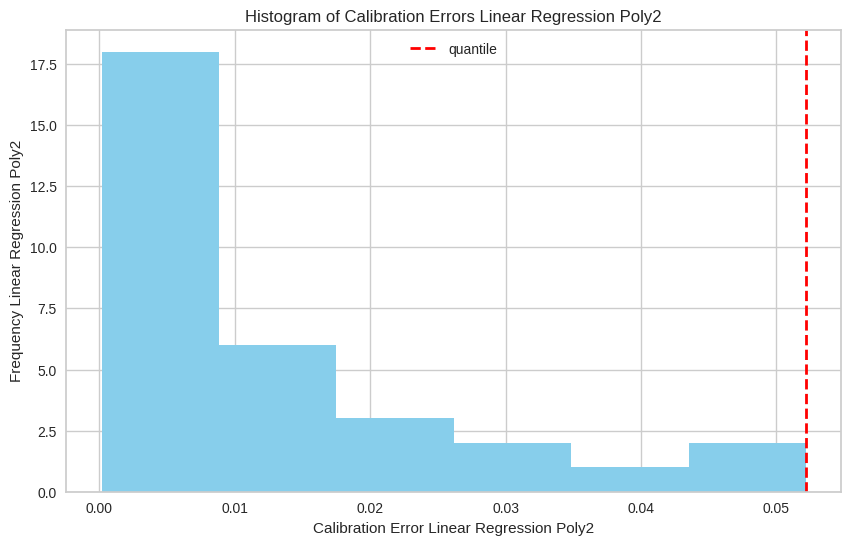

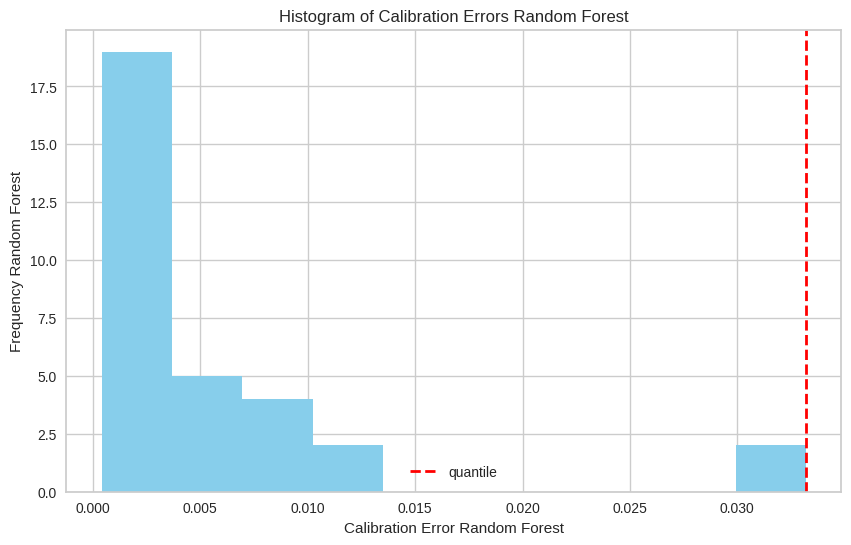

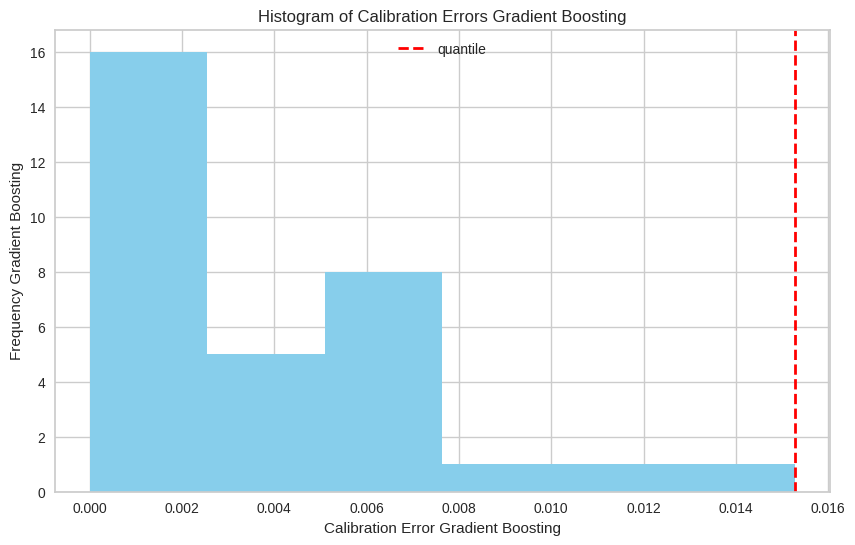

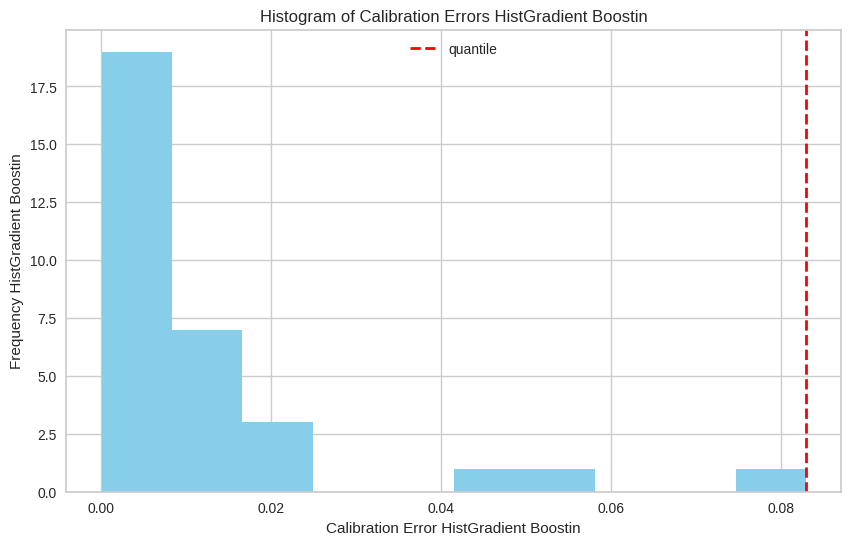

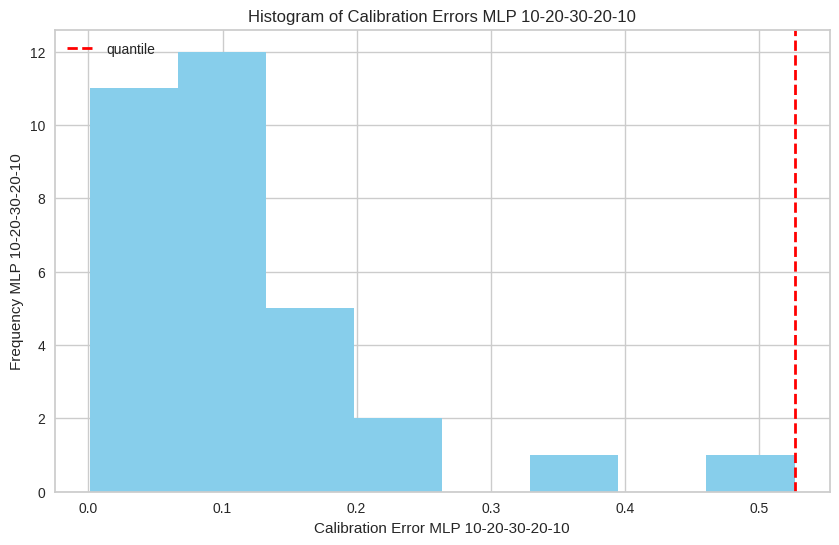

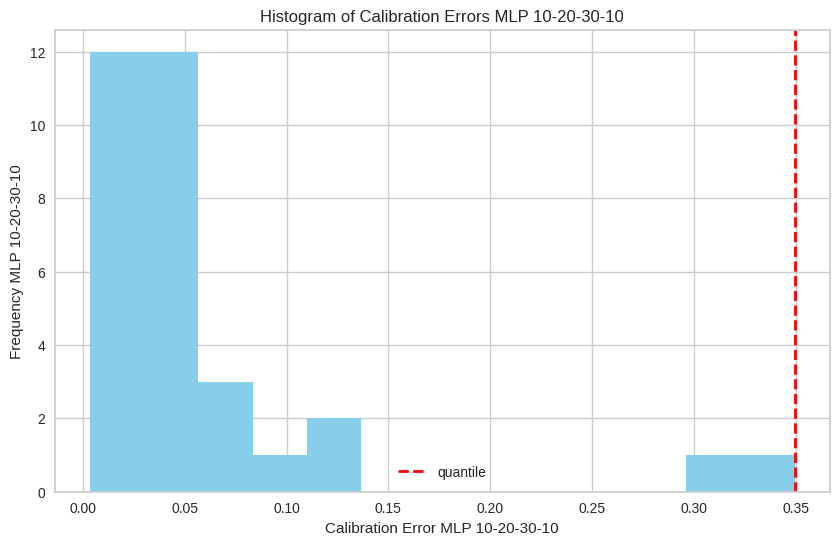

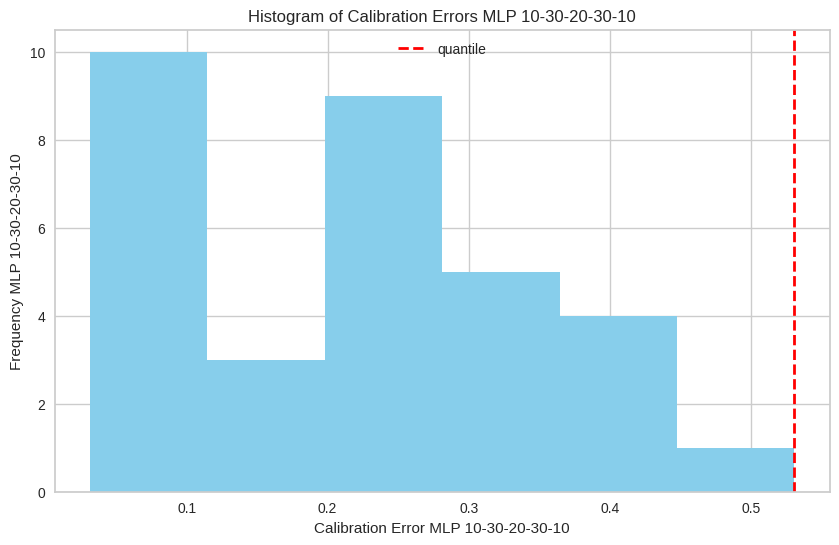

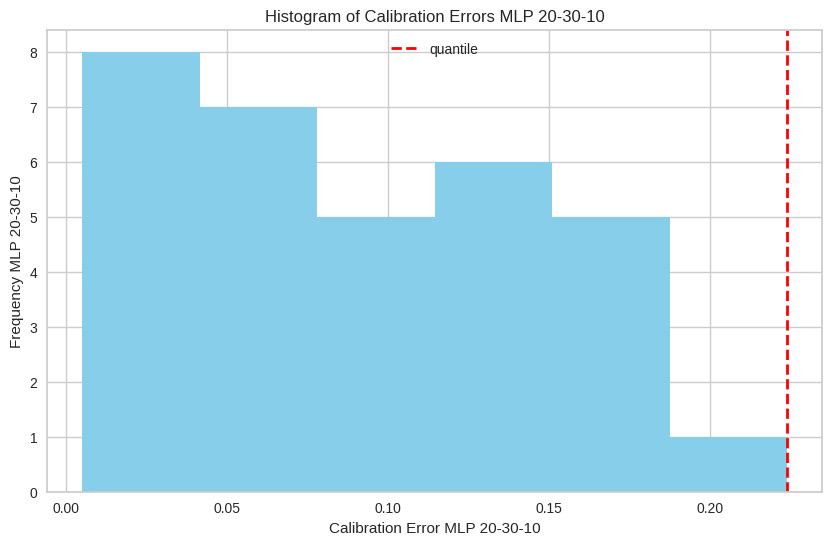

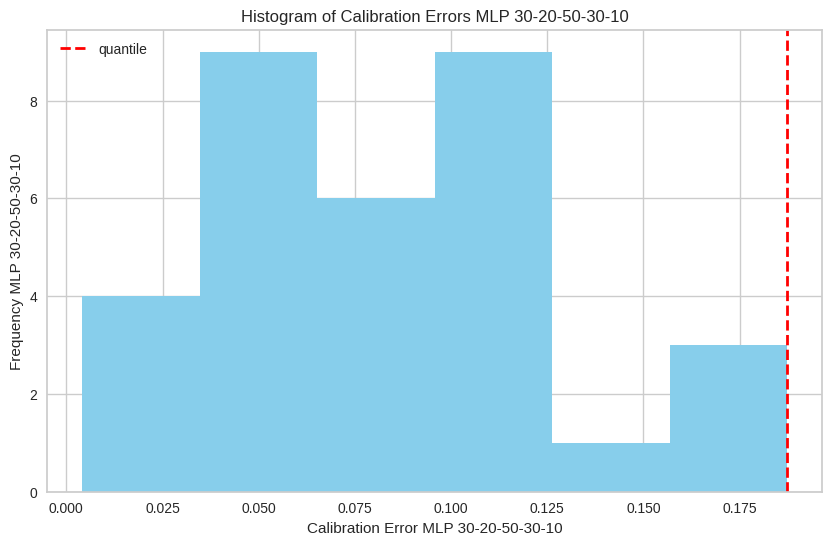

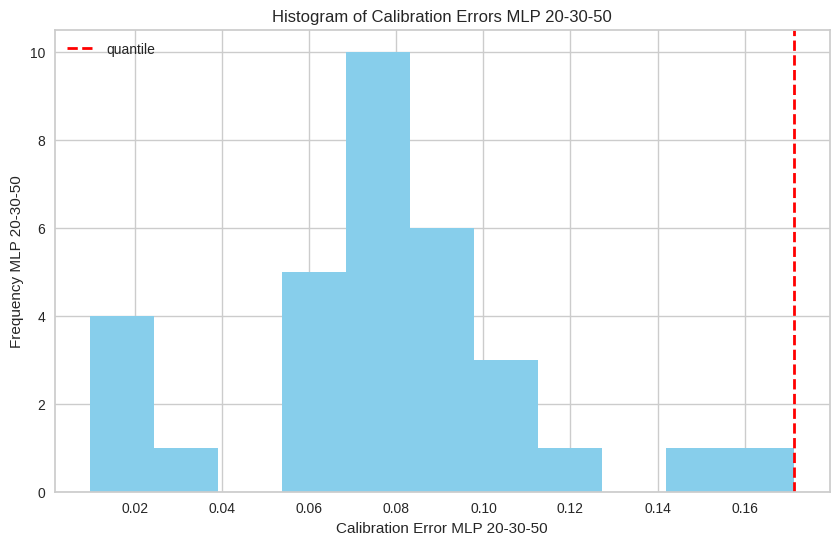

In [343]:
# calculate calibraion errors
for (name, model) in zip(model_names, models):
  y_pred_cal = model.predict(X_cal)
  y_pred_test = model.predict(X_test)
  y_cal_error = np.abs(y_cal - y_pred_cal)
  # calculate quantile with final sample adjustment to ensure coverage
  np.ceil((n_cal+1)*(1-alpha))/n_cal
  #calculate q_hat on the calibration set
  q_yhat_cal = np.quantile(y_cal_error,np.ceil((n_cal+1)*(1-alpha))/n_cal)
  # Plot the histogram
  plt.hist(y_cal_error, bins='auto', color='skyblue')
  # Add a vertical line for the
  plt.axvline(q_yhat_cal, color='red', linestyle='dashed', linewidth=2, label='quantile')
  plt.legend()
  plt.xlabel(f'Calibration Error {name}')
  plt.ylabel(f'Frequency {name}')
  plt.title(f'Histogram of Calibration Errors {name}')
  plt.show()

In [ ]:
# calculate quantile with final sample adjustment to ensure coverage
#np.ceil((n_cal+1)*(1-alpha))/n_cal

In [ ]:
#calculate q_hat on the calibration set
#q_yhat_cal = np.quantile(y_cal_error,np.ceil((n_cal+1)*(1-alpha))/n_cal)
#q_yhat_cal

In [ ]:
# Plot the histogram
#plt.hist(y_cal_error, bins='auto', color='skyblue')

# Add a vertical line for the
#plt.axvline(q_yhat_cal, color='red', linestyle='dashed', linewidth=2, label='quantile')

#plt.legend()
#plt.xlabel('Calibration Error')
#plt.ylabel('Frequency')
#plt.title('Histogram of Calibration Errors')

#plt.show()

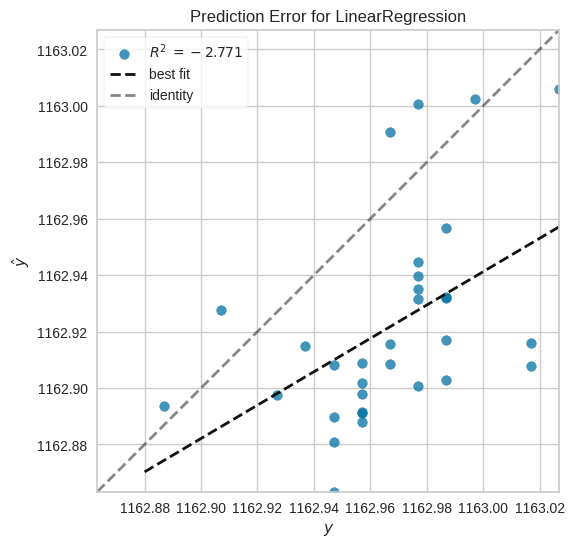

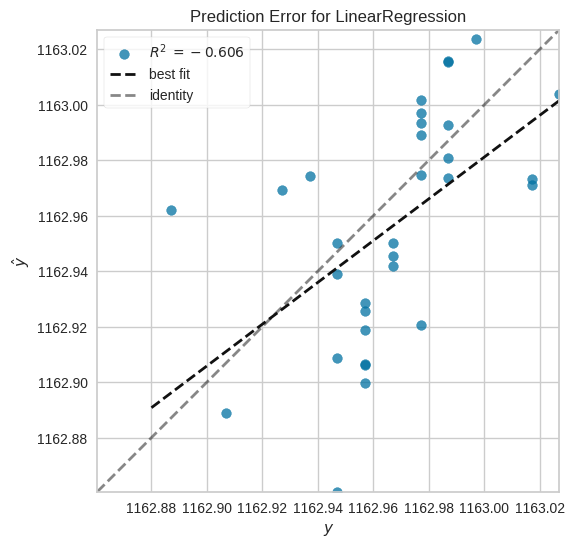

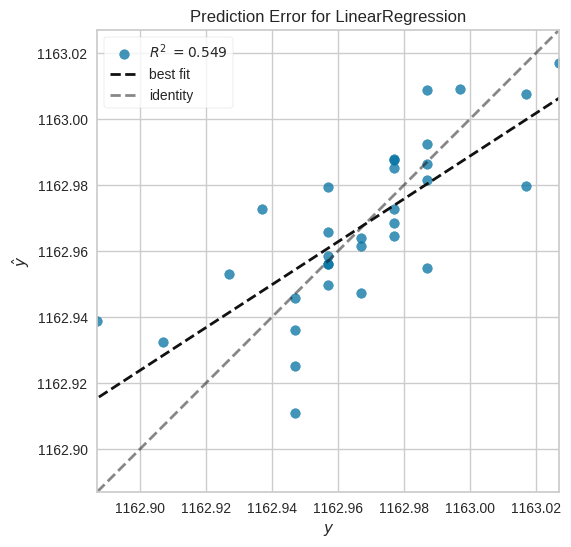

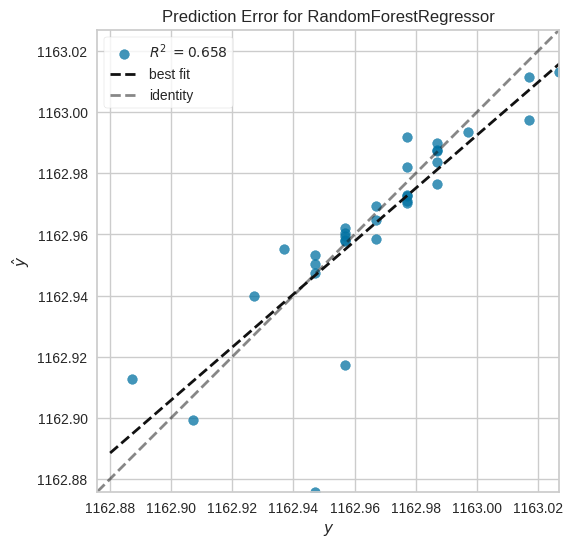

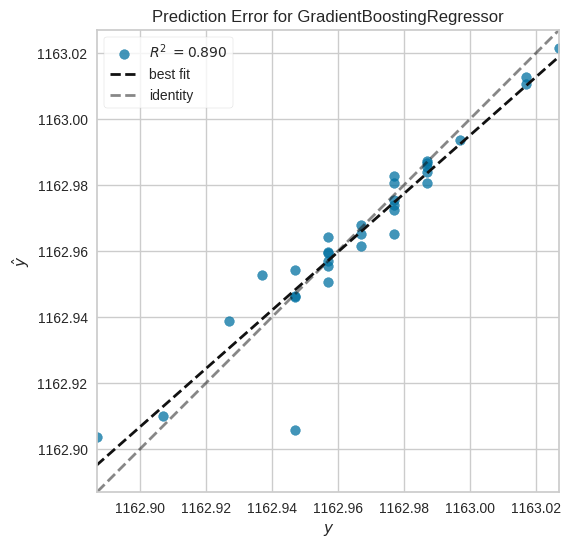

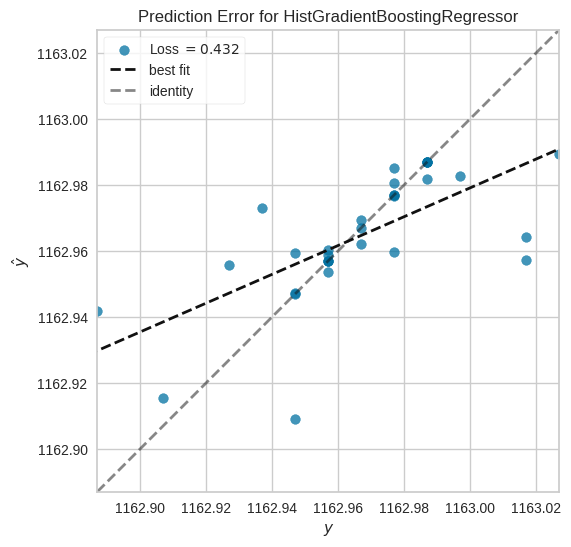

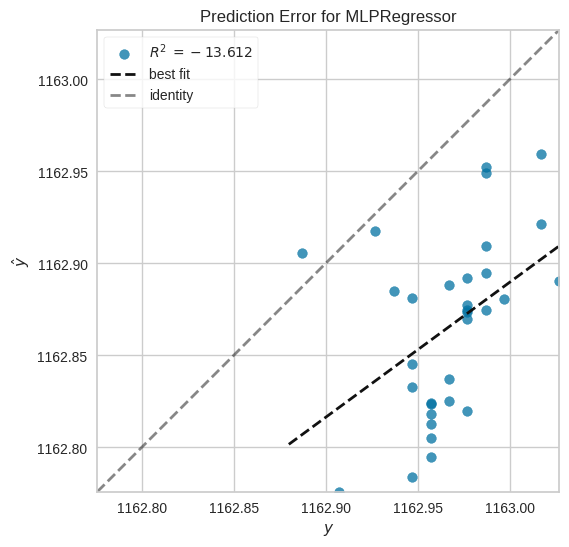

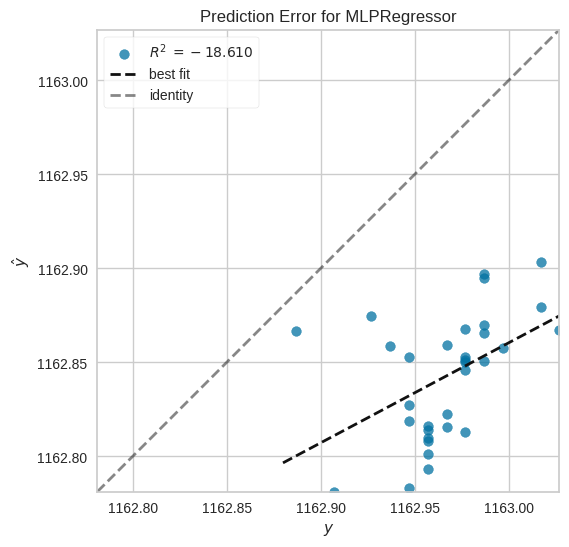

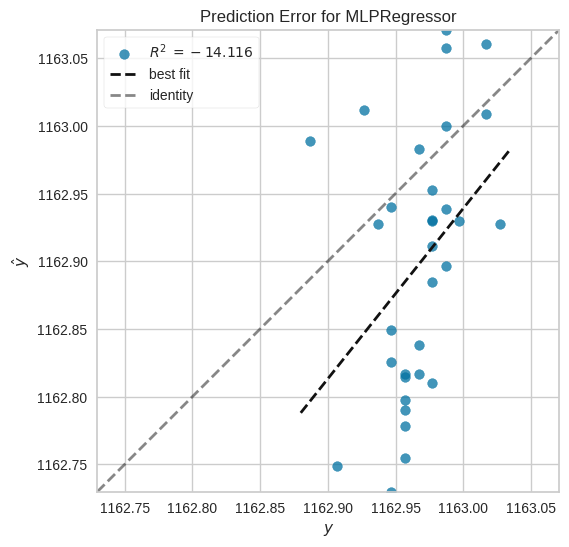

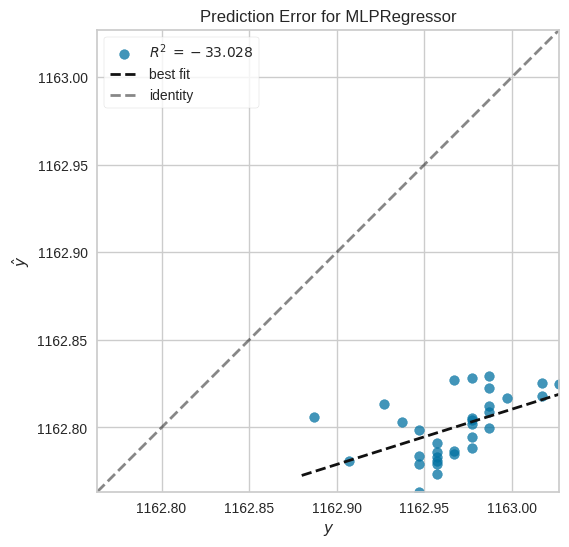

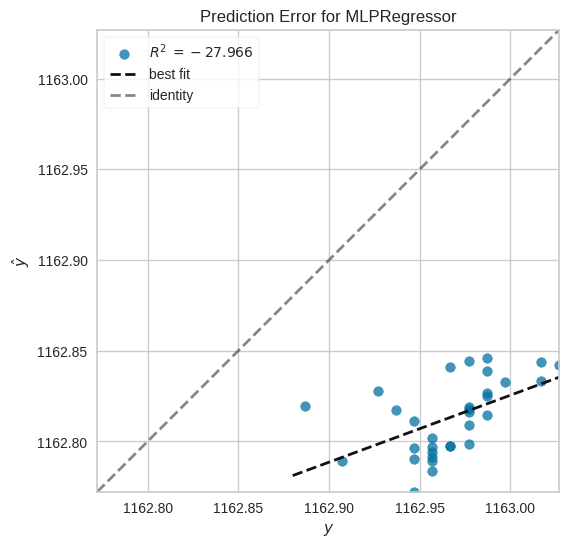

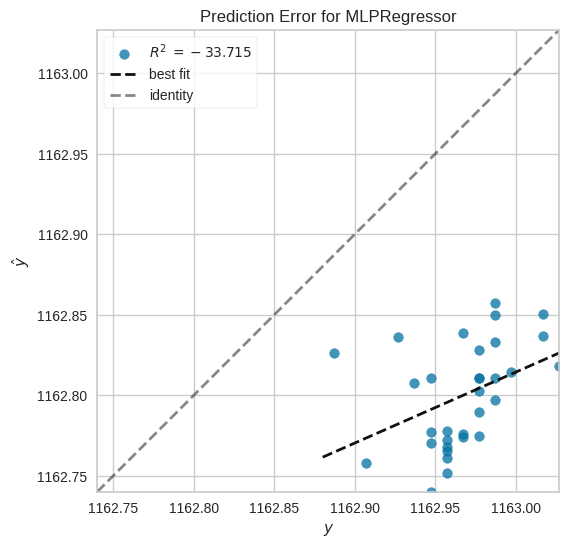

In [344]:
for (name, model) in zip(model_names, models):
  visualizer = PredictionError(model)
  visualizer.score(X_test, y_test)  # Evaluate the model on the test data
  visualizer.show()

Cobertura de Linear Regression: 1.00
Pontuação de R² para Linear Regression: -2.77


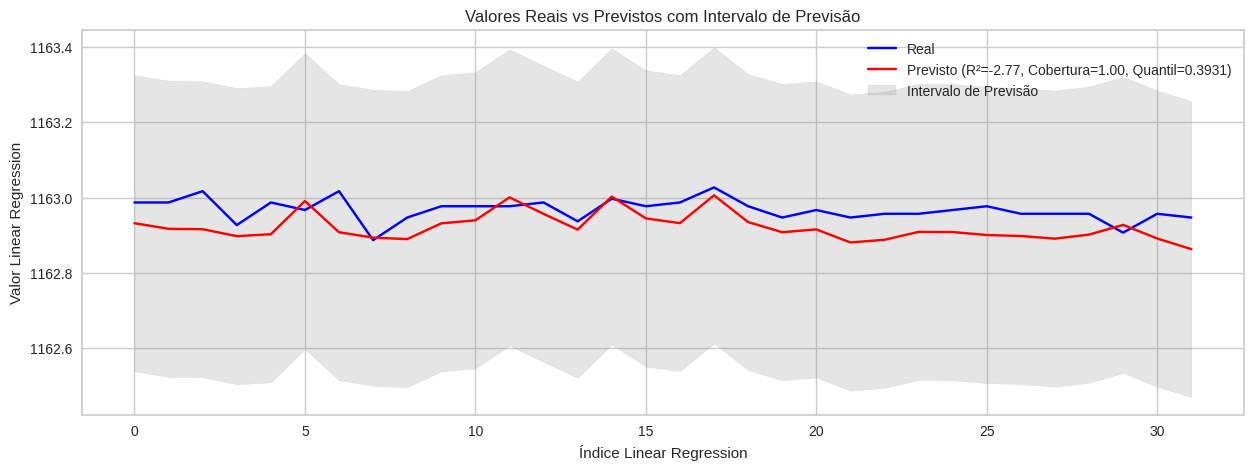

Cobertura de Linear Regression Poly1: 0.97
Pontuação de R² para Linear Regression Poly1: -0.61


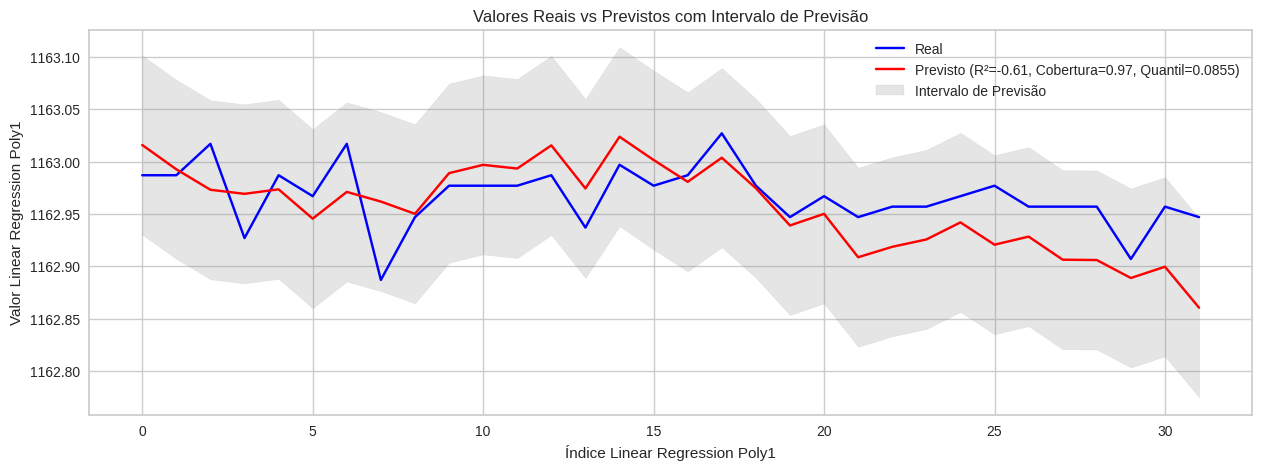

Cobertura de Linear Regression Poly2: 1.00
Pontuação de R² para Linear Regression Poly2: 0.55


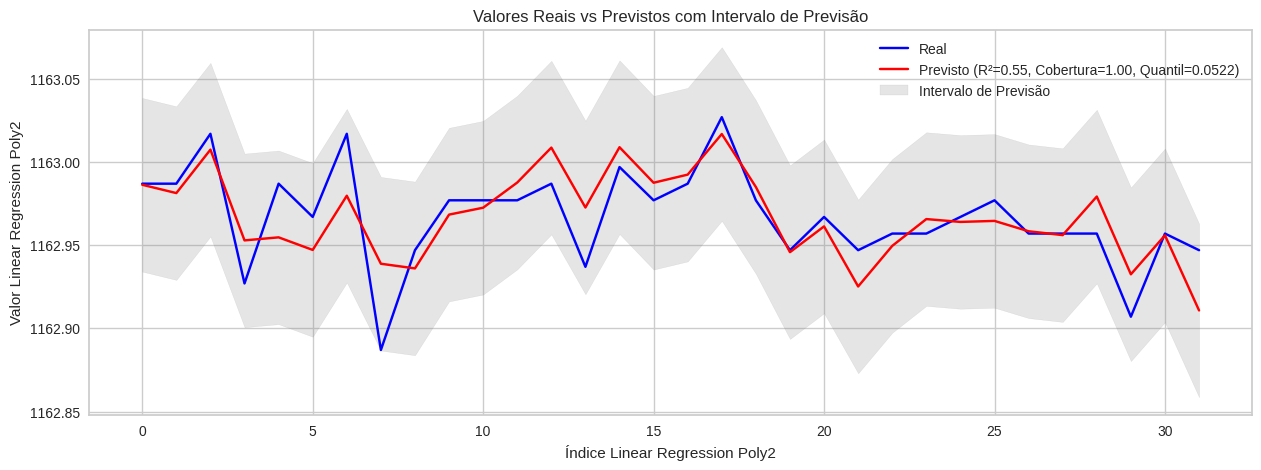

Cobertura de Random Forest: 0.94
Pontuação de R² para Random Forest: 0.66


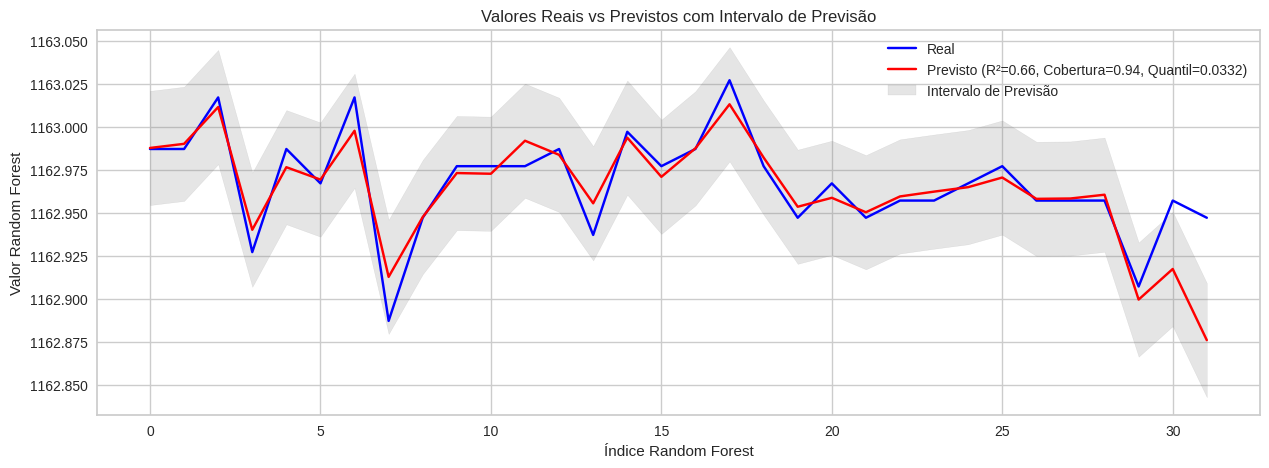

Cobertura de Gradient Boosting: 0.91
Pontuação de R² para Gradient Boosting: 0.89


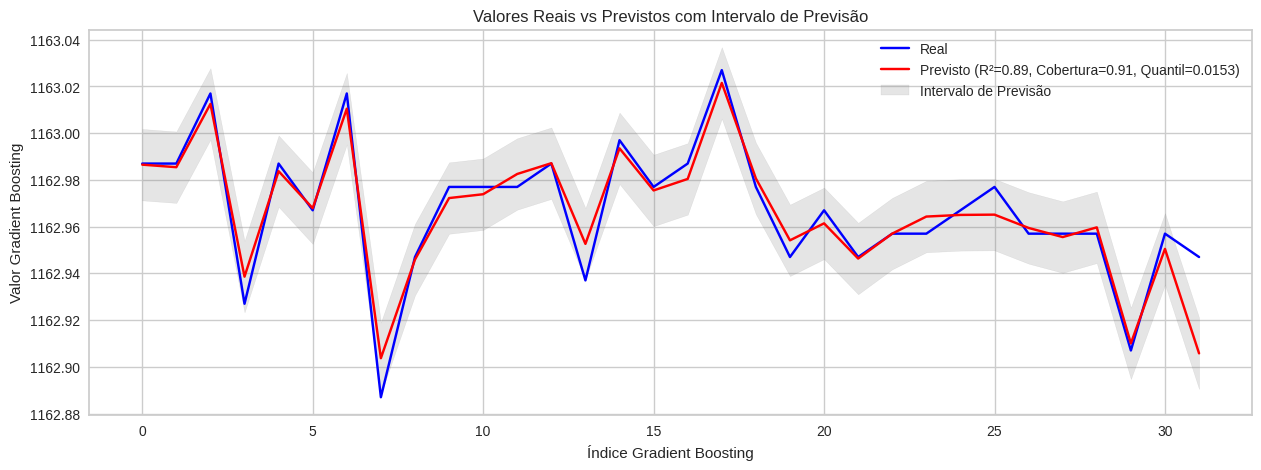

Cobertura de HistGradient Boostin: 1.00
Pontuação de R² para HistGradient Boostin: 0.43


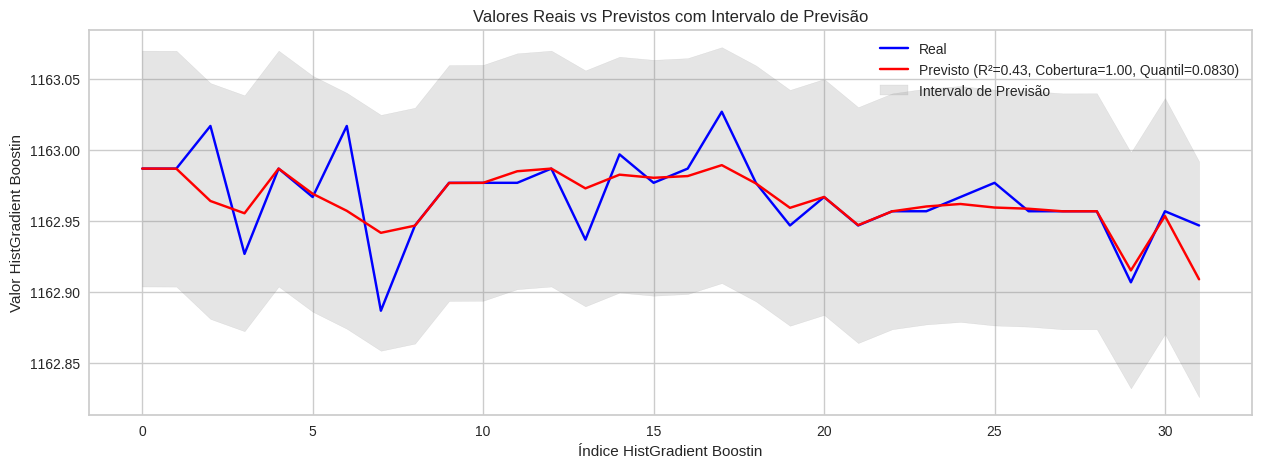

Cobertura de MLP 10-20-30-20-10: 1.00
Pontuação de R² para MLP 10-20-30-20-10: -13.61


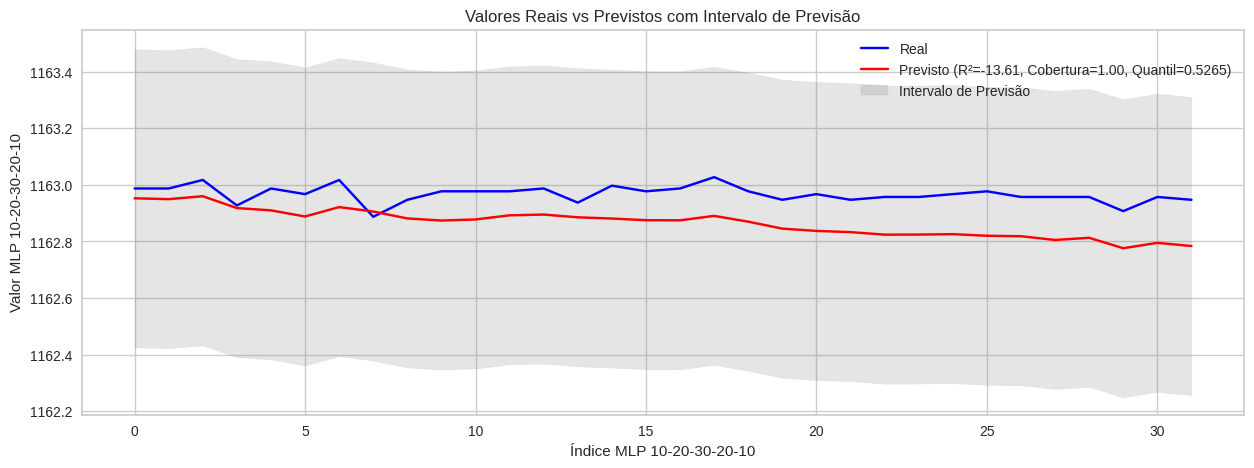

Cobertura de MLP 10-20-30-10: 1.00
Pontuação de R² para MLP 10-20-30-10: -18.61


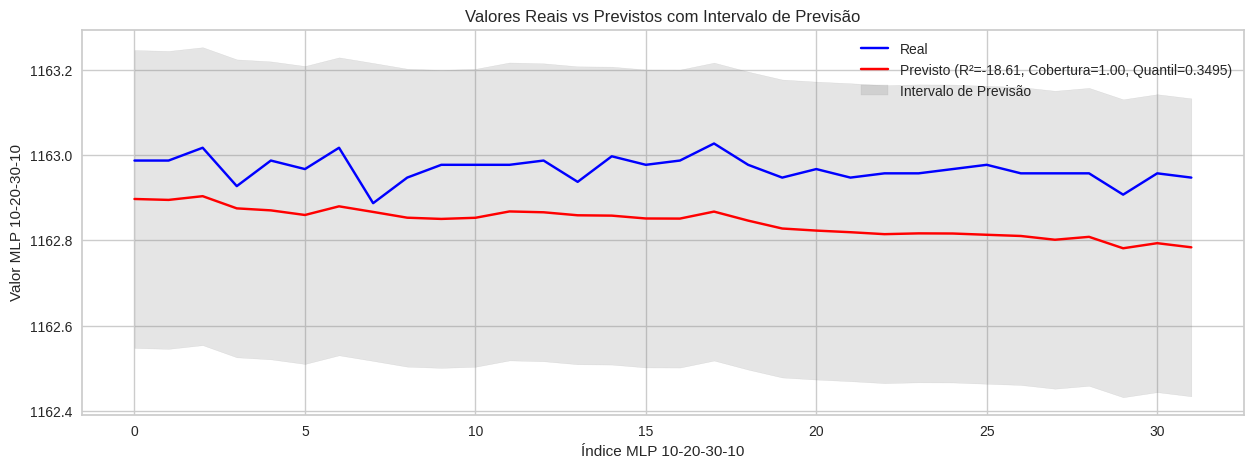

Cobertura de MLP 10-30-20-30-10: 1.00
Pontuação de R² para MLP 10-30-20-30-10: -14.12


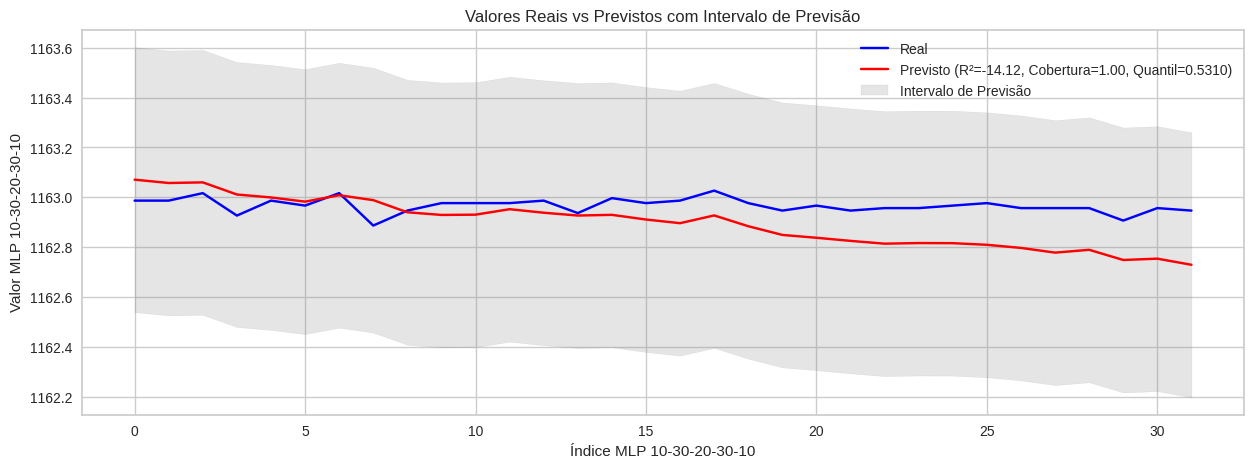

Cobertura de MLP 20-30-10: 1.00
Pontuação de R² para MLP 20-30-10: -33.03


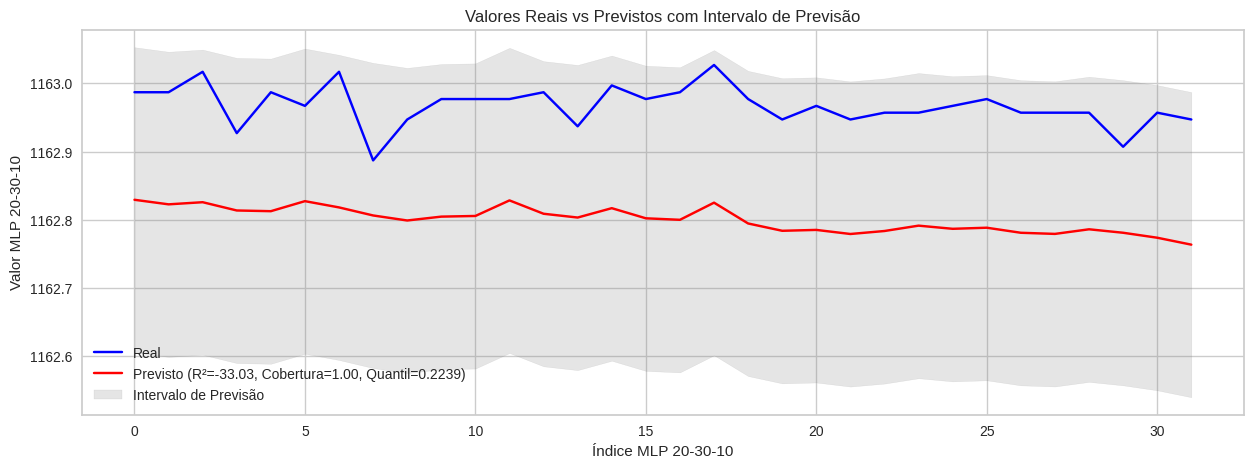

Cobertura de MLP 30-20-50-30-10: 1.00
Pontuação de R² para MLP 30-20-50-30-10: -27.97


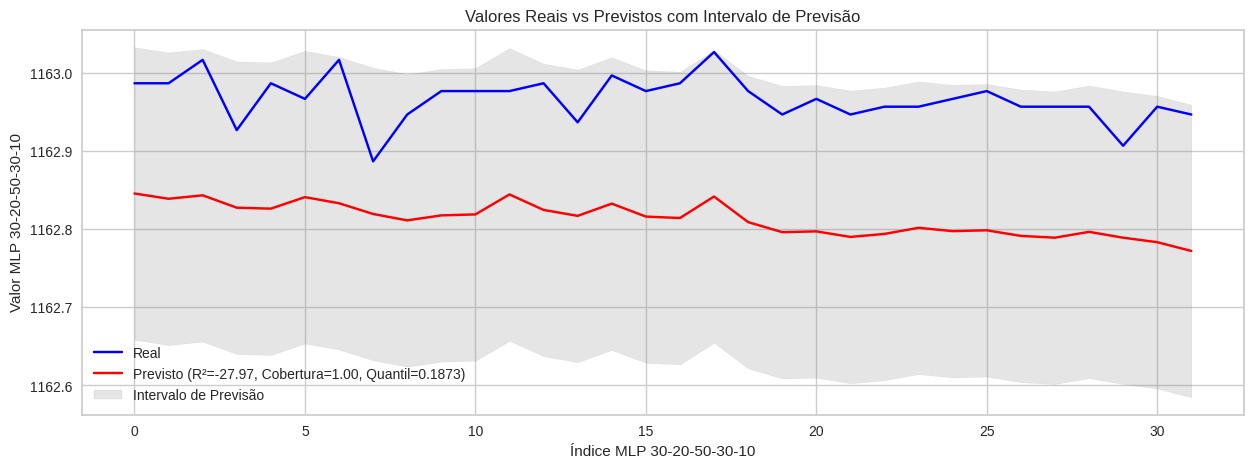

Cobertura de MLP 20-30-50: 0.44
Pontuação de R² para MLP 20-30-50: -33.71


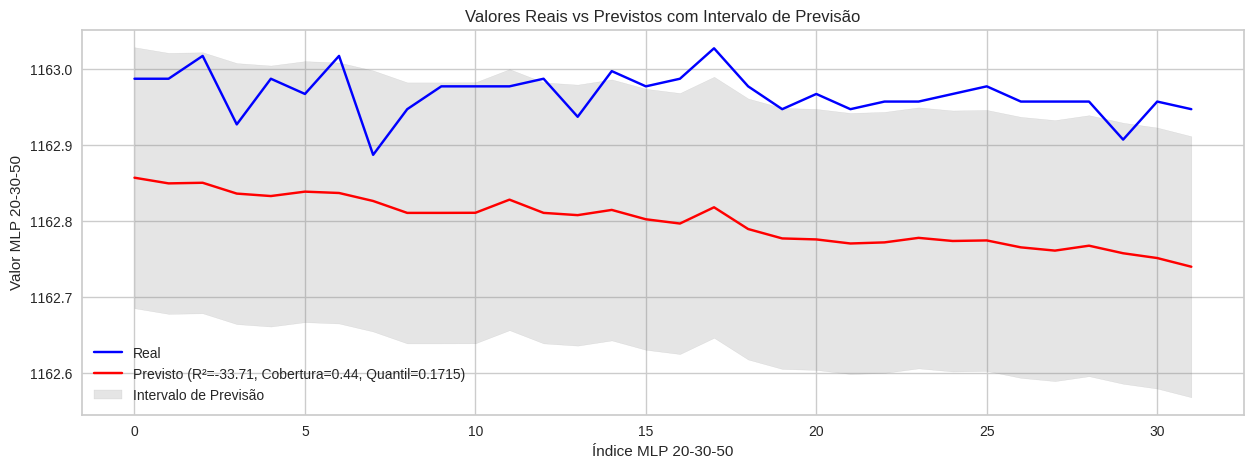

In [345]:
#Gráficos em português

import os

# Define o caminho onde os gráficos serão salvos
save_path = '/content/drive/MyDrive/Mestrado/imagens/Dataset02'

# Verifica se o diretório de salvamento existe, caso contrário, cria-o
if not os.path.exists(save_path):
    os.makedirs(save_path)

for (name, model) in zip(model_names, models):
    y_pred_cal = model.predict(X_cal)
    y_pred_test = model.predict(X_test)
    y_cal_error = np.abs(y_cal - y_pred_cal)

    # calculate quantile with final sample adjustment to ensure coverage
    np.ceil((n_cal+1)*(1-alpha))/n_cal

    # calculate q_hat on the calibration set
    q_yhat_cal = np.quantile(y_cal_error, np.ceil((n_cal+1)*(1-alpha))/n_cal)
    y_hat_test_lower = y_pred_test - q_yhat_cal
    y_hat_test_upper = y_pred_test + q_yhat_cal

    predict_df = pd.DataFrame(list(zip(y_test, y_pred_test, y_hat_test_lower, y_hat_test_upper)),
                               columns=['actual', 'predicted', 'lower_bound', 'upper_bound'])

    def calculate_coverage(df):
        df['in_interval'] = df.apply(lambda row: row['lower_bound'] <= row['actual'] <= row['upper_bound'], axis=1)
        coverage = df['in_interval'].mean()
        return coverage

    coverage = calculate_coverage(predict_df)
    print(f"Cobertura de {name}: {coverage:.2f}")

    # Calcular o valor de R^2
    r2_score_val = r2_score(y_test, y_pred_test)
    print(f"Pontuação de R² para {name}: {r2_score_val:.2f}")

    # Criar uma nova figura
    plt.figure(figsize=(15, 5))

    # Plotar valores reais
    plt.plot(predict_df['actual'], label='Real', color='blue')

    # Plotar valores previstos
    plt.plot(predict_df['predicted'], label=f'Previsto (R²={r2_score_val:.2f}, Cobertura={coverage:.2f}, Quantil={q_yhat_cal:.4f})', color='red')

    # Plotar intervalo de previsão
    plt.fill_between(predict_df.index, predict_df['lower_bound'], predict_df['upper_bound'],
                     color='gray', alpha=0.2, label='Intervalo de Previsão')

    # Adicionar a legenda
    plt.legend()

    # Definir rótulos e título
    plt.xlabel(f'Índice {name}')
    plt.ylabel(f'Valor {name}')
    plt.title('Valores Reais vs Previstos com Intervalo de Previsão')

    # Salvar o gráfico no Google Drive
    save_file = os.path.join(save_path, f'{name}_real_vs_previsto.png')
    plt.savefig(save_file, dpi=300)

    # Exibir o gráfico
    plt.show()


Linear Regression Coverage: 1.0


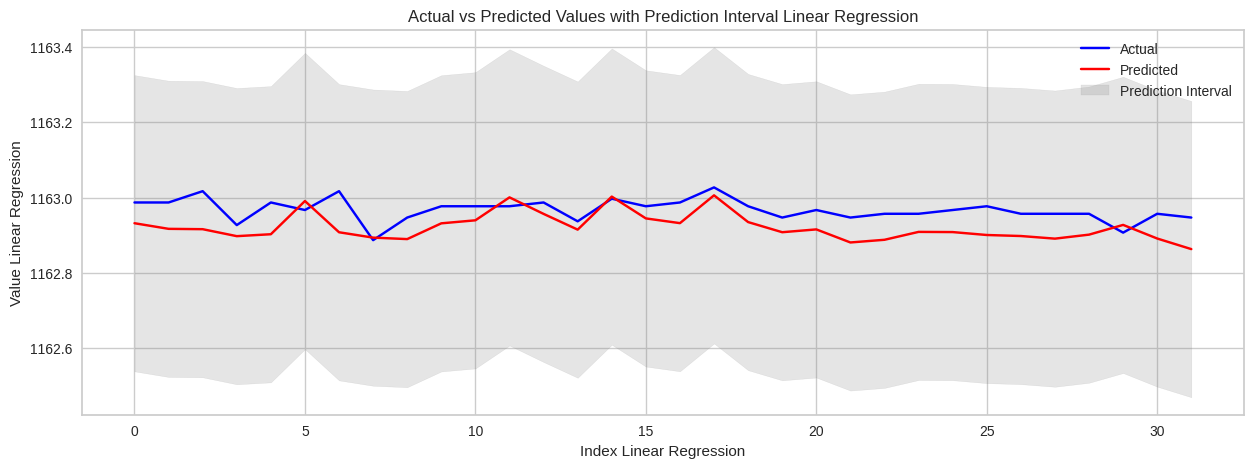

Linear Regression Poly1 Coverage: 0.96875


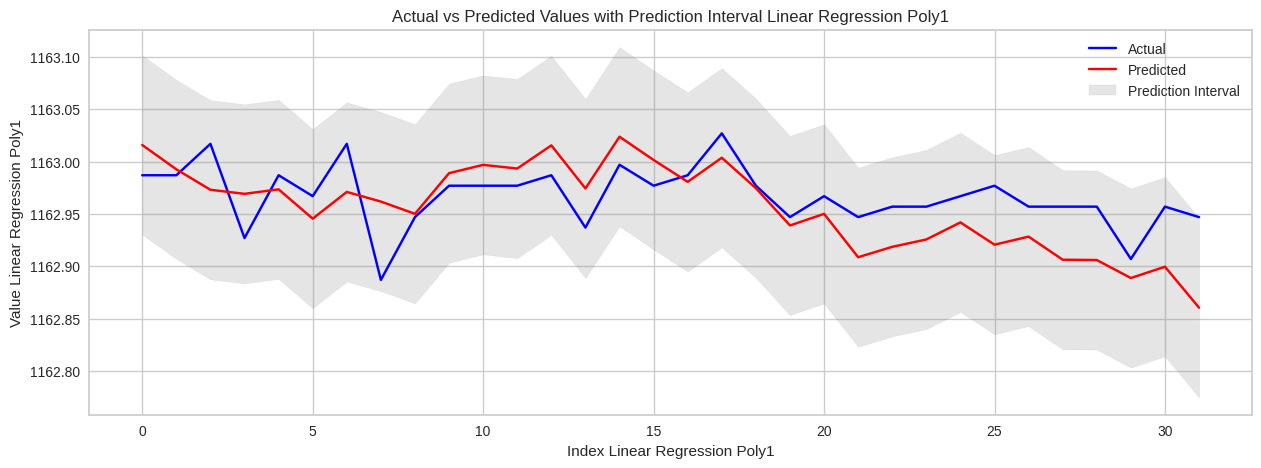

Linear Regression Poly2 Coverage: 1.0


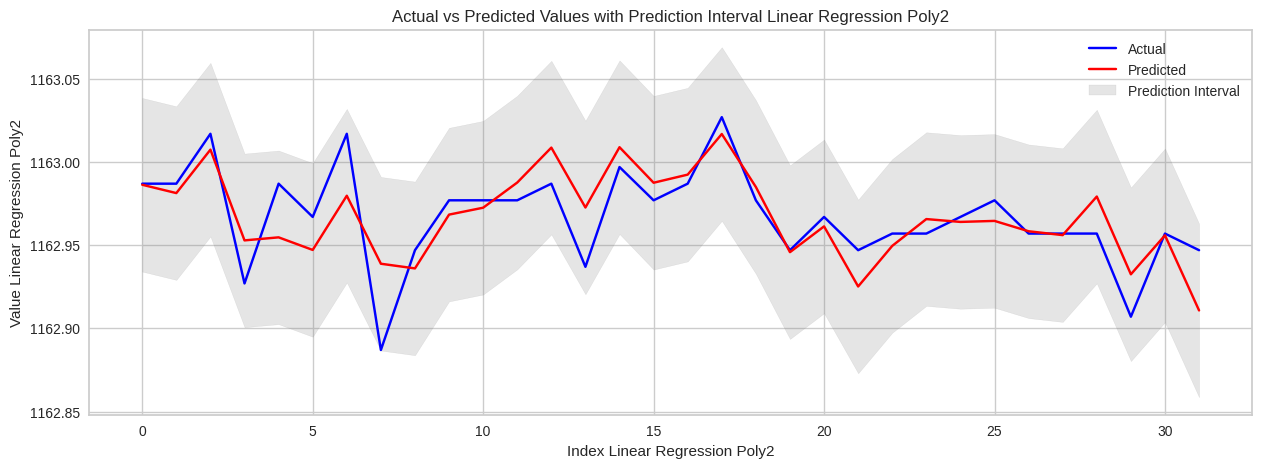

Random Forest Coverage: 0.9375


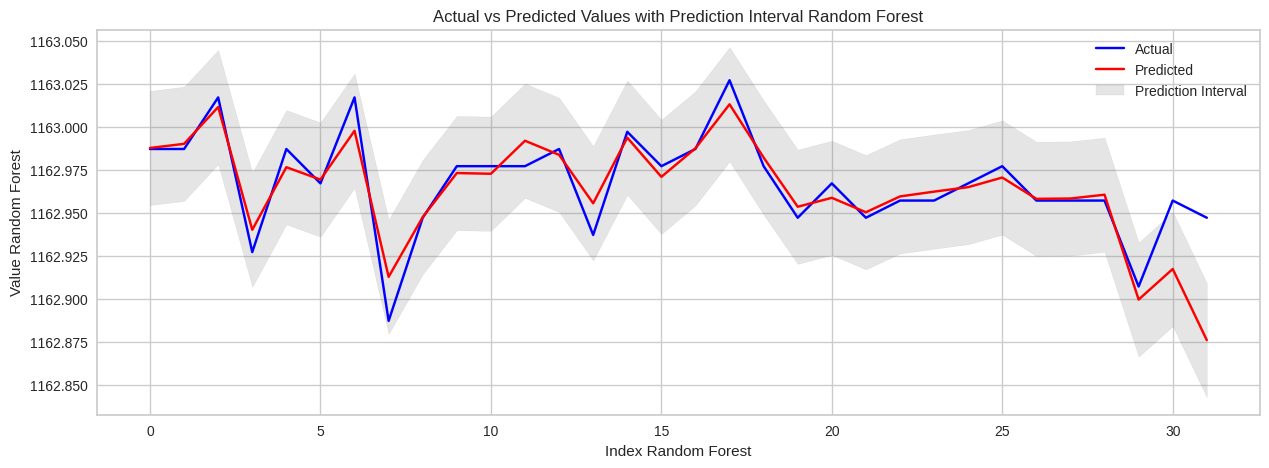

Gradient Boosting Coverage: 0.90625


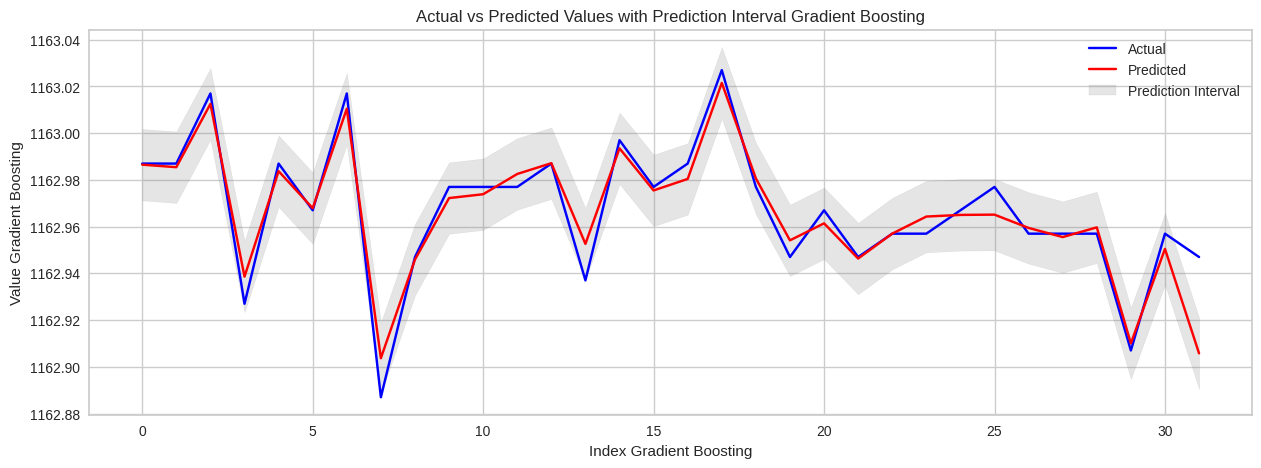

HistGradient Boostin Coverage: 1.0


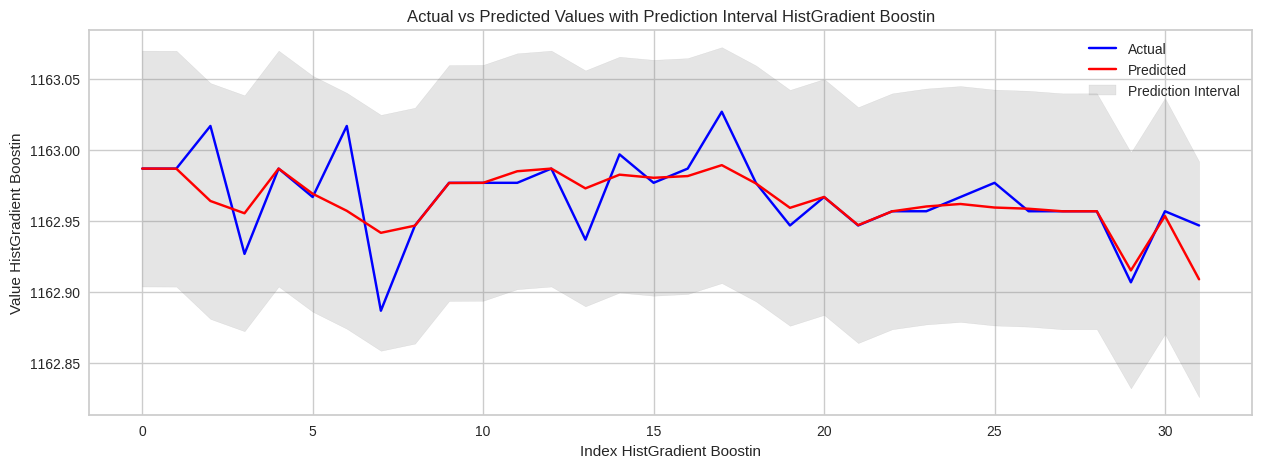

MLP 10-20-30-20-10 Coverage: 1.0


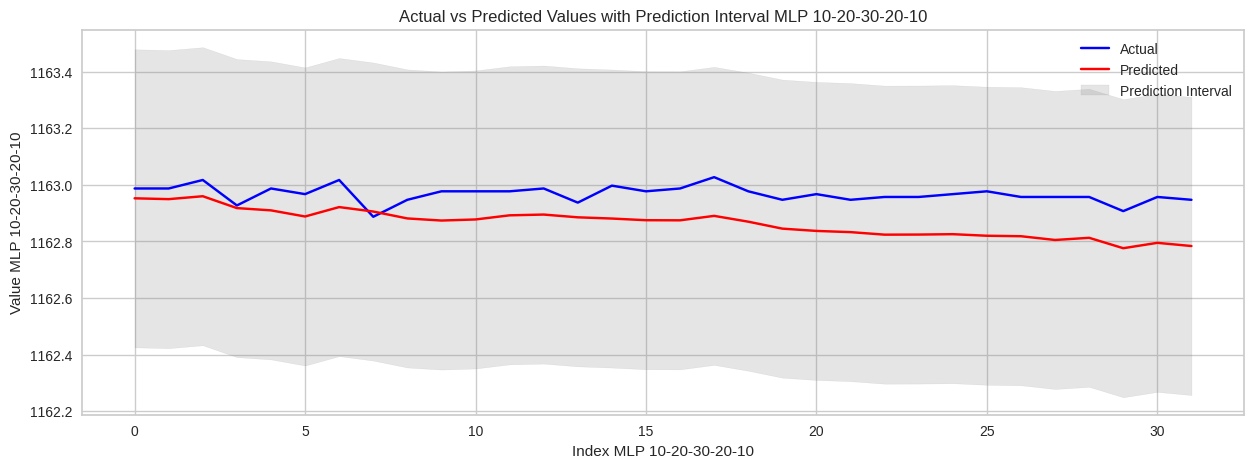

MLP 10-20-30-10 Coverage: 1.0


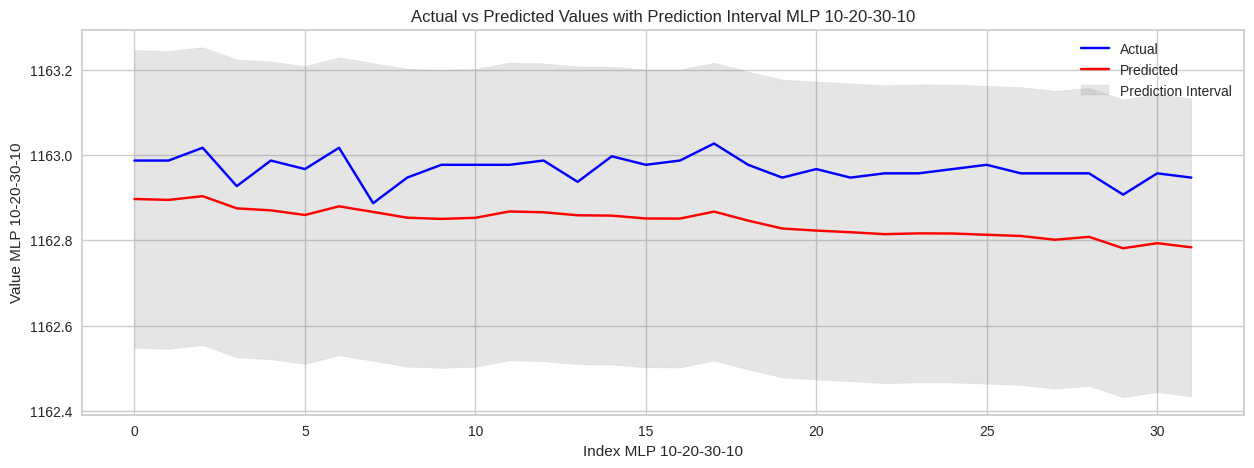

MLP 10-30-20-30-10 Coverage: 1.0


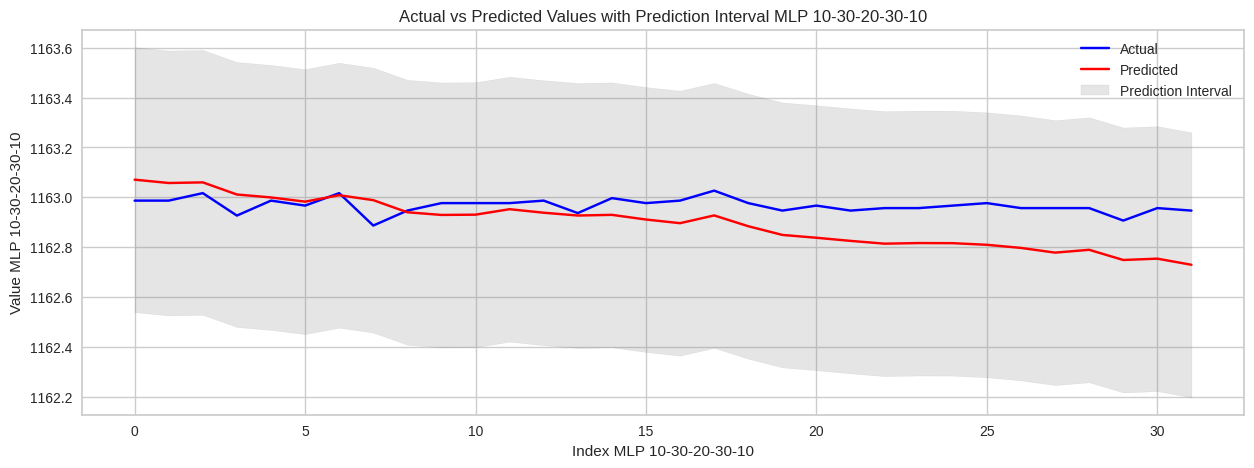

MLP 20-30-10 Coverage: 1.0


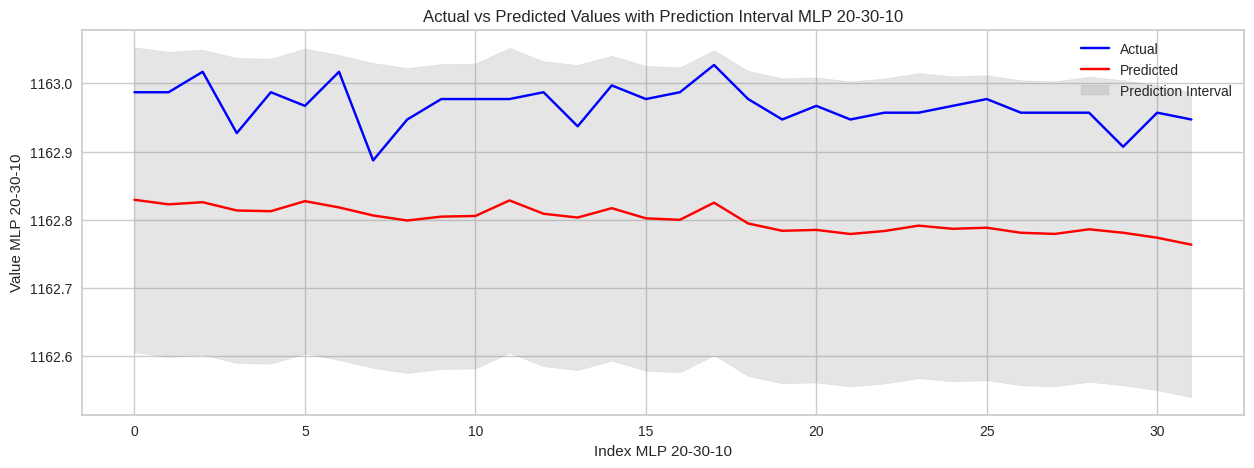

MLP 30-20-50-30-10 Coverage: 1.0


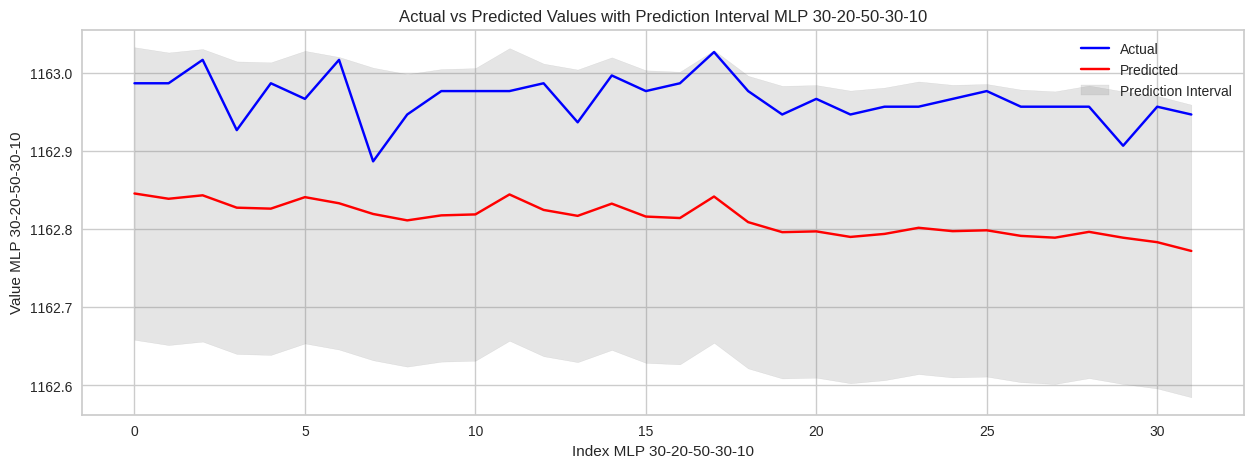

MLP 20-30-50 Coverage: 0.4375


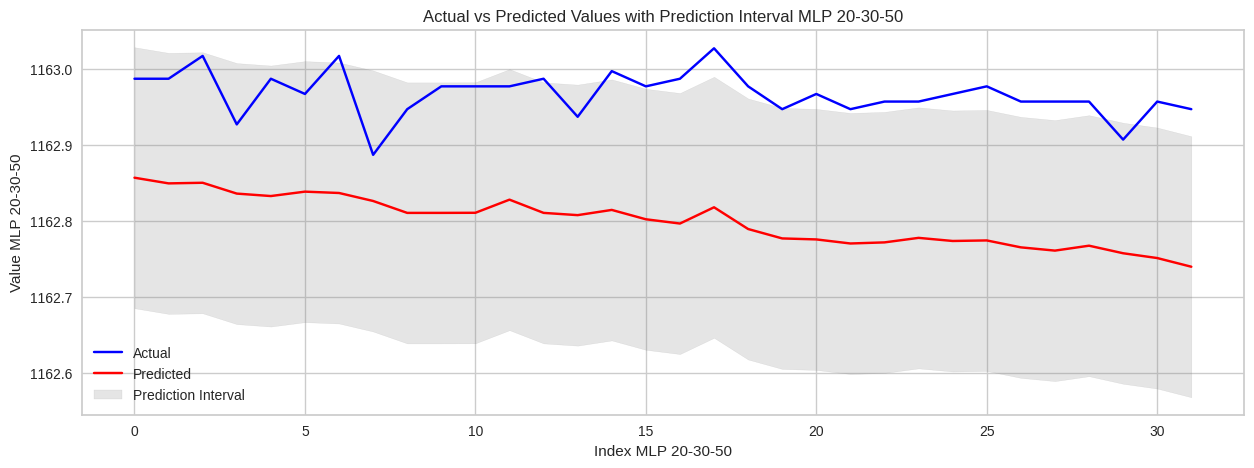

In [346]:
for (name, model) in zip(model_names, models):
    y_pred_cal = model.predict(X_cal)
    y_pred_test = model.predict(X_test)
    y_cal_error = np.abs(y_cal - y_pred_cal)
    # calculate quantile with final sample adjustment to ensure coverage
    np.ceil((n_cal+1)*(1-alpha))/n_cal
    #calculate q_hat on the calibration set
    q_yhat_cal = np.quantile(y_cal_error,np.ceil((n_cal+1)*(1-alpha))/n_cal)
    y_hat_test_lower = y_pred_test - q_yhat_cal
    y_hat_test_upper = y_pred_test + q_yhat_cal

    predict_df = pd.DataFrame(list(zip(y_test,y_pred_test,y_hat_test_lower,y_hat_test_upper)),
                            columns=['actual','predicted','lower_bound','upper_bound'])
    predict_df

    def calculate_coverage(df):
      df['in_interval'] = df.apply(lambda row: row['lower_bound'] <= row['actual'] <= row['upper_bound'], axis=1)
      coverage = df['in_interval'].mean()
      return coverage

    coverage = calculate_coverage(predict_df)
    print(f"{name} Coverage: {coverage}")

    # Sort DataFrame by 'actual' values for smooth line plots
    #predict_df = predict_df.sort_values('actual').reset_index(drop=True)

    # Create a new figure
    plt.figure(figsize=(15, 5))

    # Plot actual values
    plt.plot(predict_df['actual'], label='Actual', color='blue')

    # Plot predicted values
    plt.plot(predict_df['predicted'], label='Predicted', color='red')

    # Plot prediction intervals
    plt.fill_between(predict_df.index, predict_df['lower_bound'], predict_df['upper_bound'],
                    color='gray', alpha=0.2, label='Prediction Interval')

    # Add the legend
    plt.legend()

    # Set labels and title
    plt.xlabel(f'Index {name}')
    plt.ylabel(f'Value {name}')
    plt.title(f'Actual vs Predicted Values with Prediction Interval {name}')

    # Show the plot
    plt.show()
